In [2]:
# http://pytorch.org/
from os import path
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())

accelerator = 'cu80' if path.exists('/opt/bin/nvidia-smi') else 'cpu'

!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.3.0.post4-{platform}-linux_x86_64.whl torchvision
import torch
print('Is it using a GPU? - ', path.exists('/opt/bin/nvidia-smi'))

Is it using a GPU? -  True


In [3]:
# Install the PyDrive wrapper & import libraries.
# This only needs to be done once per notebook.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
!pip install Pillow==4.0.0

    100% |████████████████████████████████| 5.6MB 194kB/s 
  Found existing installation: Pillow 5.1.0
    Uninstalling Pillow-5.1.0:
      Successfully uninstalled Pillow-5.1.0
You are using pip version 9.0.3, however version 10.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [4]:
!pip install Pillow==4.0.0

You are using pip version 9.0.3, however version 10.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [5]:
!pip install kaggle

  Running setup.py bdist_wheel for kaggle ... - \ done
  Stored in directory: /content/.cache/pip/wheels/e2/a8/99/e3a854f62f19e827ead20700eb9ca0ebba65baba2cb0a06468
Successfully built kaggle
You are using pip version 9.0.3, however version 10.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [6]:
# Data setup
# !wget 'https://download.pytorch.org/tutorial/hymenoptera_data.zip'
# !unzip hymenoptera_data.zip
def fetch_from_drive(file_id):
    downloaded = drive.CreateFile({'id': file_id})
    filename = downloaded['title']
    downloaded.GetContentFile(filename)
    print('File {} fetched into current directory as /content/{}'.format(filename, filename))
    
def save_model_to_drive(filename, folder_id='1wFDgzELVZjPMYdgx2MlugCCNhhuHhCAk'):
    uploaded = drive.CreateFile({'title': filename, "parents": [{"kind": "drive#fileLink","id": folder_id}]})
    uploaded.SetContentFile(filename)
    uploaded.Upload()
    print('Uploaded file with ID {}'.format(uploaded.get('id')))
    
# fetch_from_drive('1iekct5cq1BjMLlH-VxqlfJqAwz1BNZpi')  # DUMPY.zip

# !unzip DUMPY.zip
# !cp -r DUMPY/AMD_JEK_Reviewed_2018_0228_OCT_DUMP/* DUMPY/AMD_JEK_Reviewed_2018_0228_OCT_2_DUMP
# !rm -r DUMPY/AMD_JEK_Reviewed_2018_0228_OCT_DUMP
# !mv DUMPY/AMD_JEK_Reviewed_2018_0228_OCT_2_DUMP DUMPY/train
# !mv DUMPY/AMD_JEK_Reviewed_2018_0226_OCT_DUMP DUMPY/val
fetch_from_drive('1MMa2MgkzXJLSkKxQj8nIQpwxvhJu4nFY')

File kaggle.json fetched into current directory as /content/kaggle.json


In [7]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"abhishekkar","key":"84cc0476ff8ddd46cf34270a3da5bc1b"}'}

In [0]:
!mkdir ~/.kaggle

In [0]:
!mv kaggle.json ~/.kaggle/kaggle.json

In [10]:
!rm -r ~/.kaggle/datasets

rm: cannot remove '/content/.kaggle/datasets': No such file or directory


In [11]:
# Time Taken -> 12:33:56 PM : 12:44:40 PM
!kaggle datasets download -d nih-chest-xrays/data

data.zip: Downloaded 42GB of 42GB


In [12]:
!ls ~/.kaggle/datasets/nih-chest-xrays/data/

ARXIV_V5_CHESTXRAY.pdf	images_002.zip	images_008.zip	   README_CHESTXRAY.pdf
BBox_List_2017.csv	images_003.zip	images_009.zip	   test_list.txt
Data_Entry_2017.csv	images_004.zip	images_010.zip	   train_val_list.txt
data.zip		images_005.zip	images_011.zip
FAQ_CHESTXRAY.pdf	images_006.zip	images_012.zip
images_001.zip		images_007.zip	LOG_CHESTXRAY.pdf


In [0]:
!mkdir ~/data

In [0]:
!mv ~/.kaggle/datasets/nih-chest-xrays/data ~

In [15]:
!rm -r ~/data/curated/images

rm: cannot remove '/content/data/curated/images': No such file or directory


In [0]:
!mkdir ~/data/curated

In [0]:
# 12:45:40 -- 12:58:30 (Lower than this)
!unzip 'data/images*.zip' -d ~/data/curated

Archive:  data/images_012.zip
   creating: /content/data/curated/images/
  inflating: /content/data/curated/images/00029039_005.png  
  inflating: /content/data/curated/images/00029119_000.png  
  inflating: /content/data/curated/images/00028308_003.png  
  inflating: /content/data/curated/images/00029437_013.png  
  inflating: /content/data/curated/images/00028544_015.png  
  inflating: /content/data/curated/images/00028774_032.png  
  inflating: /content/data/curated/images/00029074_000.png  
  inflating: /content/data/curated/images/00030179_000.png  
  inflating: /content/data/curated/images/00028281_002.png  
  inflating: /content/data/curated/images/00029848_000.png  
  inflating: /content/data/curated/images/00028507_000.png  
  inflating: /content/data/curated/images/00028699_001.png  
  inflating: /content/data/curated/images/00029922_000.png  
  inflating: /content/data/curated/images/00029356_001.png  
  inflating: /content/data/curated/images/00028509_006.png  
  inflating:


  inflating: /content/data/curated/images/00030573_010.png  
  inflating: /content/data/curated/images/00029809_007.png  
  inflating: /content/data/curated/images/00028523_007.png  
  inflating: /content/data/curated/images/00029676_011.png  
  inflating: /content/data/curated/images/00029881_003.png  
  inflating: /content/data/curated/images/00029451_000.png  
  inflating: /content/data/curated/images/00030046_002.png  
  inflating: /content/data/curated/images/00030227_000.png  
  inflating: /content/data/curated/images/00028310_000.png  
  inflating: /content/data/curated/images/00030786_003.png  
  inflating: /content/data/curated/images/00030609_015.png  
  inflating: /content/data/curated/images/00028995_003.png  
  inflating: /content/data/curated/images/00030401_000.png  
  inflating: /content/data/curated/images/00030320_002.png  
  inflating: /content/data/curated/images/00028191_000.png  
  inflating: /content/data/curated/images/00029142_005.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00030410_001.png  
  inflating: /content/data/curated/images/00029991_007.png  
  inflating: /content/data/curated/images/00029923_000.png  
  inflating: /content/data/curated/images/00028774_001.png  
  inflating: /content/data/curated/images/00028628_019.png  
  inflating: /content/data/curated/images/00028937_000.png  
  inflating: /content/data/curated/images/00030101_006.png  
  inflating: /content/data/curated/images/00029220_000.png  
  inflating: /content/data/curated/images/00028708_000.png  
  inflating: /content/data/curated/images/00029843_005.png  
  inflating: /content/data/curated/images/00030300_003.png  
  inflating: /content/data/curated/images/00029950_017.png  
  inflating: /content/data/curated/images/00030561_012.png  
  inflating: /content/data/curated/images/00030162_001.png  
  inflating: /content/data/curated/images/00029105_024.png  
  inflating: /content/data/curated/images/00029041_008.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00029991_012.png  
  inflating: /content/data/curated/images/00030573_007.png  
  inflating: /content/data/curated/images/00030460_000.png  
  inflating: /content/data/curated/images/00030753_002.png  
  inflating: /content/data/curated/images/00030636_020.png  
  inflating: /content/data/curated/images/00029328_006.png  
  inflating: /content/data/curated/images/00028808_005.png  
  inflating: /content/data/curated/images/00029998_010.png  
  inflating: /content/data/curated/images/00028864_008.png  
  inflating: /content/data/curated/images/00028788_002.png  
  inflating: /content/data/curated/images/00029502_006.png  
  inflating: /content/data/curated/images/00029017_005.png  
  inflating: /content/data/curated/images/00029052_000.png  
  inflating: /content/data/curated/images/00028240_000.png  
  inflating: /content/data/curated/images/00030131_000.png  
  inflating: /content/data/curated/images/00028814_000.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00029827_000.png  
  inflating: /content/data/curated/images/00030687_000.png  
  inflating: /content/data/curated/images/00030079_022.png  
  inflating: /content/data/curated/images/00030532_000.png  
  inflating: /content/data/curated/images/00029435_001.png  
  inflating: /content/data/curated/images/00029940_007.png  
  inflating: /content/data/curated/images/00029274_008.png  
  inflating: /content/data/curated/images/00028367_000.png  
  inflating: /content/data/curated/images/00028467_000.png  
  inflating: /content/data/curated/images/00030279_008.png  
  inflating: /content/data/curated/images/00030787_000.png  
  inflating: /content/data/curated/images/00030458_000.png  
  inflating: /content/data/curated/images/00028231_002.png  
  inflating: /content/data/curated/images/00028518_000.png  
  inflating: /content/data/curated/images/00029490_001.png  
  inflating: /content/data/curated/images/00029207_004.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00028958_001.png  
  inflating: /content/data/curated/images/00029359_000.png  
  inflating: /content/data/curated/images/00030650_004.png  
  inflating: /content/data/curated/images/00029962_000.png  
  inflating: /content/data/curated/images/00030079_041.png  
  inflating: /content/data/curated/images/00029304_000.png  
  inflating: /content/data/curated/images/00030164_000.png  
  inflating: /content/data/curated/images/00028318_000.png  
  inflating: /content/data/curated/images/00029404_000.png  
  inflating: /content/data/curated/images/00029185_000.png  
  inflating: /content/data/curated/images/00029548_013.png  
  inflating: /content/data/curated/images/00029670_001.png  
  inflating: /content/data/curated/images/00030264_000.png  
  inflating: /content/data/curated/images/00029596_001.png  
  inflating: /content/data/curated/images/00029933_000.png  
  inflating: /content/data/curated/images/00029504_000.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00030389_003.png  
  inflating: /content/data/curated/images/00029155_003.png  
  inflating: /content/data/curated/images/00030644_001.png  
  inflating: /content/data/curated/images/00030159_000.png  
  inflating: /content/data/curated/images/00030000_002.png  
  inflating: /content/data/curated/images/00030333_000.png  
  inflating: /content/data/curated/images/00029156_006.png  
  inflating: /content/data/curated/images/00030023_002.png  
  inflating: /content/data/curated/images/00028498_003.png  
  inflating: /content/data/curated/images/00028268_000.png  
  inflating: /content/data/curated/images/00029783_000.png  
  inflating: /content/data/curated/images/00029354_000.png  
  inflating: /content/data/curated/images/00029025_000.png  
  inflating: /content/data/curated/images/00028871_000.png  
  inflating: /content/data/curated/images/00030359_000.png  
  inflating: /content/data/curated/images/00030106_006.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00029981_000.png  
  inflating: /content/data/curated/images/00030557_000.png  
  inflating: /content/data/curated/images/00029142_002.png  
  inflating: /content/data/curated/images/00028549_004.png  
  inflating: /content/data/curated/images/00029889_001.png  
  inflating: /content/data/curated/images/00029883_006.png  
  inflating: /content/data/curated/images/00030402_000.png  
  inflating: /content/data/curated/images/00029579_003.png  
  inflating: /content/data/curated/images/00028661_008.png  
  inflating: /content/data/curated/images/00028499_012.png  
  inflating: /content/data/curated/images/00028897_020.png  
  inflating: /content/data/curated/images/00029597_002.png  
  inflating: /content/data/curated/images/00028437_000.png  
  inflating: /content/data/curated/images/00029672_005.png  
  inflating: /content/data/curated/images/00028512_003.png  
  inflating: /content/data/curated/images/00029771_002.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00028920_000.png  
  inflating: /content/data/curated/images/00030508_000.png  
  inflating: /content/data/curated/images/00030079_016.png  
  inflating: /content/data/curated/images/00029597_007.png  
  inflating: /content/data/curated/images/00030183_005.png  
  inflating: /content/data/curated/images/00029448_002.png  
  inflating: /content/data/curated/images/00029932_000.png  
  inflating: /content/data/curated/images/00028784_004.png  
  inflating: /content/data/curated/images/00030609_003.png  
  inflating: /content/data/curated/images/00029037_001.png  
  inflating: /content/data/curated/images/00029487_000.png  
  inflating: /content/data/curated/images/00029532_014.png  
  inflating: /content/data/curated/images/00028392_005.png  
  inflating: /content/data/curated/images/00029817_024.png  
  inflating: /content/data/curated/images/00030323_027.png  
  inflating: /content/data/curated/images/00030701_002.png  
  inflating: /content/d

  inflating: /content/data/curated/images/00028987_010.png  
  inflating: /content/data/curated/images/00028452_001.png  
  inflating: /content/data/curated/images/00028271_003.png  
  inflating: /content/data/curated/images/00028434_002.png  
  inflating: /content/data/curated/images/00030672_001.png  
  inflating: /content/data/curated/images/00029676_005.png  
  inflating: /content/data/curated/images/00029912_001.png  
  inflating: /content/data/curated/images/00030287_000.png  
  inflating: /content/data/curated/images/00028764_005.png  
  inflating: /content/data/curated/images/00029503_006.png  
  inflating: /content/data/curated/images/00029856_000.png  
  inflating: /content/data/curated/images/00028197_003.png  
  inflating: /content/data/curated/images/00028652_001.png  
  inflating: /content/data/curated/images/00029053_000.png  
  inflating: /content/data/curated/images/00030059_003.png  
  inflating: /content/data/curated/images/00030609_009.png  
  inflating: /content/da


  inflating: /content/data/curated/images/00029807_000.png  
  inflating: /content/data/curated/images/00028521_000.png  
  inflating: /content/data/curated/images/00030338_000.png  
  inflating: /content/data/curated/images/00029907_000.png  
  inflating: /content/data/curated/images/00028211_030.png  
  inflating: /content/data/curated/images/00028932_001.png  
  inflating: /content/data/curated/images/00030193_000.png  
  inflating: /content/data/curated/images/00028765_013.png  
  inflating: /content/data/curated/images/00030339_003.png  
  inflating: /content/data/curated/images/00030408_011.png  
  inflating: /content/data/curated/images/00030538_000.png  
  inflating: /content/data/curated/images/00030146_001.png  
  inflating: /content/data/curated/images/00028547_000.png  
  inflating: /content/data/curated/images/00030550_004.png  
  inflating: /content/data/curated/images/00030493_000.png  
  inflating: /content/data/curated/images/00030320_001.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00029342_001.png  
  inflating: /content/data/curated/images/00028924_006.png  
  inflating: /content/data/curated/images/00029360_000.png  
  inflating: /content/data/curated/images/00028861_007.png  
  inflating: /content/data/curated/images/00030136_000.png  
  inflating: /content/data/curated/images/00029387_003.png  
  inflating: /content/data/curated/images/00030310_000.png  
  inflating: /content/data/curated/images/00029386_000.png  
  inflating: /content/data/curated/images/00030038_006.png  
  inflating: /content/data/curated/images/00028509_016.png  
  inflating: /content/data/curated/images/00030218_001.png  
  inflating: /content/data/curated/images/00029813_029.png  
  inflating: /content/data/curated/images/00028501_001.png  
  inflating: /content/data/curated/images/00030206_011.png  
  inflating: /content/data/curated/images/00029331_000.png  
  inflating: /content/data/curated/images/00029469_004.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00030253_001.png  
  inflating: /content/data/curated/images/00029566_000.png  
  inflating: /content/data/curated/images/00029822_001.png  
  inflating: /content/data/curated/images/00029156_002.png  
  inflating: /content/data/curated/images/00029039_020.png  
  inflating: /content/data/curated/images/00028307_001.png  
  inflating: /content/data/curated/images/00030171_000.png  
  inflating: /content/data/curated/images/00029995_000.png  
  inflating: /content/data/curated/images/00030006_002.png  
  inflating: /content/data/curated/images/00029685_002.png  
  inflating: /content/data/curated/images/00028954_000.png  
  inflating: /content/data/curated/images/00028625_000.png  
  inflating: /content/data/curated/images/00029008_000.png  
  inflating: /content/data/curated/images/00028544_002.png  
  inflating: /content/data/curated/images/00030471_000.png  
  inflating: /content/data/curated/images/00030716_000.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00028572_005.png  
  inflating: /content/data/curated/images/00030569_000.png  
  inflating: /content/data/curated/images/00030079_007.png  
  inflating: /content/data/curated/images/00030159_002.png  
  inflating: /content/data/curated/images/00030389_005.png  
  inflating: /content/data/curated/images/00030514_000.png  
  inflating: /content/data/curated/images/00029821_004.png  
  inflating: /content/data/curated/images/00028934_001.png  
  inflating: /content/data/curated/images/00029088_017.png  
  inflating: /content/data/curated/images/00029683_002.png  
  inflating: /content/data/curated/images/00029940_006.png  
  inflating: /content/data/curated/images/00030370_003.png  
  inflating: /content/data/curated/images/00029274_007.png  
  inflating: /content/data/curated/images/00029198_001.png  
  inflating: /content/data/curated/images/00028386_001.png  
  inflating: /content/data/curated/images/00030140_000.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00030446_000.png  
  inflating: /content/data/curated/images/00028357_006.png  
  inflating: /content/data/curated/images/00028457_006.png  
  inflating: /content/data/curated/images/00028537_001.png  
  inflating: /content/data/curated/images/00029039_003.png  
  inflating: /content/data/curated/images/00028380_011.png  
  inflating: /content/data/curated/images/00029896_000.png  
  inflating: /content/data/curated/images/00028811_001.png  
  inflating: /content/data/curated/images/00028911_001.png  
  inflating: /content/data/curated/images/00028357_020.png  
  inflating: /content/data/curated/images/00028987_009.png  
  inflating: /content/data/curated/images/00029469_006.png  
  inflating: /content/data/curated/images/00030746_000.png  
  inflating: /content/data/curated/images/00028500_000.png  
  inflating: /content/data/curated/images/00029093_000.png  
  inflating: /content/data/curated/images/00029991_008.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00029950_015.png  
  inflating: /content/data/curated/images/00029221_001.png  
  inflating: /content/data/curated/images/00029969_003.png  
  inflating: /content/data/curated/images/00029065_000.png  
  inflating: /content/data/curated/images/00029539_000.png  
  inflating: /content/data/curated/images/00030499_000.png  
  inflating: /content/data/curated/images/00028628_003.png  
  inflating: /content/data/curated/images/00029639_000.png  
  inflating: /content/data/curated/images/00030609_019.png  
  inflating: /content/data/curated/images/00029142_009.png  
  inflating: /content/data/curated/images/00030044_000.png  
  inflating: /content/data/curated/images/00028864_001.png  
  inflating: /content/data/curated/images/00029670_006.png  
  inflating: /content/data/curated/images/00030408_002.png  
  inflating: /content/data/curated/images/00028454_003.png  
  inflating: /content/data/curated/images/00028782_000.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00029548_000.png  
  inflating: /content/data/curated/images/00030709_001.png  
  inflating: /content/data/curated/images/00028636_000.png  
  inflating: /content/data/curated/images/00029207_010.png  
  inflating: /content/data/curated/images/00028591_000.png  
  inflating: /content/data/curated/images/00030682_000.png  
  inflating: /content/data/curated/images/00029156_001.png  
  inflating: /content/data/curated/images/00029762_001.png  
  inflating: /content/data/curated/images/00029469_008.png  
  inflating: /content/data/curated/images/00029244_011.png  
  inflating: /content/data/curated/images/00028462_000.png  
  inflating: /content/data/curated/images/00028215_001.png  
  inflating: /content/data/curated/images/00029045_000.png  
  inflating: /content/data/curated/images/00029813_019.png  
  inflating: /content/data/curated/images/00029519_000.png  
  inflating: /content/data/curated/images/00030479_000.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00029470_008.png  
  inflating: /content/data/curated/images/00028663_000.png  
  inflating: /content/data/curated/images/00029650_003.png  
  inflating: /content/data/curated/images/00030499_002.png  
  inflating: /content/data/curated/images/00029420_000.png  
  inflating: /content/data/curated/images/00028271_001.png  
  inflating: /content/data/curated/images/00029813_002.png  
  inflating: /content/data/curated/images/00028920_004.png  
  inflating: /content/data/curated/images/00028864_003.png  
  inflating: /content/data/curated/images/00029017_000.png  
  inflating: /content/data/curated/images/00028197_001.png  
  inflating: /content/data/curated/images/00029763_010.png  
  inflating: /content/data/curated/images/00028927_002.png  
  inflating: /content/data/curated/images/00029105_010.png  
  inflating: /content/data/curated/images/00028789_000.png  
  inflating: /content/data/curated/images/00030059_001.png  
  inflating: /content/d

  inflating: /content/data/curated/images/00028211_014.png  
  inflating: /content/data/curated/images/00029880_011.png  
  inflating: /content/data/curated/images/00029869_010.png  
  inflating: /content/data/curated/images/00028173_012.png  
  inflating: /content/data/curated/images/00029826_000.png  
  inflating: /content/data/curated/images/00030079_053.png  
  inflating: /content/data/curated/images/00029589_001.png  
  inflating: /content/data/curated/images/00030002_000.png  
  inflating: /content/data/curated/images/00029900_000.png  
  inflating: /content/data/curated/images/00028777_001.png  
  inflating: /content/data/curated/images/00029663_001.png  
  inflating: /content/data/curated/images/00030450_002.png  
  inflating: /content/data/curated/images/00028795_000.png  
  inflating: /content/data/curated/images/00029097_002.png  
  inflating: /content/data/curated/images/00029809_004.png  
  inflating: /content/data/curated/images/00029352_000.png  
  inflating: /content/da


  inflating: /content/data/curated/images/00029774_008.png  
  inflating: /content/data/curated/images/00030137_001.png  
  inflating: /content/data/curated/images/00028593_000.png  
  inflating: /content/data/curated/images/00029979_000.png  
  inflating: /content/data/curated/images/00028264_000.png  
  inflating: /content/data/curated/images/00029943_016.png  
  inflating: /content/data/curated/images/00029358_015.png  
  inflating: /content/data/curated/images/00030000_000.png  
  inflating: /content/data/curated/images/00028464_000.png  
  inflating: /content/data/curated/images/00029669_002.png  
  inflating: /content/data/curated/images/00029763_007.png  
  inflating: /content/data/curated/images/00029687_001.png  
  inflating: /content/data/curated/images/00030079_073.png  
  inflating: /content/data/curated/images/00028975_001.png  
  inflating: /content/data/curated/images/00029376_000.png  
  inflating: /content/data/curated/images/00030784_000.png  
  inflating: /content/d

  inflating: /content/data/curated/images/00029259_009.png  
  inflating: /content/data/curated/images/00030026_005.png  
  inflating: /content/data/curated/images/00029630_000.png  
  inflating: /content/data/curated/images/00030617_001.png  
  inflating: /content/data/curated/images/00028481_001.png  
  inflating: /content/data/curated/images/00028899_000.png  
  inflating: /content/data/curated/images/00030536_003.png  
  inflating: /content/data/curated/images/00028215_000.png  
  inflating: /content/data/curated/images/00029227_000.png  
  inflating: /content/data/curated/images/00029327_000.png  
  inflating: /content/data/curated/images/00028844_000.png  
  inflating: /content/data/curated/images/00028744_000.png  
  inflating: /content/data/curated/images/00030590_000.png  
  inflating: /content/data/curated/images/00030039_012.png  
  inflating: /content/data/curated/images/00029631_003.png  
  inflating: /content/data/curated/images/00029221_005.png  
  inflating: /content/da


  inflating: /content/data/curated/images/00030559_000.png  
  inflating: /content/data/curated/images/00028413_000.png  
  inflating: /content/data/curated/images/00028513_000.png  
  inflating: /content/data/curated/images/00028509_025.png  
  inflating: /content/data/curated/images/00030267_001.png  
  inflating: /content/data/curated/images/00029943_027.png  
  inflating: /content/data/curated/images/00029146_008.png  
  inflating: /content/data/curated/images/00029280_000.png  
  inflating: /content/data/curated/images/00030770_001.png  
  inflating: /content/data/curated/images/00030260_003.png  
  inflating: /content/data/curated/images/00028713_000.png  
  inflating: /content/data/curated/images/00028961_002.png  
  inflating: /content/data/curated/images/00028987_016.png  
  inflating: /content/data/curated/images/00030523_002.png  
  inflating: /content/data/curated/images/00028394_000.png  
  inflating: /content/data/curated/images/00028494_000.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00028774_000.png  
  inflating: /content/data/curated/images/00029998_004.png  
  inflating: /content/data/curated/images/00030573_015.png  
  inflating: /content/data/curated/images/00030536_000.png  
  inflating: /content/data/curated/images/00030710_000.png  
  inflating: /content/data/curated/images/00030300_002.png  
  inflating: /content/data/curated/images/00029861_003.png  
  inflating: /content/data/curated/images/00029128_000.png  
  inflating: /content/data/curated/images/00028939_005.png  
  inflating: /content/data/curated/images/00030591_000.png  
  inflating: /content/data/curated/images/00030491_000.png  
  inflating: /content/data/curated/images/00029302_000.png  
  inflating: /content/data/curated/images/00029221_002.png  
  inflating: /content/data/curated/images/00030046_007.png  
  inflating: /content/data/curated/images/00029402_000.png  
  inflating: /content/data/curated/images/00028253_001.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00029385_003.png  
  inflating: /content/data/curated/images/00028526_018.png  
  inflating: /content/data/curated/images/00029548_002.png  
  inflating: /content/data/curated/images/00030235_003.png  
  inflating: /content/data/curated/images/00029903_000.png  
  inflating: /content/data/curated/images/00029666_001.png  
  inflating: /content/data/curated/images/00030389_000.png  
  inflating: /content/data/curated/images/00029705_006.png  
  inflating: /content/data/curated/images/00029740_001.png  
  inflating: /content/data/curated/images/00030589_000.png  
  inflating: /content/data/curated/images/00030689_000.png  
  inflating: /content/data/curated/images/00029829_000.png  
  inflating: /content/data/curated/images/00028917_000.png  
  inflating: /content/data/curated/images/00030434_000.png  
  inflating: /content/data/curated/images/00029200_000.png  
  inflating: /content/data/curated/images/00029292_001.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00029039_012.png  
  inflating: /content/data/curated/images/00028923_000.png  
  inflating: /content/data/curated/images/00029572_001.png  
  inflating: /content/data/curated/images/00028661_004.png  
  inflating: /content/data/curated/images/00029817_001.png  
  inflating: /content/data/curated/images/00030522_001.png  
  inflating: /content/data/curated/images/00030260_005.png  
  inflating: /content/data/curated/images/00029919_007.png  
  inflating: /content/data/curated/images/00030604_002.png  
  inflating: /content/data/curated/images/00028731_001.png  
  inflating: /content/data/curated/images/00029890_000.png  
  inflating: /content/data/curated/images/00029380_002.png  
  inflating: /content/data/curated/images/00030622_001.png  
  inflating: /content/data/curated/images/00030541_003.png  
  inflating: /content/data/curated/images/00030212_003.png  
  inflating: /content/data/curated/images/00029469_001.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00028950_000.png  
  inflating: /content/data/curated/images/00029204_000.png  
  inflating: /content/data/curated/images/00028621_000.png  
  inflating: /content/data/curated/images/00028384_001.png  
  inflating: /content/data/curated/images/00028523_006.png  
  inflating: /content/data/curated/images/00029041_001.png  
  inflating: /content/data/curated/images/00028529_001.png  
  inflating: /content/data/curated/images/00029470_001.png  
  inflating: /content/data/curated/images/00030712_000.png  
  inflating: /content/data/curated/images/00029459_000.png  
  inflating: /content/data/curated/images/00029596_015.png  
  inflating: /content/data/curated/images/00029863_003.png  
  inflating: /content/data/curated/images/00028976_000.png  
  inflating: /content/data/curated/images/00028485_004.png  
  inflating: /content/data/curated/images/00029570_001.png  
  inflating: /content/data/curated/images/00028330_004.png  
  inflating: /content/d

  inflating: /content/data/curated/images/00028874_000.png  
  inflating: /content/data/curated/images/00029760_000.png  
  inflating: /content/data/curated/images/00029159_006.png  
  inflating: /content/data/curated/images/00029294_001.png  
  inflating: /content/data/curated/images/00030107_000.png  
  inflating: /content/data/curated/images/00028588_001.png  
  inflating: /content/data/curated/images/00028876_006.png  
  inflating: /content/data/curated/images/00028795_008.png  
  inflating: /content/data/curated/images/00030610_000.png  
  inflating: /content/data/curated/images/00030753_010.png  
  inflating: /content/data/curated/images/00029476_002.png  
  inflating: /content/data/curated/images/00028211_008.png  
  inflating: /content/data/curated/images/00030062_000.png  
  inflating: /content/data/curated/images/00029494_001.png  
  inflating: /content/data/curated/images/00028583_004.png  
  inflating: /content/data/curated/images/00028211_022.png  
  inflating: /content/da


  inflating: /content/data/curated/images/00029279_002.png  
  inflating: /content/data/curated/images/00030294_000.png  
  inflating: /content/data/curated/images/00028704_001.png  
  inflating: /content/data/curated/images/00029060_000.png  
  inflating: /content/data/curated/images/00029534_000.png  
  inflating: /content/data/curated/images/00030065_000.png  
  inflating: /content/data/curated/images/00029297_001.png  
  inflating: /content/data/curated/images/00028380_009.png  
  inflating: /content/data/curated/images/00028822_000.png  
  inflating: /content/data/curated/images/00029817_018.png  
  inflating: /content/data/curated/images/00029242_001.png  
  inflating: /content/data/curated/images/00030247_001.png  
  inflating: /content/data/curated/images/00029883_005.png  
  inflating: /content/data/curated/images/00029548_010.png  
  inflating: /content/data/curated/images/00028996_002.png  
  inflating: /content/data/curated/images/00030494_000.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00028774_011.png  
  inflating: /content/data/curated/images/00029214_001.png  
  inflating: /content/data/curated/images/00028550_003.png  
  inflating: /content/data/curated/images/00029259_017.png  
  inflating: /content/data/curated/images/00029813_026.png  
  inflating: /content/data/curated/images/00028420_000.png  
  inflating: /content/data/curated/images/00029587_000.png  
  inflating: /content/data/curated/images/00030192_000.png  
  inflating: /content/data/curated/images/00030766_000.png  
  inflating: /content/data/curated/images/00029588_003.png  
  inflating: /content/data/curated/images/00029663_006.png  
  inflating: /content/data/curated/images/00029844_004.png  
  inflating: /content/data/curated/images/00030611_000.png  
  inflating: /content/data/curated/images/00030439_006.png  
  inflating: /content/data/curated/images/00030408_014.png  
  inflating: /content/data/curated/images/00029961_000.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00028323_000.png  
  inflating: /content/data/curated/images/00029528_002.png  
  inflating: /content/data/curated/images/00029821_018.png  
  inflating: /content/data/curated/images/00030543_000.png  
  inflating: /content/data/curated/images/00029035_000.png  
  inflating: /content/data/curated/images/00028535_004.png  
  inflating: /content/data/curated/images/00028689_001.png  
  inflating: /content/data/curated/images/00029564_000.png  
  inflating: /content/data/curated/images/00028611_024.png  
  inflating: /content/data/curated/images/00029664_000.png  
  inflating: /content/data/curated/images/00028752_000.png  
  inflating: /content/data/curated/images/00028591_007.png  
  inflating: /content/data/curated/images/00030178_004.png  
  inflating: /content/data/curated/images/00028180_006.png  
  inflating: /content/data/curated/images/00028499_008.png  
  inflating: /content/data/curated/images/00028897_016.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00030439_003.png  
  inflating: /content/data/curated/images/00030064_000.png  
  inflating: /content/data/curated/images/00028903_001.png  
  inflating: /content/data/curated/images/00029733_000.png  
  inflating: /content/data/curated/images/00030209_000.png  
  inflating: /content/data/curated/images/00029496_001.png  
  inflating: /content/data/curated/images/00030309_000.png  
  inflating: /content/data/curated/images/00028373_000.png  
  inflating: /content/data/curated/images/00028292_002.png  
  inflating: /content/data/curated/images/00030593_000.png  
  inflating: /content/data/curated/images/00029085_000.png  
  inflating: /content/data/curated/images/00029088_009.png  
  inflating: /content/data/curated/images/00030183_002.png  
  inflating: /content/data/curated/images/00028199_000.png  
  inflating: /content/data/curated/images/00028299_000.png  
  inflating: /content/data/curated/images/00030509_000.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00028301_001.png  
  inflating: /content/data/curated/images/00029705_000.png  
  inflating: /content/data/curated/images/00028844_025.png  
  inflating: /content/data/curated/images/00028873_011.png  
  inflating: /content/data/curated/images/00029486_000.png  
  inflating: /content/data/curated/images/00029560_000.png  
  inflating: /content/data/curated/images/00030091_000.png  
  inflating: /content/data/curated/images/00030236_000.png  
  inflating: /content/data/curated/images/00030484_002.png  
  inflating: /content/data/curated/images/00029943_018.png  
  inflating: /content/data/curated/images/00028856_001.png  
  inflating: /content/data/curated/images/00028876_034.png  
  inflating: /content/data/curated/images/00029943_032.png  
  inflating: /content/data/curated/images/00029661_003.png  
  inflating: /content/data/curated/images/00029686_000.png  
  inflating: /content/data/curated/images/00030636_014.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00030636_019.png  
  inflating: /content/data/curated/images/00028774_005.png  
  inflating: /content/data/curated/images/00028924_011.png  
  inflating: /content/data/curated/images/00029276_007.png  
  inflating: /content/data/curated/images/00028525_000.png  
  inflating: /content/data/curated/images/00029537_000.png  
  inflating: /content/data/curated/images/00029437_000.png  
  inflating: /content/data/curated/images/00029866_000.png  
  inflating: /content/data/curated/images/00028433_015.png  
  inflating: /content/data/curated/images/00029611_000.png  
  inflating: /content/data/curated/images/00029374_001.png  
  inflating: /content/data/curated/images/00028861_012.png  
  inflating: /content/data/curated/images/00028509_007.png  
  inflating: /content/data/curated/images/00029393_003.png  
  inflating: /content/data/curated/images/00028580_000.png  
  inflating: /content/data/curated/images/00029985_002.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00029666_006.png  
  inflating: /content/data/curated/images/00029822_007.png  
  inflating: /content/data/curated/images/00028774_039.png  
  inflating: /content/data/curated/images/00030079_021.png  
  inflating: /content/data/curated/images/00030023_004.png  
  inflating: /content/data/curated/images/00030451_001.png  
  inflating: /content/data/curated/images/00029535_000.png  
  inflating: /content/data/curated/images/00029672_015.png  
  inflating: /content/data/curated/images/00030279_007.png  
  inflating: /content/data/curated/images/00028890_004.png  
  inflating: /content/data/curated/images/00029866_006.png  
  inflating: /content/data/curated/images/00029490_000.png  
  inflating: /content/data/curated/images/00029717_001.png  
  inflating: /content/data/curated/images/00028649_000.png  
  inflating: /content/data/curated/images/00029161_000.png  
  inflating: /content/data/curated/images/00029635_000.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00029796_000.png  
  inflating: /content/data/curated/images/00028526_014.png  
  inflating: /content/data/curated/images/00029467_000.png  
  inflating: /content/data/curated/images/00028181_000.png  
  inflating: /content/data/curated/images/00029723_001.png  
  inflating: /content/data/curated/images/00028984_000.png  
  inflating: /content/data/curated/images/00028208_001.png  
  inflating: /content/data/curated/images/00030038_008.png  
  inflating: /content/data/curated/images/00030218_003.png  
  inflating: /content/data/curated/images/00028674_002.png  
  inflating: /content/data/curated/images/00030137_005.png  
  inflating: /content/data/curated/images/00030172_000.png  
  inflating: /content/data/curated/images/00030206_013.png  
  inflating: /content/data/curated/images/00028819_002.png  
  inflating: /content/data/curated/images/00029805_002.png  
  inflating: /content/data/curated/images/00029058_005.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00030030_000.png  
  inflating: /content/data/curated/images/00028253_010.png  
  inflating: /content/data/curated/images/00028666_003.png  
  inflating: /content/data/curated/images/00029348_000.png  
  inflating: /content/data/curated/images/00029597_005.png  
  inflating: /content/data/curated/images/00029423_003.png  
  inflating: /content/data/curated/images/00030701_000.png  
  inflating: /content/data/curated/images/00028856_005.png  
  inflating: /content/data/curated/images/00030024_000.png  
  inflating: /content/data/curated/images/00028987_011.png  
  inflating: /content/data/curated/images/00030258_001.png  
  inflating: /content/data/curated/images/00028330_000.png  
  inflating: /content/data/curated/images/00030496_005.png  
  inflating: /content/data/curated/images/00028861_006.png  
  inflating: /content/data/curated/images/00029663_008.png  
  inflating: /content/data/curated/images/00029763_008.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00006586_001.png  
  inflating: /content/data/curated/images/00006586_002.png  
  inflating: /content/data/curated/images/00006586_003.png  
  inflating: /content/data/curated/images/00006586_004.png  
  inflating: /content/data/curated/images/00006586_005.png  
  inflating: /content/data/curated/images/00006587_000.png  
  inflating: /content/data/curated/images/00006588_000.png  
  inflating: /content/data/curated/images/00006588_001.png  
  inflating: /content/data/curated/images/00006588_002.png  
  inflating: /content/data/curated/images/00006588_003.png  
  inflating: /content/data/curated/images/00006588_004.png  
  inflating: /content/data/curated/images/00006588_005.png  
  inflating: /content/data/curated/images/00006589_000.png  
  inflating: /content/data/curated/images/00006590_000.png  
  inflating: /content/data/curated/images/00006591_000.png  
  inflating: /content/data/curated/images/00006592_000.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00006642_004.png  
  inflating: /content/data/curated/images/00006642_005.png  
  inflating: /content/data/curated/images/00006642_006.png  
  inflating: /content/data/curated/images/00006642_007.png  
  inflating: /content/data/curated/images/00006642_008.png  
  inflating: /content/data/curated/images/00006642_009.png  
  inflating: /content/data/curated/images/00006642_010.png  
  inflating: /content/data/curated/images/00006642_011.png  
  inflating: /content/data/curated/images/00006642_012.png  
  inflating: /content/data/curated/images/00006642_013.png  
  inflating: /content/data/curated/images/00006642_014.png  
  inflating: /content/data/curated/images/00006642_015.png  
  inflating: /content/data/curated/images/00006642_016.png  
  inflating: /content/data/curated/images/00006642_017.png  
  inflating: /content/data/curated/images/00006642_018.png  
  inflating: /content/data/curated/images/00006642_019.png  
  inflating: /content/d

  inflating: /content/data/curated/images/00006693_000.png  
  inflating: /content/data/curated/images/00006694_000.png  
  inflating: /content/data/curated/images/00006694_001.png  
  inflating: /content/data/curated/images/00006694_002.png  
  inflating: /content/data/curated/images/00006694_003.png  
  inflating: /content/data/curated/images/00006695_000.png  
  inflating: /content/data/curated/images/00006695_001.png  
  inflating: /content/data/curated/images/00006695_002.png  
  inflating: /content/data/curated/images/00006695_003.png  
  inflating: /content/data/curated/images/00006695_004.png  
  inflating: /content/data/curated/images/00006695_005.png  
  inflating: /content/data/curated/images/00006695_006.png  
  inflating: /content/data/curated/images/00006695_007.png  
  inflating: /content/data/curated/images/00006695_008.png  
  inflating: /content/data/curated/images/00006695_009.png  
  inflating: /content/data/curated/images/00006696_000.png  
  inflating: /content/da


  inflating: /content/data/curated/images/00006738_001.png  
  inflating: /content/data/curated/images/00006738_002.png  
  inflating: /content/data/curated/images/00006738_003.png  
  inflating: /content/data/curated/images/00006738_004.png  
  inflating: /content/data/curated/images/00006738_005.png  
  inflating: /content/data/curated/images/00006738_006.png  
  inflating: /content/data/curated/images/00006738_007.png  
  inflating: /content/data/curated/images/00006738_008.png  
  inflating: /content/data/curated/images/00006738_009.png  
  inflating: /content/data/curated/images/00006739_000.png  
  inflating: /content/data/curated/images/00006739_001.png  
  inflating: /content/data/curated/images/00006739_002.png  
  inflating: /content/data/curated/images/00006739_003.png  
  inflating: /content/data/curated/images/00006739_004.png  
  inflating: /content/data/curated/images/00006739_005.png  
  inflating: /content/data/curated/images/00006739_006.png  
  inflating: /content/d

  inflating: /content/data/curated/images/00006787_000.png  
  inflating: /content/data/curated/images/00006788_000.png  
  inflating: /content/data/curated/images/00006788_001.png  
  inflating: /content/data/curated/images/00006788_002.png  
  inflating: /content/data/curated/images/00006788_003.png  
  inflating: /content/data/curated/images/00006788_004.png  
  inflating: /content/data/curated/images/00006788_005.png  
  inflating: /content/data/curated/images/00006789_000.png  
  inflating: /content/data/curated/images/00006790_000.png  
  inflating: /content/data/curated/images/00006790_001.png  
  inflating: /content/data/curated/images/00006790_002.png  
  inflating: /content/data/curated/images/00006790_003.png  
  inflating: /content/data/curated/images/00006791_000.png  
  inflating: /content/data/curated/images/00006791_001.png  
  inflating: /content/data/curated/images/00006791_002.png  
  inflating: /content/data/curated/images/00006791_003.png  
  inflating: /content/da

  inflating: /content/data/curated/images/00006835_006.png  
  inflating: /content/data/curated/images/00006835_007.png  
  inflating: /content/data/curated/images/00006835_008.png  
  inflating: /content/data/curated/images/00006835_009.png  
  inflating: /content/data/curated/images/00006836_000.png  
  inflating: /content/data/curated/images/00006836_001.png  
  inflating: /content/data/curated/images/00006836_002.png  
  inflating: /content/data/curated/images/00006836_003.png  
  inflating: /content/data/curated/images/00006836_004.png  
  inflating: /content/data/curated/images/00006836_005.png  
  inflating: /content/data/curated/images/00006836_006.png  
  inflating: /content/data/curated/images/00006836_007.png  
  inflating: /content/data/curated/images/00006836_008.png  
  inflating: /content/data/curated/images/00006836_009.png  
  inflating: /content/data/curated/images/00006836_010.png  
  inflating: /content/data/curated/images/00006836_011.png  
  inflating: /content/da


  inflating: /content/data/curated/images/00006885_000.png  
  inflating: /content/data/curated/images/00006886_000.png  
  inflating: /content/data/curated/images/00006887_000.png  
  inflating: /content/data/curated/images/00006888_000.png  
  inflating: /content/data/curated/images/00006888_001.png  
  inflating: /content/data/curated/images/00006889_000.png  
  inflating: /content/data/curated/images/00006889_001.png  
  inflating: /content/data/curated/images/00006889_002.png  
  inflating: /content/data/curated/images/00006889_003.png  
  inflating: /content/data/curated/images/00006890_000.png  
  inflating: /content/data/curated/images/00006890_001.png  
  inflating: /content/data/curated/images/00006890_002.png  
  inflating: /content/data/curated/images/00006890_003.png  
  inflating: /content/data/curated/images/00006890_004.png  
  inflating: /content/data/curated/images/00006890_005.png  
  inflating: /content/data/curated/images/00006891_000.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00006941_004.png  
  inflating: /content/data/curated/images/00006941_005.png  
  inflating: /content/data/curated/images/00006941_006.png  
  inflating: /content/data/curated/images/00006941_007.png  
  inflating: /content/data/curated/images/00006941_008.png  
  inflating: /content/data/curated/images/00006941_009.png  
  inflating: /content/data/curated/images/00006942_000.png  
  inflating: /content/data/curated/images/00006943_000.png  
  inflating: /content/data/curated/images/00006944_000.png  
  inflating: /content/data/curated/images/00006944_001.png  
  inflating: /content/data/curated/images/00006944_002.png  
  inflating: /content/data/curated/images/00006945_000.png  
  inflating: /content/data/curated/images/00006945_001.png  
  inflating: /content/data/curated/images/00006946_000.png  
  inflating: /content/data/curated/images/00006947_000.png  
  inflating: /content/data/curated/images/00006948_000.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00006981_004.png  
  inflating: /content/data/curated/images/00006981_005.png  
  inflating: /content/data/curated/images/00006981_006.png  
  inflating: /content/data/curated/images/00006981_007.png  
  inflating: /content/data/curated/images/00006981_008.png  
  inflating: /content/data/curated/images/00006981_009.png  
  inflating: /content/data/curated/images/00006981_010.png  
  inflating: /content/data/curated/images/00006981_011.png  
  inflating: /content/data/curated/images/00006981_012.png  
  inflating: /content/data/curated/images/00006981_013.png  
  inflating: /content/data/curated/images/00006981_014.png  
  inflating: /content/data/curated/images/00006981_015.png  
  inflating: /content/data/curated/images/00006981_016.png  
  inflating: /content/data/curated/images/00006981_017.png  
  inflating: /content/data/curated/images/00006981_018.png  
  inflating: /content/data/curated/images/00006981_019.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00007018_016.png  
  inflating: /content/data/curated/images/00007018_017.png  
  inflating: /content/data/curated/images/00007018_018.png  
  inflating: /content/data/curated/images/00007018_019.png  
  inflating: /content/data/curated/images/00007018_020.png  
  inflating: /content/data/curated/images/00007018_021.png  
  inflating: /content/data/curated/images/00007018_022.png  
  inflating: /content/data/curated/images/00007018_023.png  
  inflating: /content/data/curated/images/00007018_024.png  
  inflating: /content/data/curated/images/00007018_025.png  
  inflating: /content/data/curated/images/00007018_026.png  
  inflating: /content/data/curated/images/00007018_027.png  
  inflating: /content/data/curated/images/00007018_028.png  
  inflating: /content/data/curated/images/00007018_029.png  
  inflating: /content/data/curated/images/00007018_030.png  
  inflating: /content/data/curated/images/00007018_031.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00007046_014.png  
  inflating: /content/data/curated/images/00007047_000.png  
  inflating: /content/data/curated/images/00007048_000.png  
  inflating: /content/data/curated/images/00007048_001.png  
  inflating: /content/data/curated/images/00007048_002.png  
  inflating: /content/data/curated/images/00007049_000.png  
  inflating: /content/data/curated/images/00007050_000.png  
  inflating: /content/data/curated/images/00007050_001.png  
  inflating: /content/data/curated/images/00007050_002.png  
  inflating: /content/data/curated/images/00007051_000.png  
  inflating: /content/data/curated/images/00007051_001.png  
  inflating: /content/data/curated/images/00007052_000.png  
  inflating: /content/data/curated/images/00007053_000.png  
  inflating: /content/data/curated/images/00007053_001.png  
  inflating: /content/data/curated/images/00007053_002.png  
  inflating: /content/data/curated/images/00007053_003.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00007106_000.png  
  inflating: /content/data/curated/images/00007106_001.png  
  inflating: /content/data/curated/images/00007107_000.png  
  inflating: /content/data/curated/images/00007108_000.png  
  inflating: /content/data/curated/images/00007108_001.png  
  inflating: /content/data/curated/images/00007108_002.png  
  inflating: /content/data/curated/images/00007108_003.png  
  inflating: /content/data/curated/images/00007108_004.png  
  inflating: /content/data/curated/images/00007108_005.png  
  inflating: /content/data/curated/images/00007108_006.png  
  inflating: /content/data/curated/images/00007108_007.png  
  inflating: /content/data/curated/images/00007108_008.png  
  inflating: /content/data/curated/images/00007108_009.png  
  inflating: /content/data/curated/images/00007108_010.png  
  inflating: /content/data/curated/images/00007108_011.png  
  inflating: /content/data/curated/images/00007108_012.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00007152_007.png  
  inflating: /content/data/curated/images/00007152_008.png  
  inflating: /content/data/curated/images/00007152_009.png  
  inflating: /content/data/curated/images/00007152_010.png  
  inflating: /content/data/curated/images/00007152_011.png  
  inflating: /content/data/curated/images/00007153_000.png  
  inflating: /content/data/curated/images/00007153_001.png  
  inflating: /content/data/curated/images/00007154_000.png  
  inflating: /content/data/curated/images/00007154_001.png  
  inflating: /content/data/curated/images/00007155_000.png  
  inflating: /content/data/curated/images/00007156_000.png  
  inflating: /content/data/curated/images/00007156_001.png  
  inflating: /content/data/curated/images/00007157_000.png  
  inflating: /content/data/curated/images/00007157_001.png  
  inflating: /content/data/curated/images/00007157_002.png  
  inflating: /content/data/curated/images/00007157_003.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00007202_001.png  
  inflating: /content/data/curated/images/00007202_002.png  
  inflating: /content/data/curated/images/00007203_000.png  
  inflating: /content/data/curated/images/00007203_001.png  
  inflating: /content/data/curated/images/00007203_002.png  
  inflating: /content/data/curated/images/00007204_000.png  
  inflating: /content/data/curated/images/00007205_000.png  
  inflating: /content/data/curated/images/00007205_001.png  
  inflating: /content/data/curated/images/00007205_002.png  
  inflating: /content/data/curated/images/00007205_003.png  
  inflating: /content/data/curated/images/00007205_004.png  
  inflating: /content/data/curated/images/00007205_005.png  
  inflating: /content/data/curated/images/00007205_006.png  
  inflating: /content/data/curated/images/00007205_007.png  
  inflating: /content/data/curated/images/00007205_008.png  
  inflating: /content/data/curated/images/00007205_009.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00007265_001.png  
  inflating: /content/data/curated/images/00007265_002.png  
  inflating: /content/data/curated/images/00007266_000.png  
  inflating: /content/data/curated/images/00007267_000.png  
  inflating: /content/data/curated/images/00007267_001.png  
  inflating: /content/data/curated/images/00007268_000.png  
  inflating: /content/data/curated/images/00007268_001.png  
  inflating: /content/data/curated/images/00007268_002.png  
  inflating: /content/data/curated/images/00007269_000.png  
  inflating: /content/data/curated/images/00007270_000.png  
  inflating: /content/data/curated/images/00007271_000.png  
  inflating: /content/data/curated/images/00007271_001.png  
  inflating: /content/data/curated/images/00007272_000.png  
  inflating: /content/data/curated/images/00007272_001.png  
  inflating: /content/data/curated/images/00007273_000.png  
  inflating: /content/data/curated/images/00007274_000.png  
  inflating: /content/d

  inflating: /content/data/curated/images/00007321_001.png  
  inflating: /content/data/curated/images/00007321_002.png  
  inflating: /content/data/curated/images/00007321_003.png  
  inflating: /content/data/curated/images/00007321_004.png  
  inflating: /content/data/curated/images/00007321_005.png  
  inflating: /content/data/curated/images/00007321_006.png  
  inflating: /content/data/curated/images/00007321_007.png  
  inflating: /content/data/curated/images/00007321_008.png  
  inflating: /content/data/curated/images/00007321_009.png  
  inflating: /content/data/curated/images/00007321_010.png  
  inflating: /content/data/curated/images/00007321_011.png  
  inflating: /content/data/curated/images/00007321_012.png  
  inflating: /content/data/curated/images/00007321_013.png  
  inflating: /content/data/curated/images/00007322_000.png  
  inflating: /content/data/curated/images/00007322_001.png  
  inflating: /content/data/curated/images/00007322_002.png  
  inflating: /content/da


  inflating: /content/data/curated/images/00007356_000.png  
  inflating: /content/data/curated/images/00007356_001.png  
  inflating: /content/data/curated/images/00007356_002.png  
  inflating: /content/data/curated/images/00007357_000.png  
  inflating: /content/data/curated/images/00007358_000.png  
  inflating: /content/data/curated/images/00007359_000.png  
  inflating: /content/data/curated/images/00007360_000.png  
  inflating: /content/data/curated/images/00007361_000.png  
  inflating: /content/data/curated/images/00007362_000.png  
  inflating: /content/data/curated/images/00007363_000.png  
  inflating: /content/data/curated/images/00007364_000.png  
  inflating: /content/data/curated/images/00007365_000.png  
  inflating: /content/data/curated/images/00007366_000.png  
  inflating: /content/data/curated/images/00007367_000.png  
  inflating: /content/data/curated/images/00007368_000.png  
  inflating: /content/data/curated/images/00007368_001.png  
  inflating: /content/d

  inflating: /content/data/curated/images/00007428_006.png  
  inflating: /content/data/curated/images/00007428_007.png  
  inflating: /content/data/curated/images/00007428_008.png  
  inflating: /content/data/curated/images/00007428_009.png  
  inflating: /content/data/curated/images/00007428_010.png  
  inflating: /content/data/curated/images/00007428_011.png  
  inflating: /content/data/curated/images/00007428_012.png  
  inflating: /content/data/curated/images/00007429_000.png  
  inflating: /content/data/curated/images/00007430_000.png  
  inflating: /content/data/curated/images/00007430_001.png  
  inflating: /content/data/curated/images/00007430_002.png  
  inflating: /content/data/curated/images/00007430_003.png  
  inflating: /content/data/curated/images/00007430_004.png  
  inflating: /content/data/curated/images/00007430_005.png  
  inflating: /content/data/curated/images/00007431_000.png  
  inflating: /content/data/curated/images/00007431_001.png  
  inflating: /content/da

  inflating: /content/data/curated/images/00007487_004.png  
  inflating: /content/data/curated/images/00007488_000.png  
  inflating: /content/data/curated/images/00007489_000.png  
  inflating: /content/data/curated/images/00007490_000.png  
  inflating: /content/data/curated/images/00007491_000.png  
  inflating: /content/data/curated/images/00007492_000.png  
  inflating: /content/data/curated/images/00007492_001.png  
  inflating: /content/data/curated/images/00007493_000.png  
  inflating: /content/data/curated/images/00007494_000.png  
  inflating: /content/data/curated/images/00007494_001.png  
  inflating: /content/data/curated/images/00007495_000.png  
  inflating: /content/data/curated/images/00007496_000.png  
  inflating: /content/data/curated/images/00007496_001.png  
  inflating: /content/data/curated/images/00007497_000.png  
  inflating: /content/data/curated/images/00007497_001.png  
  inflating: /content/data/curated/images/00007497_002.png  
  inflating: /content/da


  inflating: /content/data/curated/images/00007549_000.png  
  inflating: /content/data/curated/images/00007550_000.png  
  inflating: /content/data/curated/images/00007551_000.png  
  inflating: /content/data/curated/images/00007551_001.png  
  inflating: /content/data/curated/images/00007551_002.png  
  inflating: /content/data/curated/images/00007551_003.png  
  inflating: /content/data/curated/images/00007551_004.png  
  inflating: /content/data/curated/images/00007551_005.png  
  inflating: /content/data/curated/images/00007551_006.png  
  inflating: /content/data/curated/images/00007551_007.png  
  inflating: /content/data/curated/images/00007551_008.png  
  inflating: /content/data/curated/images/00007551_009.png  
  inflating: /content/data/curated/images/00007551_010.png  
  inflating: /content/data/curated/images/00007551_011.png  
  inflating: /content/data/curated/images/00007551_012.png  
  inflating: /content/data/curated/images/00007551_013.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00007579_000.png  
  inflating: /content/data/curated/images/00007580_000.png  
  inflating: /content/data/curated/images/00007581_000.png  
  inflating: /content/data/curated/images/00007582_000.png  
  inflating: /content/data/curated/images/00007582_001.png  
  inflating: /content/data/curated/images/00007583_000.png  
  inflating: /content/data/curated/images/00007583_001.png  
  inflating: /content/data/curated/images/00007583_002.png  
  inflating: /content/data/curated/images/00007583_003.png  
  inflating: /content/data/curated/images/00007584_000.png  
  inflating: /content/data/curated/images/00007585_000.png  
  inflating: /content/data/curated/images/00007586_000.png  
  inflating: /content/data/curated/images/00007587_000.png  
  inflating: /content/data/curated/images/00007588_000.png  
  inflating: /content/data/curated/images/00007588_001.png  
  inflating: /content/data/curated/images/00007588_002.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00007627_005.png  
  inflating: /content/data/curated/images/00007627_006.png  
  inflating: /content/data/curated/images/00007627_007.png  
  inflating: /content/data/curated/images/00007627_008.png  
  inflating: /content/data/curated/images/00007628_000.png  
  inflating: /content/data/curated/images/00007629_000.png  
  inflating: /content/data/curated/images/00007629_001.png  
  inflating: /content/data/curated/images/00007629_002.png  
  inflating: /content/data/curated/images/00007629_003.png  
  inflating: /content/data/curated/images/00007629_004.png  
  inflating: /content/data/curated/images/00007630_000.png  
  inflating: /content/data/curated/images/00007631_000.png  
  inflating: /content/data/curated/images/00007631_001.png  
  inflating: /content/data/curated/images/00007632_000.png  
  inflating: /content/data/curated/images/00007632_001.png  
  inflating: /content/data/curated/images/00007632_002.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00007679_003.png  
  inflating: /content/data/curated/images/00007679_004.png  
  inflating: /content/data/curated/images/00007679_005.png  
  inflating: /content/data/curated/images/00007679_006.png  
  inflating: /content/data/curated/images/00007679_007.png  
  inflating: /content/data/curated/images/00007679_008.png  
  inflating: /content/data/curated/images/00007679_009.png  
  inflating: /content/data/curated/images/00007679_010.png  
  inflating: /content/data/curated/images/00007679_011.png  
  inflating: /content/data/curated/images/00007679_012.png  
  inflating: /content/data/curated/images/00007679_013.png  
  inflating: /content/data/curated/images/00007680_000.png  
  inflating: /content/data/curated/images/00007681_000.png  
  inflating: /content/data/curated/images/00007682_000.png  
  inflating: /content/data/curated/images/00007683_000.png  
  inflating: /content/data/curated/images/00007683_001.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00007735_026.png  
  inflating: /content/data/curated/images/00007735_027.png  
  inflating: /content/data/curated/images/00007735_028.png  
  inflating: /content/data/curated/images/00007735_029.png  
  inflating: /content/data/curated/images/00007735_030.png  
  inflating: /content/data/curated/images/00007735_031.png  
  inflating: /content/data/curated/images/00007735_032.png  
  inflating: /content/data/curated/images/00007735_033.png  
  inflating: /content/data/curated/images/00007735_034.png  
  inflating: /content/data/curated/images/00007735_035.png  
  inflating: /content/data/curated/images/00007735_036.png  
  inflating: /content/data/curated/images/00007735_037.png  
  inflating: /content/data/curated/images/00007735_038.png  
  inflating: /content/data/curated/images/00007735_039.png  
  inflating: /content/data/curated/images/00007735_040.png  
  inflating: /content/data/curated/images/00007735_041.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00007795_003.png  
  inflating: /content/data/curated/images/00007795_004.png  
  inflating: /content/data/curated/images/00007795_005.png  
  inflating: /content/data/curated/images/00007795_006.png  
  inflating: /content/data/curated/images/00007796_000.png  
  inflating: /content/data/curated/images/00007796_001.png  
  inflating: /content/data/curated/images/00007797_000.png  
  inflating: /content/data/curated/images/00007798_000.png  
  inflating: /content/data/curated/images/00007798_001.png  
  inflating: /content/data/curated/images/00007798_002.png  
  inflating: /content/data/curated/images/00007799_000.png  
  inflating: /content/data/curated/images/00007799_001.png  
  inflating: /content/data/curated/images/00007799_002.png  
  inflating: /content/data/curated/images/00007800_000.png  
  inflating: /content/data/curated/images/00007801_000.png  
  inflating: /content/data/curated/images/00007802_000.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00007864_008.png  
  inflating: /content/data/curated/images/00007864_009.png  
  inflating: /content/data/curated/images/00007864_010.png  
  inflating: /content/data/curated/images/00007864_011.png  
  inflating: /content/data/curated/images/00007864_012.png  
  inflating: /content/data/curated/images/00007864_013.png  
  inflating: /content/data/curated/images/00007864_014.png  
  inflating: /content/data/curated/images/00007864_015.png  
  inflating: /content/data/curated/images/00007864_016.png  
  inflating: /content/data/curated/images/00007864_017.png  
  inflating: /content/data/curated/images/00007865_000.png  
  inflating: /content/data/curated/images/00007865_001.png  
  inflating: /content/data/curated/images/00007865_002.png  
  inflating: /content/data/curated/images/00007865_003.png  
  inflating: /content/data/curated/images/00007865_004.png  
  inflating: /content/data/curated/images/00007865_005.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00007916_012.png  
  inflating: /content/data/curated/images/00007916_013.png  
  inflating: /content/data/curated/images/00007917_000.png  
  inflating: /content/data/curated/images/00007917_001.png  
  inflating: /content/data/curated/images/00007917_002.png  
  inflating: /content/data/curated/images/00007917_003.png  
  inflating: /content/data/curated/images/00007917_004.png  
  inflating: /content/data/curated/images/00007917_005.png  
  inflating: /content/data/curated/images/00007917_006.png  
  inflating: /content/data/curated/images/00007918_000.png  
  inflating: /content/data/curated/images/00007918_001.png  
  inflating: /content/data/curated/images/00007918_002.png  
  inflating: /content/data/curated/images/00007919_000.png  
  inflating: /content/data/curated/images/00007920_000.png  
  inflating: /content/data/curated/images/00007920_001.png  
  inflating: /content/data/curated/images/00007920_002.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00007987_000.png  
  inflating: /content/data/curated/images/00007988_000.png  
  inflating: /content/data/curated/images/00007989_000.png  
  inflating: /content/data/curated/images/00007989_001.png  
  inflating: /content/data/curated/images/00007989_002.png  
  inflating: /content/data/curated/images/00007990_000.png  
  inflating: /content/data/curated/images/00007990_001.png  
  inflating: /content/data/curated/images/00007990_002.png  
  inflating: /content/data/curated/images/00007990_003.png  
  inflating: /content/data/curated/images/00007990_004.png  
  inflating: /content/data/curated/images/00007990_005.png  
  inflating: /content/data/curated/images/00007991_000.png  
  inflating: /content/data/curated/images/00007991_001.png  
  inflating: /content/data/curated/images/00007992_000.png  
  inflating: /content/data/curated/images/00007992_001.png  
  inflating: /content/data/curated/images/00007992_002.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00008013_003.png  
  inflating: /content/data/curated/images/00008013_004.png  
  inflating: /content/data/curated/images/00008013_005.png  
  inflating: /content/data/curated/images/00008013_006.png  
  inflating: /content/data/curated/images/00008013_007.png  
  inflating: /content/data/curated/images/00008013_008.png  
  inflating: /content/data/curated/images/00008013_009.png  
  inflating: /content/data/curated/images/00008014_000.png  
  inflating: /content/data/curated/images/00008015_000.png  
  inflating: /content/data/curated/images/00008016_000.png  
  inflating: /content/data/curated/images/00008017_000.png  
  inflating: /content/data/curated/images/00008018_000.png  
  inflating: /content/data/curated/images/00008019_000.png  
  inflating: /content/data/curated/images/00008019_001.png  
  inflating: /content/data/curated/images/00008019_002.png  
  inflating: /content/data/curated/images/00008019_003.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00008051_050.png  
  inflating: /content/data/curated/images/00008051_051.png  
  inflating: /content/data/curated/images/00008052_000.png  
  inflating: /content/data/curated/images/00008053_000.png  
  inflating: /content/data/curated/images/00008053_001.png  
  inflating: /content/data/curated/images/00008053_002.png  
  inflating: /content/data/curated/images/00008053_003.png  
  inflating: /content/data/curated/images/00008053_004.png  
  inflating: /content/data/curated/images/00008053_005.png  
  inflating: /content/data/curated/images/00008053_006.png  
  inflating: /content/data/curated/images/00008054_000.png  
  inflating: /content/data/curated/images/00008055_000.png  
  inflating: /content/data/curated/images/00008056_000.png  
  inflating: /content/data/curated/images/00008056_001.png  
  inflating: /content/data/curated/images/00008056_002.png  
  inflating: /content/data/curated/images/00008056_003.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00008119_000.png  
  inflating: /content/data/curated/images/00008120_000.png  
  inflating: /content/data/curated/images/00008121_000.png  
  inflating: /content/data/curated/images/00008122_000.png  
  inflating: /content/data/curated/images/00008122_001.png  
  inflating: /content/data/curated/images/00008122_002.png  
  inflating: /content/data/curated/images/00008122_003.png  
  inflating: /content/data/curated/images/00008122_004.png  
  inflating: /content/data/curated/images/00008122_005.png  
  inflating: /content/data/curated/images/00008122_006.png  
  inflating: /content/data/curated/images/00008122_007.png  
  inflating: /content/data/curated/images/00008122_008.png  
  inflating: /content/data/curated/images/00008122_009.png  
  inflating: /content/data/curated/images/00008122_010.png  
  inflating: /content/data/curated/images/00008122_011.png  
  inflating: /content/data/curated/images/00008122_012.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00008190_005.png  
  inflating: /content/data/curated/images/00008190_006.png  
  inflating: /content/data/curated/images/00008190_007.png  
  inflating: /content/data/curated/images/00008190_008.png  
  inflating: /content/data/curated/images/00008191_000.png  
  inflating: /content/data/curated/images/00008191_001.png  
  inflating: /content/data/curated/images/00008191_002.png  
  inflating: /content/data/curated/images/00008191_003.png  
  inflating: /content/data/curated/images/00008191_004.png  
  inflating: /content/data/curated/images/00008191_005.png  
  inflating: /content/data/curated/images/00008191_006.png  
  inflating: /content/data/curated/images/00008191_007.png  
  inflating: /content/data/curated/images/00008192_000.png  
  inflating: /content/data/curated/images/00008192_001.png  
  inflating: /content/data/curated/images/00008193_000.png  
  inflating: /content/data/curated/images/00008194_000.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00008258_002.png  
  inflating: /content/data/curated/images/00008258_003.png  
  inflating: /content/data/curated/images/00008258_004.png  
  inflating: /content/data/curated/images/00008259_000.png  
  inflating: /content/data/curated/images/00008259_001.png  
  inflating: /content/data/curated/images/00008259_002.png  
  inflating: /content/data/curated/images/00008259_003.png  
  inflating: /content/data/curated/images/00008259_004.png  
  inflating: /content/data/curated/images/00008259_005.png  
  inflating: /content/data/curated/images/00008259_006.png  
  inflating: /content/data/curated/images/00008259_007.png  
  inflating: /content/data/curated/images/00008259_008.png  
  inflating: /content/data/curated/images/00008259_009.png  
  inflating: /content/data/curated/images/00008259_010.png  
  inflating: /content/data/curated/images/00008259_011.png  
  inflating: /content/data/curated/images/00008259_012.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00008299_000.png  
  inflating: /content/data/curated/images/00008299_001.png  
  inflating: /content/data/curated/images/00008299_002.png  
  inflating: /content/data/curated/images/00008300_000.png  
  inflating: /content/data/curated/images/00008301_000.png  
  inflating: /content/data/curated/images/00008302_000.png  
  inflating: /content/data/curated/images/00008302_001.png  
  inflating: /content/data/curated/images/00008303_000.png  
  inflating: /content/data/curated/images/00008304_000.png  
  inflating: /content/data/curated/images/00008304_001.png  
  inflating: /content/data/curated/images/00008304_002.png  
  inflating: /content/data/curated/images/00008304_003.png  
  inflating: /content/data/curated/images/00008304_004.png  
  inflating: /content/data/curated/images/00008304_005.png  
  inflating: /content/data/curated/images/00008304_006.png  
  inflating: /content/data/curated/images/00008304_007.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00008362_018.png  
  inflating: /content/data/curated/images/00008362_019.png  
  inflating: /content/data/curated/images/00008362_020.png  
  inflating: /content/data/curated/images/00008362_021.png  
  inflating: /content/data/curated/images/00008362_022.png  
  inflating: /content/data/curated/images/00008362_023.png  
  inflating: /content/data/curated/images/00008362_024.png  
  inflating: /content/data/curated/images/00008362_025.png  
  inflating: /content/data/curated/images/00008362_026.png  
  inflating: /content/data/curated/images/00008362_027.png  
  inflating: /content/data/curated/images/00008362_028.png  
  inflating: /content/data/curated/images/00008363_000.png  
  inflating: /content/data/curated/images/00008363_001.png  
  inflating: /content/data/curated/images/00008363_002.png  
  inflating: /content/data/curated/images/00008363_003.png  
  inflating: /content/data/curated/images/00008363_004.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00008429_001.png  
  inflating: /content/data/curated/images/00008429_002.png  
  inflating: /content/data/curated/images/00008429_003.png  
  inflating: /content/data/curated/images/00008429_004.png  
  inflating: /content/data/curated/images/00008429_005.png  
  inflating: /content/data/curated/images/00008429_006.png  
  inflating: /content/data/curated/images/00008430_000.png  
  inflating: /content/data/curated/images/00008431_000.png  
  inflating: /content/data/curated/images/00008432_000.png  
  inflating: /content/data/curated/images/00008433_000.png  
  inflating: /content/data/curated/images/00008433_001.png  
  inflating: /content/data/curated/images/00008433_002.png  
  inflating: /content/data/curated/images/00008433_003.png  
  inflating: /content/data/curated/images/00008433_004.png  
  inflating: /content/data/curated/images/00008433_005.png  
  inflating: /content/data/curated/images/00008433_006.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00008473_008.png  
  inflating: /content/data/curated/images/00008473_009.png  
  inflating: /content/data/curated/images/00008473_010.png  
  inflating: /content/data/curated/images/00008473_011.png  
  inflating: /content/data/curated/images/00008473_012.png  
  inflating: /content/data/curated/images/00008474_000.png  
  inflating: /content/data/curated/images/00008475_000.png  
  inflating: /content/data/curated/images/00008475_001.png  
  inflating: /content/data/curated/images/00008476_000.png  
  inflating: /content/data/curated/images/00008476_001.png  
  inflating: /content/data/curated/images/00008476_002.png  
  inflating: /content/data/curated/images/00008476_003.png  
  inflating: /content/data/curated/images/00008476_004.png  
  inflating: /content/data/curated/images/00008477_000.png  
  inflating: /content/data/curated/images/00008477_001.png  
  inflating: /content/data/curated/images/00008477_002.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00008522_063.png  
  inflating: /content/data/curated/images/00008522_064.png  
  inflating: /content/data/curated/images/00008522_065.png  
  inflating: /content/data/curated/images/00008522_066.png  
  inflating: /content/data/curated/images/00008522_067.png  
  inflating: /content/data/curated/images/00008523_000.png  
  inflating: /content/data/curated/images/00008523_001.png  
  inflating: /content/data/curated/images/00008523_002.png  
  inflating: /content/data/curated/images/00008523_003.png  
  inflating: /content/data/curated/images/00008524_000.png  
  inflating: /content/data/curated/images/00008525_000.png  
  inflating: /content/data/curated/images/00008526_000.png  
  inflating: /content/data/curated/images/00008526_001.png  
  inflating: /content/data/curated/images/00008526_002.png  
  inflating: /content/data/curated/images/00008527_000.png  
  inflating: /content/data/curated/images/00008528_000.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00008593_006.png  
  inflating: /content/data/curated/images/00008593_007.png  
  inflating: /content/data/curated/images/00008593_008.png  
  inflating: /content/data/curated/images/00008593_009.png  
  inflating: /content/data/curated/images/00008594_000.png  
  inflating: /content/data/curated/images/00008594_001.png  
  inflating: /content/data/curated/images/00008594_002.png  
  inflating: /content/data/curated/images/00008594_003.png  
  inflating: /content/data/curated/images/00008594_004.png  
  inflating: /content/data/curated/images/00008594_005.png  
  inflating: /content/data/curated/images/00008594_006.png  
  inflating: /content/data/curated/images/00008594_007.png  
  inflating: /content/data/curated/images/00008594_008.png  
  inflating: /content/data/curated/images/00008594_009.png  
  inflating: /content/data/curated/images/00008594_010.png  
  inflating: /content/data/curated/images/00008594_011.png  
  inflating: /content/d

  inflating: /content/data/curated/images/00008666_000.png  
  inflating: /content/data/curated/images/00008667_000.png  
  inflating: /content/data/curated/images/00008668_000.png  
  inflating: /content/data/curated/images/00008669_000.png  
  inflating: /content/data/curated/images/00008669_001.png  
  inflating: /content/data/curated/images/00008669_002.png  
  inflating: /content/data/curated/images/00008669_003.png  
  inflating: /content/data/curated/images/00008669_004.png  
  inflating: /content/data/curated/images/00008669_005.png  
  inflating: /content/data/curated/images/00008670_000.png  
  inflating: /content/data/curated/images/00008671_000.png  
  inflating: /content/data/curated/images/00008672_000.png  
  inflating: /content/data/curated/images/00008673_000.png  
  inflating: /content/data/curated/images/00008674_000.png  
  inflating: /content/data/curated/images/00008674_001.png  
  inflating: /content/data/curated/images/00008674_002.png  
  inflating: /content/da


  inflating: /content/data/curated/images/00008727_009.png  
  inflating: /content/data/curated/images/00008727_010.png  
  inflating: /content/data/curated/images/00008727_011.png  
  inflating: /content/data/curated/images/00008727_012.png  
  inflating: /content/data/curated/images/00008727_013.png  
  inflating: /content/data/curated/images/00008727_014.png  
  inflating: /content/data/curated/images/00008727_015.png  
  inflating: /content/data/curated/images/00008727_016.png  
  inflating: /content/data/curated/images/00008727_017.png  
  inflating: /content/data/curated/images/00008727_018.png  
  inflating: /content/data/curated/images/00008727_019.png  
  inflating: /content/data/curated/images/00008727_020.png  
  inflating: /content/data/curated/images/00008727_021.png  
  inflating: /content/data/curated/images/00008727_022.png  
  inflating: /content/data/curated/images/00008727_023.png  
  inflating: /content/data/curated/images/00008727_024.png  
  inflating: /content/d

  inflating: /content/data/curated/images/00008775_007.png  
  inflating: /content/data/curated/images/00008776_000.png  
  inflating: /content/data/curated/images/00008777_000.png  
  inflating: /content/data/curated/images/00008777_001.png  
  inflating: /content/data/curated/images/00008777_002.png  
  inflating: /content/data/curated/images/00008777_003.png  
  inflating: /content/data/curated/images/00008777_004.png  
  inflating: /content/data/curated/images/00008777_005.png  
  inflating: /content/data/curated/images/00008777_006.png  
  inflating: /content/data/curated/images/00008778_000.png  
  inflating: /content/data/curated/images/00008779_000.png  
  inflating: /content/data/curated/images/00008779_001.png  
  inflating: /content/data/curated/images/00008779_002.png  
  inflating: /content/data/curated/images/00008779_003.png  
  inflating: /content/data/curated/images/00008780_000.png  
  inflating: /content/data/curated/images/00008781_000.png  
  inflating: /content/da


  inflating: /content/data/curated/images/00008841_025.png  
  inflating: /content/data/curated/images/00008841_026.png  
  inflating: /content/data/curated/images/00008841_027.png  
  inflating: /content/data/curated/images/00008841_028.png  
  inflating: /content/data/curated/images/00008841_029.png  
  inflating: /content/data/curated/images/00008841_030.png  
  inflating: /content/data/curated/images/00008841_031.png  
  inflating: /content/data/curated/images/00008841_032.png  
  inflating: /content/data/curated/images/00008841_033.png  
  inflating: /content/data/curated/images/00008841_034.png  
  inflating: /content/data/curated/images/00008841_035.png  
  inflating: /content/data/curated/images/00008841_036.png  
  inflating: /content/data/curated/images/00008841_037.png  
  inflating: /content/data/curated/images/00008841_038.png  
  inflating: /content/data/curated/images/00008841_039.png  
  inflating: /content/data/curated/images/00008841_040.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00008885_013.png  
  inflating: /content/data/curated/images/00008886_000.png  
  inflating: /content/data/curated/images/00008887_000.png  
  inflating: /content/data/curated/images/00008887_001.png  
  inflating: /content/data/curated/images/00008888_000.png  
  inflating: /content/data/curated/images/00008888_001.png  
  inflating: /content/data/curated/images/00008888_002.png  
  inflating: /content/data/curated/images/00008888_003.png  
  inflating: /content/data/curated/images/00008888_004.png  
  inflating: /content/data/curated/images/00008888_005.png  
  inflating: /content/data/curated/images/00008888_006.png  
  inflating: /content/data/curated/images/00008888_007.png  
  inflating: /content/data/curated/images/00008888_008.png  
  inflating: /content/data/curated/images/00008888_009.png  
  inflating: /content/data/curated/images/00008888_010.png  
  inflating: /content/data/curated/images/00008888_011.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00008928_000.png  
  inflating: /content/data/curated/images/00008929_000.png  
  inflating: /content/data/curated/images/00008930_000.png  
  inflating: /content/data/curated/images/00008930_001.png  
  inflating: /content/data/curated/images/00008930_002.png  
  inflating: /content/data/curated/images/00008930_003.png  
  inflating: /content/data/curated/images/00008930_004.png  
  inflating: /content/data/curated/images/00008931_000.png  
  inflating: /content/data/curated/images/00008932_000.png  
  inflating: /content/data/curated/images/00008933_000.png  
  inflating: /content/data/curated/images/00008934_000.png  
  inflating: /content/data/curated/images/00008935_000.png  
  inflating: /content/data/curated/images/00008935_001.png  
  inflating: /content/data/curated/images/00008936_000.png  
  inflating: /content/data/curated/images/00008937_000.png  
  inflating: /content/data/curated/images/00008938_000.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00009015_002.png  
  inflating: /content/data/curated/images/00009015_003.png  
  inflating: /content/data/curated/images/00009016_000.png  
  inflating: /content/data/curated/images/00009016_001.png  
  inflating: /content/data/curated/images/00009016_002.png  
  inflating: /content/data/curated/images/00009016_003.png  
  inflating: /content/data/curated/images/00009017_000.png  
  inflating: /content/data/curated/images/00009018_000.png  
  inflating: /content/data/curated/images/00009018_001.png  
  inflating: /content/data/curated/images/00009018_002.png  
  inflating: /content/data/curated/images/00009018_003.png  
  inflating: /content/data/curated/images/00009018_004.png  
  inflating: /content/data/curated/images/00009018_005.png  
  inflating: /content/data/curated/images/00009018_006.png  
  inflating: /content/data/curated/images/00009019_000.png  
  inflating: /content/data/curated/images/00009019_001.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00009090_004.png  
  inflating: /content/data/curated/images/00009091_000.png  
  inflating: /content/data/curated/images/00009092_000.png  
  inflating: /content/data/curated/images/00009092_001.png  
  inflating: /content/data/curated/images/00009092_002.png  
  inflating: /content/data/curated/images/00009092_003.png  
  inflating: /content/data/curated/images/00009092_004.png  
  inflating: /content/data/curated/images/00009093_000.png  
  inflating: /content/data/curated/images/00009093_001.png  
  inflating: /content/data/curated/images/00009093_002.png  
  inflating: /content/data/curated/images/00009093_003.png  
  inflating: /content/data/curated/images/00009093_004.png  
  inflating: /content/data/curated/images/00009093_005.png  
  inflating: /content/data/curated/images/00009093_006.png  
  inflating: /content/data/curated/images/00009094_000.png  
  inflating: /content/data/curated/images/00009095_000.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00009152_001.png  
  inflating: /content/data/curated/images/00009153_000.png  
  inflating: /content/data/curated/images/00009153_001.png  
  inflating: /content/data/curated/images/00009153_002.png  
  inflating: /content/data/curated/images/00009154_000.png  
  inflating: /content/data/curated/images/00009155_000.png  
  inflating: /content/data/curated/images/00009156_000.png  
  inflating: /content/data/curated/images/00009157_000.png  
  inflating: /content/data/curated/images/00009158_000.png  
  inflating: /content/data/curated/images/00009159_000.png  
  inflating: /content/data/curated/images/00009160_000.png  
  inflating: /content/data/curated/images/00009161_000.png  
  inflating: /content/data/curated/images/00009162_000.png  
  inflating: /content/data/curated/images/00009163_000.png  
  inflating: /content/data/curated/images/00009163_001.png  
  inflating: /content/data/curated/images/00009164_000.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00009219_001.png  
  inflating: /content/data/curated/images/00009219_002.png  
  inflating: /content/data/curated/images/00009219_003.png  
  inflating: /content/data/curated/images/00009219_004.png  
  inflating: /content/data/curated/images/00009219_005.png  
  inflating: /content/data/curated/images/00009219_006.png  
  inflating: /content/data/curated/images/00009219_007.png  
  inflating: /content/data/curated/images/00009219_008.png  
  inflating: /content/data/curated/images/00009220_000.png  
  inflating: /content/data/curated/images/00009221_000.png  
  inflating: /content/data/curated/images/00009222_000.png  
  inflating: /content/data/curated/images/00009223_000.png  
  inflating: /content/data/curated/images/00009223_001.png  
  inflating: /content/data/curated/images/00009223_002.png  
  inflating: /content/data/curated/images/00009224_000.png  
  inflating: /content/data/curated/images/00009225_000.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00021449_003.png  
  inflating: /content/data/curated/images/00020978_008.png  
  inflating: /content/data/curated/images/00023927_000.png  
  inflating: /content/data/curated/images/00021796_006.png  
  inflating: /content/data/curated/images/00021377_008.png  
  inflating: /content/data/curated/images/00021461_000.png  
  inflating: /content/data/curated/images/00021006_011.png  
  inflating: /content/data/curated/images/00021321_022.png  
  inflating: /content/data/curated/images/00022775_001.png  
  inflating: /content/data/curated/images/00024244_000.png  
  inflating: /content/data/curated/images/00023309_012.png  
  inflating: /content/data/curated/images/00022703_002.png  
  inflating: /content/data/curated/images/00021772_012.png  
  inflating: /content/data/curated/images/00021381_002.png  
  inflating: /content/data/curated/images/00022098_001.png  
  inflating: /content/data/curated/images/00022032_003.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00022837_001.png  
  inflating: /content/data/curated/images/00021023_003.png  
  inflating: /content/data/curated/images/00023743_000.png  
  inflating: /content/data/curated/images/00022836_000.png  
  inflating: /content/data/curated/images/00023071_000.png  
  inflating: /content/data/curated/images/00023656_000.png  
  inflating: /content/data/curated/images/00021780_000.png  
  inflating: /content/data/curated/images/00023081_005.png  
  inflating: /content/data/curated/images/00021863_001.png  
  inflating: /content/data/curated/images/00022933_000.png  
  inflating: /content/data/curated/images/00023156_003.png  
  inflating: /content/data/curated/images/00021835_013.png  
  inflating: /content/data/curated/images/00024299_002.png  
  inflating: /content/data/curated/images/00022684_007.png  
  inflating: /content/data/curated/images/00021109_007.png  
  inflating: /content/data/curated/images/00021782_002.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00022208_004.png  
  inflating: /content/data/curated/images/00021565_006.png  
  inflating: /content/data/curated/images/00022538_000.png  
  inflating: /content/data/curated/images/00022135_008.png  
  inflating: /content/data/curated/images/00021299_001.png  
  inflating: /content/data/curated/images/00022815_050.png  
  inflating: /content/data/curated/images/00021298_000.png  
  inflating: /content/data/curated/images/00022301_000.png  
  inflating: /content/data/curated/images/00023445_000.png  
  inflating: /content/data/curated/images/00022375_001.png  
  inflating: /content/data/curated/images/00022459_003.png  
  inflating: /content/data/curated/images/00022965_001.png  
  inflating: /content/data/curated/images/00021226_001.png  
  inflating: /content/data/curated/images/00022132_000.png  
  inflating: /content/data/curated/images/00023121_000.png  
  inflating: /content/data/curated/images/00023283_002.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00023836_000.png  
  inflating: /content/data/curated/images/00021534_000.png  
  inflating: /content/data/curated/images/00021706_003.png  
  inflating: /content/data/curated/images/00023068_033.png  
  inflating: /content/data/curated/images/00021960_000.png  
  inflating: /content/data/curated/images/00020974_003.png  
  inflating: /content/data/curated/images/00024153_000.png  
  inflating: /content/data/curated/images/00021770_014.png  
  inflating: /content/data/curated/images/00022106_004.png  
  inflating: /content/data/curated/images/00023012_003.png  
  inflating: /content/data/curated/images/00022192_039.png  
  inflating: /content/data/curated/images/00024237_002.png  
  inflating: /content/data/curated/images/00022961_007.png  
  inflating: /content/data/curated/images/00024501_000.png  
  inflating: /content/data/curated/images/00023211_025.png  
  inflating: /content/data/curated/images/00022620_000.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00020967_010.png  
  inflating: /content/data/curated/images/00021663_006.png  
  inflating: /content/data/curated/images/00022141_003.png  
  inflating: /content/data/curated/images/00023085_012.png  
  inflating: /content/data/curated/images/00022977_007.png  
  inflating: /content/data/curated/images/00021127_018.png  
  inflating: /content/data/curated/images/00021972_016.png  
  inflating: /content/data/curated/images/00022052_001.png  
  inflating: /content/data/curated/images/00023196_001.png  
  inflating: /content/data/curated/images/00021457_014.png  
  inflating: /content/data/curated/images/00022897_009.png  
  inflating: /content/data/curated/images/00024692_000.png  
  inflating: /content/data/curated/images/00022047_001.png  
  inflating: /content/data/curated/images/00021409_009.png  
  inflating: /content/data/curated/images/00021584_009.png  
  inflating: /content/data/curated/images/00023118_001.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00023610_000.png  
  inflating: /content/data/curated/images/00021651_009.png  
  inflating: /content/data/curated/images/00022099_000.png  
  inflating: /content/data/curated/images/00022957_007.png  
  inflating: /content/data/curated/images/00023111_004.png  
  inflating: /content/data/curated/images/00020977_000.png  
  inflating: /content/data/curated/images/00021381_000.png  
  inflating: /content/data/curated/images/00022961_001.png  
  inflating: /content/data/curated/images/00023766_001.png  
  inflating: /content/data/curated/images/00021700_011.png  
  inflating: /content/data/curated/images/00021295_001.png  
  inflating: /content/data/curated/images/00021374_030.png  
  inflating: /content/data/curated/images/00022141_020.png  
  inflating: /content/data/curated/images/00022708_005.png  
  inflating: /content/data/curated/images/00022206_006.png  
  inflating: /content/data/curated/images/00021274_015.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00023075_011.png  
  inflating: /content/data/curated/images/00024344_000.png  
  inflating: /content/data/curated/images/00022604_012.png  
  inflating: /content/data/curated/images/00021403_002.png  
  inflating: /content/data/curated/images/00021565_004.png  
  inflating: /content/data/curated/images/00021381_019.png  
  inflating: /content/data/curated/images/00023689_000.png  
  inflating: /content/data/curated/images/00021420_009.png  
  inflating: /content/data/curated/images/00022416_028.png  
  inflating: /content/data/curated/images/00023955_000.png  
  inflating: /content/data/curated/images/00021750_005.png  
  inflating: /content/data/curated/images/00022303_000.png  
  inflating: /content/data/curated/images/00021201_073.png  
  inflating: /content/data/curated/images/00021073_005.png  
  inflating: /content/data/curated/images/00023286_003.png  
  inflating: /content/data/curated/images/00022313_005.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00022444_001.png  
  inflating: /content/data/curated/images/00021782_019.png  
  inflating: /content/data/curated/images/00022416_013.png  
  inflating: /content/data/curated/images/00021802_000.png  
  inflating: /content/data/curated/images/00021565_021.png  
  inflating: /content/data/curated/images/00023003_004.png  
  inflating: /content/data/curated/images/00022607_007.png  
  inflating: /content/data/curated/images/00021621_000.png  
  inflating: /content/data/curated/images/00021285_007.png  
  inflating: /content/data/curated/images/00021782_033.png  
  inflating: /content/data/curated/images/00022257_000.png  
  inflating: /content/data/curated/images/00021201_033.png  
  inflating: /content/data/curated/images/00021239_011.png  
  inflating: /content/data/curated/images/00021047_023.png  
  inflating: /content/data/curated/images/00020971_000.png  
  inflating: /content/data/curated/images/00022175_000.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00021381_040.png  
  inflating: /content/data/curated/images/00023724_000.png  
  inflating: /content/data/curated/images/00022156_006.png  
  inflating: /content/data/curated/images/00021069_000.png  
  inflating: /content/data/curated/images/00022918_009.png  
  inflating: /content/data/curated/images/00023391_000.png  
  inflating: /content/data/curated/images/00024196_000.png  
  inflating: /content/data/curated/images/00022457_013.png  
  inflating: /content/data/curated/images/00021424_002.png  
  inflating: /content/data/curated/images/00021845_002.png  
  inflating: /content/data/curated/images/00022324_000.png  
  inflating: /content/data/curated/images/00022192_029.png  
  inflating: /content/data/curated/images/00023402_002.png  
  inflating: /content/data/curated/images/00024462_000.png  
  inflating: /content/data/curated/images/00021764_003.png  
  inflating: /content/data/curated/images/00022670_002.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00022534_000.png  
  inflating: /content/data/curated/images/00022713_005.png  
  inflating: /content/data/curated/images/00022791_000.png  
  inflating: /content/data/curated/images/00022535_001.png  
  inflating: /content/data/curated/images/00022380_005.png  
  inflating: /content/data/curated/images/00023088_000.png  
  inflating: /content/data/curated/images/00021887_003.png  
  inflating: /content/data/curated/images/00023518_000.png  
  inflating: /content/data/curated/images/00024512_000.png  
  inflating: /content/data/curated/images/00021201_047.png  
  inflating: /content/data/curated/images/00021651_004.png  
  inflating: /content/data/curated/images/00021052_000.png  
  inflating: /content/data/curated/images/00021711_017.png  
  inflating: /content/data/curated/images/00021024_012.png  
  inflating: /content/data/curated/images/00023780_000.png  
  inflating: /content/data/curated/images/00023162_012.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00021277_003.png  
  inflating: /content/data/curated/images/00021695_000.png  
  inflating: /content/data/curated/images/00021285_006.png  
  inflating: /content/data/curated/images/00024057_000.png  
  inflating: /content/data/curated/images/00022098_009.png  
  inflating: /content/data/curated/images/00023252_000.png  
  inflating: /content/data/curated/images/00024483_000.png  
  inflating: /content/data/curated/images/00022855_002.png  
  inflating: /content/data/curated/images/00021035_003.png  
  inflating: /content/data/curated/images/00023416_000.png  
  inflating: /content/data/curated/images/00023755_000.png  
  inflating: /content/data/curated/images/00022837_019.png  
  inflating: /content/data/curated/images/00024405_000.png  
  inflating: /content/data/curated/images/00023247_000.png  
  inflating: /content/data/curated/images/00024241_000.png  
  inflating: /content/data/curated/images/00022185_004.png  
  inflating: /content/d

  inflating: /content/data/curated/images/00022042_000.png  
  inflating: /content/data/curated/images/00023186_000.png  
  inflating: /content/data/curated/images/00022789_002.png  
  inflating: /content/data/curated/images/00021895_000.png  
  inflating: /content/data/curated/images/00022899_022.png  
  inflating: /content/data/curated/images/00021977_000.png  
  inflating: /content/data/curated/images/00021911_002.png  
  inflating: /content/data/curated/images/00023534_000.png  
  inflating: /content/data/curated/images/00024678_000.png  
  inflating: /content/data/curated/images/00021232_000.png  
  inflating: /content/data/curated/images/00021822_000.png  
  inflating: /content/data/curated/images/00021653_000.png  
  inflating: /content/data/curated/images/00022155_023.png  
  inflating: /content/data/curated/images/00022304_001.png  
  inflating: /content/data/curated/images/00023800_000.png  
  inflating: /content/data/curated/images/00021154_004.png  
  inflating: /content/da


  inflating: /content/data/curated/images/00024406_000.png  
  inflating: /content/data/curated/images/00022335_019.png  
  inflating: /content/data/curated/images/00021006_013.png  
  inflating: /content/data/curated/images/00024250_003.png  
  inflating: /content/data/curated/images/00022185_003.png  
  inflating: /content/data/curated/images/00021543_002.png  
  inflating: /content/data/curated/images/00021942_015.png  
  inflating: /content/data/curated/images/00023271_008.png  
  inflating: /content/data/curated/images/00022877_020.png  
  inflating: /content/data/curated/images/00021119_004.png  
  inflating: /content/data/curated/images/00023093_004.png  
  inflating: /content/data/curated/images/00020968_000.png  
  inflating: /content/data/curated/images/00022961_005.png  
  inflating: /content/data/curated/images/00022290_006.png  
  inflating: /content/data/curated/images/00024582_001.png  
  inflating: /content/data/curated/images/00022141_024.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00023068_028.png  
  inflating: /content/data/curated/images/00023463_000.png  
  inflating: /content/data/curated/images/00021552_010.png  
  inflating: /content/data/curated/images/00023271_012.png  
  inflating: /content/data/curated/images/00021244_001.png  
  inflating: /content/data/curated/images/00021156_000.png  
  inflating: /content/data/curated/images/00022815_067.png  
  inflating: /content/data/curated/images/00024689_000.png  
  inflating: /content/data/curated/images/00023629_002.png  
  inflating: /content/data/curated/images/00023111_012.png  
  inflating: /content/data/curated/images/00023222_001.png  
  inflating: /content/data/curated/images/00021409_002.png  
  inflating: /content/data/curated/images/00022397_005.png  
  inflating: /content/data/curated/images/00022653_000.png  
  inflating: /content/data/curated/images/00024210_000.png  
  inflating: /content/data/curated/images/00023140_001.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00023690_000.png  
  inflating: /content/data/curated/images/00022449_005.png  
  inflating: /content/data/curated/images/00023346_000.png  
  inflating: /content/data/curated/images/00023185_003.png  
  inflating: /content/data/curated/images/00021481_006.png  
  inflating: /content/data/curated/images/00023156_014.png  
  inflating: /content/data/curated/images/00023259_000.png  
  inflating: /content/data/curated/images/00021835_024.png  
  inflating: /content/data/curated/images/00022699_003.png  
  inflating: /content/data/curated/images/00022215_008.png  
  inflating: /content/data/curated/images/00021039_000.png  
  inflating: /content/data/curated/images/00022707_002.png  
  inflating: /content/data/curated/images/00022380_003.png  
  inflating: /content/data/curated/images/00023525_000.png  
  inflating: /content/data/curated/images/00021813_000.png  
  inflating: /content/data/curated/images/00022454_000.png  
  inflating: /content/d

  inflating: /content/data/curated/images/00023283_018.png  
  inflating: /content/data/curated/images/00021010_003.png  
  inflating: /content/data/curated/images/00022707_011.png  
  inflating: /content/data/curated/images/00021818_019.png  
  inflating: /content/data/curated/images/00021497_001.png  
  inflating: /content/data/curated/images/00022672_008.png  
  inflating: /content/data/curated/images/00023211_019.png  
  inflating: /content/data/curated/images/00021506_001.png  
  inflating: /content/data/curated/images/00021565_017.png  
  inflating: /content/data/curated/images/00024206_000.png  
  inflating: /content/data/curated/images/00022883_012.png  
  inflating: /content/data/curated/images/00021926_000.png  
  inflating: /content/data/curated/images/00021172_000.png  
  inflating: /content/data/curated/images/00021762_000.png  
  inflating: /content/data/curated/images/00022301_011.png  
  inflating: /content/data/curated/images/00021418_000.png  
  inflating: /content/da


  inflating: /content/data/curated/images/00022209_001.png  
  inflating: /content/data/curated/images/00024346_000.png  
  inflating: /content/data/curated/images/00023778_000.png  
  inflating: /content/data/curated/images/00021972_018.png  
  inflating: /content/data/curated/images/00021648_003.png  
  inflating: /content/data/curated/images/00024177_000.png  
  inflating: /content/data/curated/images/00023176_018.png  
  inflating: /content/data/curated/images/00022465_000.png  
  inflating: /content/data/curated/images/00023116_001.png  
  inflating: /content/data/curated/images/00022237_021.png  
  inflating: /content/data/curated/images/00024612_000.png  
  inflating: /content/data/curated/images/00022245_024.png  
  inflating: /content/data/curated/images/00021906_000.png  
  inflating: /content/data/curated/images/00022900_000.png  
  inflating: /content/data/curated/images/00023536_000.png  
  inflating: /content/data/curated/images/00021285_000.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00021321_019.png  
  inflating: /content/data/curated/images/00023465_000.png  
  inflating: /content/data/curated/images/00021083_002.png  
  inflating: /content/data/curated/images/00023900_000.png  
  inflating: /content/data/curated/images/00023296_000.png  
  inflating: /content/data/curated/images/00022235_001.png  
  inflating: /content/data/curated/images/00021003_000.png  
  inflating: /content/data/curated/images/00024536_000.png  
  inflating: /content/data/curated/images/00022898_001.png  
  inflating: /content/data/curated/images/00021010_002.png  
  inflating: /content/data/curated/images/00024292_002.png  
  inflating: /content/data/curated/images/00022604_024.png  
  inflating: /content/data/curated/images/00021766_008.png  
  inflating: /content/data/curated/images/00021585_001.png  
  inflating: /content/data/curated/images/00023644_000.png  
  inflating: /content/data/curated/images/00022155_003.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00023106_000.png  
  inflating: /content/data/curated/images/00024676_000.png  
  inflating: /content/data/curated/images/00022374_000.png  
  inflating: /content/data/curated/images/00023025_001.png  
  inflating: /content/data/curated/images/00021313_001.png  
  inflating: /content/data/curated/images/00021815_000.png  
  inflating: /content/data/curated/images/00023024_000.png  
  inflating: /content/data/curated/images/00023688_001.png  
  inflating: /content/data/curated/images/00022237_025.png  
  inflating: /content/data/curated/images/00023019_000.png  
  inflating: /content/data/curated/images/00023281_000.png  
  inflating: /content/data/curated/images/00022877_000.png  
  inflating: /content/data/curated/images/00023068_043.png  
  inflating: /content/data/curated/images/00022295_003.png  
  inflating: /content/data/curated/images/00021035_014.png  
  inflating: /content/data/curated/images/00021728_000.png  
  inflating: /content/d

  inflating: /content/data/curated/images/00022071_000.png  
  inflating: /content/data/curated/images/00021600_001.png  
  inflating: /content/data/curated/images/00022317_000.png  
  inflating: /content/data/curated/images/00024291_000.png  
  inflating: /content/data/curated/images/00022743_000.png  
  inflating: /content/data/curated/images/00021749_000.png  
  inflating: /content/data/curated/images/00023211_017.png  
  inflating: /content/data/curated/images/00022738_000.png  
  inflating: /content/data/curated/images/00022918_006.png  
  inflating: /content/data/curated/images/00021759_005.png  
  inflating: /content/data/curated/images/00023055_000.png  
  inflating: /content/data/curated/images/00021351_003.png  
  inflating: /content/data/curated/images/00021750_016.png  
  inflating: /content/data/curated/images/00023137_000.png  
  inflating: /content/data/curated/images/00023309_003.png  
  inflating: /content/data/curated/images/00022922_000.png  
  inflating: /content/da


  inflating: /content/data/curated/images/00022155_024.png  
  inflating: /content/data/curated/images/00021652_000.png  
  inflating: /content/data/curated/images/00023284_002.png  
  inflating: /content/data/curated/images/00022641_000.png  
  inflating: /content/data/curated/images/00023785_000.png  
  inflating: /content/data/curated/images/00022134_001.png  
  inflating: /content/data/curated/images/00023040_000.png  
  inflating: /content/data/curated/images/00023271_019.png  
  inflating: /content/data/curated/images/00022106_013.png  
  inflating: /content/data/curated/images/00022133_000.png  
  inflating: /content/data/curated/images/00022806_001.png  
  inflating: /content/data/curated/images/00023122_000.png  
  inflating: /content/data/curated/images/00021057_000.png  
  inflating: /content/data/curated/images/00023176_016.png  
  inflating: /content/data/curated/images/00023631_001.png  
  inflating: /content/data/curated/images/00021567_002.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00021093_000.png  
  inflating: /content/data/curated/images/00023985_000.png  
  inflating: /content/data/curated/images/00021264_002.png  
  inflating: /content/data/curated/images/00021110_003.png  
  inflating: /content/data/curated/images/00022341_003.png  
  inflating: /content/data/curated/images/00023322_000.png  
  inflating: /content/data/curated/images/00021020_000.png  
  inflating: /content/data/curated/images/00021972_025.png  
  inflating: /content/data/curated/images/00022651_014.png  
  inflating: /content/data/curated/images/00021939_005.png  
  inflating: /content/data/curated/images/00021185_005.png  
  inflating: /content/data/curated/images/00021678_000.png  
  inflating: /content/data/curated/images/00022430_000.png  
  inflating: /content/data/curated/images/00022764_005.png  
  inflating: /content/data/curated/images/00021420_014.png  
  inflating: /content/data/curated/images/00022667_000.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00023805_000.png  
  inflating: /content/data/curated/images/00023051_000.png  
  inflating: /content/data/curated/images/00023641_000.png  
  inflating: /content/data/curated/images/00022707_013.png  
  inflating: /content/data/curated/images/00021646_000.png  
  inflating: /content/data/curated/images/00023784_000.png  
  inflating: /content/data/curated/images/00022045_000.png  
  inflating: /content/data/curated/images/00021649_003.png  
  inflating: /content/data/curated/images/00023196_002.png  
  inflating: /content/data/curated/images/00023075_040.png  
  inflating: /content/data/curated/images/00023168_014.png  
  inflating: /content/data/curated/images/00021559_000.png  
  inflating: /content/data/curated/images/00021567_003.png  
  inflating: /content/data/curated/images/00022481_005.png  
  inflating: /content/data/curated/images/00022245_023.png  
  inflating: /content/data/curated/images/00022384_000.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00021713_000.png  
  inflating: /content/data/curated/images/00022857_000.png  
  inflating: /content/data/curated/images/00021544_000.png  
  inflating: /content/data/curated/images/00023338_000.png  
  inflating: /content/data/curated/images/00021626_000.png  
  inflating: /content/data/curated/images/00022416_047.png  
  inflating: /content/data/curated/images/00023684_002.png  
  inflating: /content/data/curated/images/00021035_031.png  
  inflating: /content/data/curated/images/00023093_001.png  
  inflating: /content/data/curated/images/00021457_000.png  
  inflating: /content/data/curated/images/00021293_000.png  
  inflating: /content/data/curated/images/00022098_000.png  
  inflating: /content/data/curated/images/00023766_002.png  
  inflating: /content/data/curated/images/00022107_000.png  
  inflating: /content/data/curated/images/00023440_000.png  
  inflating: /content/data/curated/images/00021375_000.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00022878_000.png  
  inflating: /content/data/curated/images/00021618_011.png  
  inflating: /content/data/curated/images/00021729_000.png  
  inflating: /content/data/curated/images/00021035_045.png  
  inflating: /content/data/curated/images/00022815_005.png  
  inflating: /content/data/curated/images/00022144_006.png  
  inflating: /content/data/curated/images/00022135_002.png  
  inflating: /content/data/curated/images/00022032_016.png  
  inflating: /content/data/curated/images/00024701_000.png  
  inflating: /content/data/curated/images/00023204_000.png  
  inflating: /content/data/curated/images/00021478_000.png  
  inflating: /content/data/curated/images/00021486_003.png  
  inflating: /content/data/curated/images/00022528_014.png  
  inflating: /content/data/curated/images/00021913_000.png  
  inflating: /content/data/curated/images/00022893_000.png  
  inflating: /content/data/curated/images/00024614_000.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00022416_046.png  
  inflating: /content/data/curated/images/00023190_005.png  
  inflating: /content/data/curated/images/00021709_000.png  
  inflating: /content/data/curated/images/00022283_037.png  
  inflating: /content/data/curated/images/00023325_016.png  
  inflating: /content/data/curated/images/00021307_009.png  
  inflating: /content/data/curated/images/00022785_004.png  
  inflating: /content/data/curated/images/00022108_000.png  
  inflating: /content/data/curated/images/00022301_009.png  
  inflating: /content/data/curated/images/00024246_000.png  
  inflating: /content/data/curated/images/00023176_001.png  
  inflating: /content/data/curated/images/00022877_009.png  
  inflating: /content/data/curated/images/00021376_000.png  
  inflating: /content/data/curated/images/00022370_000.png  
  inflating: /content/data/curated/images/00022960_000.png  
  inflating: /content/data/curated/images/00022034_003.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00023467_000.png  
  inflating: /content/data/curated/images/00022899_000.png  
  inflating: /content/data/curated/images/00023065_009.png  
  inflating: /content/data/curated/images/00021173_003.png  
  inflating: /content/data/curated/images/00023888_000.png  
  inflating: /content/data/curated/images/00021674_001.png  
  inflating: /content/data/curated/images/00021086_003.png  
  inflating: /content/data/curated/images/00022909_001.png  
  inflating: /content/data/curated/images/00021381_029.png  
  inflating: /content/data/curated/images/00022149_000.png  
  inflating: /content/data/curated/images/00023482_000.png  
  inflating: /content/data/curated/images/00021420_019.png  
  inflating: /content/data/curated/images/00024132_000.png  
  inflating: /content/data/curated/images/00021426_000.png  
  inflating: /content/data/curated/images/00021847_000.png  
  inflating: /content/data/curated/images/00021700_003.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00024180_000.png  
  inflating: /content/data/curated/images/00023621_000.png  
  inflating: /content/data/curated/images/00023268_000.png  
  inflating: /content/data/curated/images/00023858_000.png  
  inflating: /content/data/curated/images/00023276_003.png  
  inflating: /content/data/curated/images/00022726_007.png  
  inflating: /content/data/curated/images/00021150_000.png  
  inflating: /content/data/curated/images/00022065_020.png  
  inflating: /content/data/curated/images/00023370_000.png  
  inflating: /content/data/curated/images/00021988_006.png  
  inflating: /content/data/curated/images/00022466_003.png  
  inflating: /content/data/curated/images/00022312_004.png  
  inflating: /content/data/curated/images/00022283_019.png  
  inflating: /content/data/curated/images/00023284_001.png  
  inflating: /content/data/curated/images/00021145_000.png  
  inflating: /content/data/curated/images/00022776_014.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00021514_000.png  
  inflating: /content/data/curated/images/00021610_004.png  
  inflating: /content/data/curated/images/00021350_000.png  
  inflating: /content/data/curated/images/00021457_027.png  
  inflating: /content/data/curated/images/00022717_012.png  
  inflating: /content/data/curated/images/00023316_003.png  
  inflating: /content/data/curated/images/00021185_009.png  
  inflating: /content/data/curated/images/00021179_008.png  
  inflating: /content/data/curated/images/00021263_000.png  
  inflating: /content/data/curated/images/00023991_000.png  
  inflating: /content/data/curated/images/00023154_005.png  
  inflating: /content/data/curated/images/00022503_000.png  
  inflating: /content/data/curated/images/00022489_000.png  
  inflating: /content/data/curated/images/00023483_000.png  
  inflating: /content/data/curated/images/00024046_000.png  
  inflating: /content/data/curated/images/00022185_022.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00021915_000.png  
  inflating: /content/data/curated/images/00023884_000.png  
  inflating: /content/data/curated/images/00021164_003.png  
  inflating: /content/data/curated/images/00021260_007.png  
  inflating: /content/data/curated/images/00024108_000.png  
  inflating: /content/data/curated/images/00021075_001.png  
  inflating: /content/data/curated/images/00024534_000.png  
  inflating: /content/data/curated/images/00021238_000.png  
  inflating: /content/data/curated/images/00022817_000.png  
  inflating: /content/data/curated/images/00023811_000.png  
  inflating: /content/data/curated/images/00022235_003.png  
  inflating: /content/data/curated/images/00023458_000.png  
  inflating: /content/data/curated/images/00021011_005.png  
  inflating: /content/data/curated/images/00023283_019.png  
  inflating: /content/data/curated/images/00021578_001.png  
  inflating: /content/data/curated/images/00021201_023.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00022104_001.png  
  inflating: /content/data/curated/images/00021759_017.png  
  inflating: /content/data/curated/images/00021499_013.png  
  inflating: /content/data/curated/images/00023010_000.png  
  inflating: /content/data/curated/images/00022089_000.png  
  inflating: /content/data/curated/images/00022023_002.png  
  inflating: /content/data/curated/images/00021770_013.png  
  inflating: /content/data/curated/images/00021961_000.png  
  inflating: /content/data/curated/images/00021618_001.png  
  inflating: /content/data/curated/images/00024662_000.png  
  inflating: /content/data/curated/images/00020983_006.png  
  inflating: /content/data/curated/images/00022877_021.png  
  inflating: /content/data/curated/images/00021119_005.png  
  inflating: /content/data/curated/images/00023601_001.png  
  inflating: /content/data/curated/images/00023513_000.png  
  inflating: /content/data/curated/images/00021211_000.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00022235_009.png  
  inflating: /content/data/curated/images/00022129_000.png  
  inflating: /content/data/curated/images/00022555_000.png  
  inflating: /content/data/curated/images/00024693_000.png  
  inflating: /content/data/curated/images/00022048_001.png  
  inflating: /content/data/curated/images/00021489_005.png  
  inflating: /content/data/curated/images/00022283_014.png  
  inflating: /content/data/curated/images/00024188_003.png  
  inflating: /content/data/curated/images/00021156_001.png  
  inflating: /content/data/curated/images/00024025_000.png  
  inflating: /content/data/curated/images/00024615_000.png  
  inflating: /content/data/curated/images/00021164_004.png  
  inflating: /content/data/curated/images/00024282_000.png  
  inflating: /content/data/curated/images/00023539_000.png  
  inflating: /content/data/curated/images/00022877_018.png  
  inflating: /content/data/curated/images/00022622_010.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00021886_001.png  
  inflating: /content/data/curated/images/00022764_012.png  
  inflating: /content/data/curated/images/00022717_008.png  
  inflating: /content/data/curated/images/00023606_000.png  
  inflating: /content/data/curated/images/00024586_000.png  
  inflating: /content/data/curated/images/00023162_011.png  
  inflating: /content/data/curated/images/00022815_053.png  
  inflating: /content/data/curated/images/00022279_000.png  
  inflating: /content/data/curated/images/00023109_006.png  
  inflating: /content/data/curated/images/00024499_000.png  
  inflating: /content/data/curated/images/00023113_000.png  
  inflating: /content/data/curated/images/00022185_018.png  
  inflating: /content/data/curated/images/00022106_017.png  
  inflating: /content/data/curated/images/00024175_000.png  
  inflating: /content/data/curated/images/00023309_029.png  
  inflating: /content/data/curated/images/00023114_001.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00021245_002.png  
  inflating: /content/data/curated/images/00021499_009.png  
  inflating: /content/data/curated/images/00023709_000.png  
  inflating: /content/data/curated/images/00022832_005.png  
  inflating: /content/data/curated/images/00022897_002.png  
  inflating: /content/data/curated/images/00022232_000.png  
  inflating: /content/data/curated/images/00021845_007.png  
  inflating: /content/data/curated/images/00021074_000.png  
  inflating: /content/data/curated/images/00023052_000.png  
  inflating: /content/data/curated/images/00023289_000.png  
  inflating: /content/data/curated/images/00021930_000.png  
  inflating: /content/data/curated/images/00022735_000.png  
  inflating: /content/data/curated/images/00022818_001.png  
  inflating: /content/data/curated/images/00022566_000.png  
  inflating: /content/data/curated/images/00021012_006.png  
  inflating: /content/data/curated/images/00022737_002.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00023283_009.png  
  inflating: /content/data/curated/images/00022698_002.png  
  inflating: /content/data/curated/images/00022028_000.png  
  inflating: /content/data/curated/images/00021901_001.png  
  inflating: /content/data/curated/images/00021420_020.png  
  inflating: /content/data/curated/images/00023075_047.png  
  inflating: /content/data/curated/images/00023033_006.png  
  inflating: /content/data/curated/images/00021494_021.png  
  inflating: /content/data/curated/images/00023274_000.png  
  inflating: /content/data/curated/images/00024514_000.png  
  inflating: /content/data/curated/images/00023068_045.png  
  inflating: /content/data/curated/images/00022212_000.png  
  inflating: /content/data/curated/images/00021481_001.png  
  inflating: /content/data/curated/images/00022458_004.png  
  inflating: /content/data/curated/images/00021035_016.png  
  inflating: /content/data/curated/images/00021154_008.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00023053_000.png  
  inflating: /content/data/curated/images/00022815_061.png  
  inflating: /content/data/curated/images/00024714_000.png  
  inflating: /content/data/curated/images/00023138_003.png  
  inflating: /content/data/curated/images/00021201_109.png  
  inflating: /content/data/curated/images/00023146_006.png  
  inflating: /content/data/curated/images/00021844_000.png  
  inflating: /content/data/curated/images/00021035_025.png  
  inflating: /content/data/curated/images/00024709_000.png  
  inflating: /content/data/curated/images/00022470_010.png  
  inflating: /content/data/curated/images/00021763_001.png  
  inflating: /content/data/curated/images/00022604_020.png  
  inflating: /content/data/curated/images/00021167_000.png  
  inflating: /content/data/curated/images/00022245_002.png  
  inflating: /content/data/curated/images/00022408_001.png  
  inflating: /content/data/curated/images/00023211_014.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00023283_003.png  
  inflating: /content/data/curated/images/00024264_000.png  
  inflating: /content/data/curated/images/00021073_008.png  
  inflating: /content/data/curated/images/00021219_000.png  
  inflating: /content/data/curated/images/00022141_005.png  
  inflating: /content/data/curated/images/00023309_027.png  
  inflating: /content/data/curated/images/00022815_007.png  
  inflating: /content/data/curated/images/00021321_000.png  
  inflating: /content/data/curated/images/00022310_000.png  
  inflating: /content/data/curated/images/00021979_000.png  
  inflating: /content/data/curated/images/00021303_017.png  
  inflating: /content/data/curated/images/00022378_000.png  
  inflating: /content/data/curated/images/00021251_007.png  
  inflating: /content/data/curated/images/00021824_000.png  
  inflating: /content/data/curated/images/00021499_020.png  
  inflating: /content/data/curated/images/00021154_002.png  
  inflating: /content/d

  inflating: /content/data/curated/images/00021201_080.png  
  inflating: /content/data/curated/images/00023081_007.png  
  inflating: /content/data/curated/images/00021361_004.png  
  inflating: /content/data/curated/images/00021862_002.png  
  inflating: /content/data/curated/images/00022596_008.png  
  inflating: /content/data/curated/images/00022416_067.png  
  inflating: /content/data/curated/images/00023309_031.png  
  inflating: /content/data/curated/images/00024638_000.png  
  inflating: /content/data/curated/images/00022832_018.png  
  inflating: /content/data/curated/images/00022926_000.png  
  inflating: /content/data/curated/images/00020967_009.png  
  inflating: /content/data/curated/images/00023487_002.png  
  inflating: /content/data/curated/images/00022263_004.png  
  inflating: /content/data/curated/images/00024556_000.png  
  inflating: /content/data/curated/images/00022254_000.png  
  inflating: /content/data/curated/images/00022338_002.png  
  inflating: /content/da


  inflating: /content/data/curated/images/00024018_000.png  
  inflating: /content/data/curated/images/00021584_005.png  
  inflating: /content/data/curated/images/00021782_026.png  
  inflating: /content/data/curated/images/00023075_028.png  
  inflating: /content/data/curated/images/00022137_000.png  
  inflating: /content/data/curated/images/00023470_000.png  
  inflating: /content/data/curated/images/00024275_000.png  
  inflating: /content/data/curated/images/00022815_033.png  
  inflating: /content/data/curated/images/00024120_000.png  
  inflating: /content/data/curated/images/00021841_001.png  
  inflating: /content/data/curated/images/00022558_000.png  
  inflating: /content/data/curated/images/00022394_000.png  
  inflating: /content/data/curated/images/00021081_000.png  
  inflating: /content/data/curated/images/00021253_003.png  
  inflating: /content/data/curated/images/00022070_000.png  
  inflating: /content/data/curated/images/00021260_005.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00020966_002.png  
  inflating: /content/data/curated/images/00023583_000.png  
  inflating: /content/data/curated/images/00021281_000.png  
  inflating: /content/data/curated/images/00023002_000.png  
  inflating: /content/data/curated/images/00021954_001.png  
  inflating: /content/data/curated/images/00021201_067.png  
  inflating: /content/data/curated/images/00022860_000.png  
  inflating: /content/data/curated/images/00021455_005.png  
  inflating: /content/data/curated/images/00021948_000.png  
  inflating: /content/data/curated/images/00021282_001.png  
  inflating: /content/data/curated/images/00023085_005.png  
  inflating: /content/data/curated/images/00023513_003.png  
  inflating: /content/data/curated/images/00022870_005.png  
  inflating: /content/data/curated/images/00022024_006.png  
  inflating: /content/data/curated/images/00021381_008.png  
  inflating: /content/data/curated/images/00022098_007.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00022826_006.png  
  inflating: /content/data/curated/images/00022322_000.png  
  inflating: /content/data/curated/images/00022832_002.png  
  inflating: /content/data/curated/images/00021770_006.png  
  inflating: /content/data/curated/images/00021255_004.png  
  inflating: /content/data/curated/images/00023548_000.png  
  inflating: /content/data/curated/images/00022751_003.png  
  inflating: /content/data/curated/images/00023974_000.png  
  inflating: /content/data/curated/images/00021035_028.png  
  inflating: /content/data/curated/images/00021860_009.png  
  inflating: /content/data/curated/images/00021201_089.png  
  inflating: /content/data/curated/images/00021586_001.png  
  inflating: /content/data/curated/images/00022907_000.png  
  inflating: /content/data/curated/images/00022325_003.png  
  inflating: /content/data/curated/images/00022827_002.png  
  inflating: /content/data/curated/images/00022989_004.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00021463_007.png  
  inflating: /content/data/curated/images/00024147_000.png  
  inflating: /content/data/curated/images/00021481_022.png  
  inflating: /content/data/curated/images/00024163_006.png  
  inflating: /content/data/curated/images/00021791_001.png  
  inflating: /content/data/curated/images/00021448_002.png  
  inflating: /content/data/curated/images/00022961_008.png  
  inflating: /content/data/curated/images/00022599_004.png  
  inflating: /content/data/curated/images/00022237_011.png  
  inflating: /content/data/curated/images/00021287_005.png  
  inflating: /content/data/curated/images/00023763_000.png  
  inflating: /content/data/curated/images/00024568_000.png  
  inflating: /content/data/curated/images/00022856_000.png  
  inflating: /content/data/curated/images/00022097_000.png  
  inflating: /content/data/curated/images/00024408_000.png  
  inflating: /content/data/curated/images/00020983_003.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00022420_000.png  
  inflating: /content/data/curated/images/00021610_005.png  
  inflating: /content/data/curated/images/00023299_001.png  
  inflating: /content/data/curated/images/00022657_000.png  
  inflating: /content/data/curated/images/00024023_000.png  
  inflating: /content/data/curated/images/00023619_000.png  
  inflating: /content/data/curated/images/00024613_000.png  
  inflating: /content/data/curated/images/00022566_008.png  
  inflating: /content/data/curated/images/00022297_000.png  
  inflating: /content/data/curated/images/00024608_000.png  
  inflating: /content/data/curated/images/00024444_000.png  
  inflating: /content/data/curated/images/00021626_010.png  
  inflating: /content/data/curated/images/00022969_000.png  
  inflating: /content/data/curated/images/00023190_016.png  
  inflating: /content/data/curated/images/00022888_001.png  
  inflating: /content/data/curated/images/00022570_002.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00022269_002.png  
  inflating: /content/data/curated/images/00021627_001.png  
  inflating: /content/data/curated/images/00023928_000.png  
  inflating: /content/data/curated/images/00022030_000.png  
  inflating: /content/data/curated/images/00024327_000.png  
  inflating: /content/data/curated/images/00023256_000.png  
  inflating: /content/data/curated/images/00023325_017.png  
  inflating: /content/data/curated/images/00022961_002.png  
  inflating: /content/data/curated/images/00023156_017.png  
  inflating: /content/data/curated/images/00022880_003.png  
  inflating: /content/data/curated/images/00022470_009.png  
  inflating: /content/data/curated/images/00024164_001.png  
  inflating: /content/data/curated/images/00022141_021.png  
  inflating: /content/data/curated/images/00021670_026.png  
  inflating: /content/data/curated/images/00022364_000.png  
  inflating: /content/data/curated/images/00023169_000.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00021005_001.png  
  inflating: /content/data/curated/images/00024213_000.png  
  inflating: /content/data/curated/images/00022840_000.png  
  inflating: /content/data/curated/images/00021343_000.png  
  inflating: /content/data/curated/images/00022165_007.png  
  inflating: /content/data/curated/images/00022248_008.png  
  inflating: /content/data/curated/images/00022458_011.png  
  inflating: /content/data/curated/images/00021174_000.png  
  inflating: /content/data/curated/images/00021345_002.png  
  inflating: /content/data/curated/images/00022215_010.png  
  inflating: /content/data/curated/images/00023558_000.png  
  inflating: /content/data/curated/images/00021835_019.png  
  inflating: /content/data/curated/images/00022409_000.png  
  inflating: /content/data/curated/images/00022106_023.png  
  inflating: /content/data/curated/images/00021021_002.png  
  inflating: /content/data/curated/images/00023058_003.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00022528_019.png  
  inflating: /content/data/curated/images/00024271_000.png  
  inflating: /content/data/curated/images/00023211_002.png  
  inflating: /content/data/curated/images/00023309_025.png  
  inflating: /content/data/curated/images/00022903_006.png  
  inflating: /content/data/curated/images/00022981_001.png  
  inflating: /content/data/curated/images/00021410_000.png  
  inflating: /content/data/curated/images/00023168_013.png  
  inflating: /content/data/curated/images/00023949_000.png  
  inflating: /content/data/curated/images/00022526_012.png  
  inflating: /content/data/curated/images/00022572_084.png  
  inflating: /content/data/curated/images/00022390_000.png  
  inflating: /content/data/curated/images/00022467_000.png  
  inflating: /content/data/curated/images/00021489_006.png  
  inflating: /content/data/curated/images/00022322_005.png  
  inflating: /content/data/curated/images/00022313_001.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00021508_000.png  
  inflating: /content/data/curated/images/00023404_000.png  
  inflating: /content/data/curated/images/00024209_000.png  
  inflating: /content/data/curated/images/00022333_000.png  
  inflating: /content/data/curated/images/00023323_001.png  
  inflating: /content/data/curated/images/00021782_007.png  
  inflating: /content/data/curated/images/00022328_000.png  
  inflating: /content/data/curated/images/00022925_002.png  
  inflating: /content/data/curated/images/00022255_004.png  
  inflating: /content/data/curated/images/00022329_001.png  
  inflating: /content/data/curated/images/00023235_000.png  
  inflating: /content/data/curated/images/00022165_001.png  
  inflating: /content/data/curated/images/00023661_000.png  
  inflating: /content/data/curated/images/00021996_014.png  
  inflating: /content/data/curated/images/00024060_000.png  
  inflating: /content/data/curated/images/00023317_000.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00023626_000.png  
  inflating: /content/data/curated/images/00021663_000.png  
  inflating: /content/data/curated/images/00021835_003.png  
  inflating: /content/data/curated/images/00021843_006.png  
  inflating: /content/data/curated/images/00022150_001.png  
  inflating: /content/data/curated/images/00021319_000.png  
  inflating: /content/data/curated/images/00021909_000.png  
  inflating: /content/data/curated/images/00022832_006.png  
  inflating: /content/data/curated/images/00021745_000.png  
  inflating: /content/data/curated/images/00021127_012.png  
  inflating: /content/data/curated/images/00021163_003.png  
  inflating: /content/data/curated/images/00022897_003.png  
  inflating: /content/data/curated/images/00021307_018.png  
  inflating: /content/data/curated/images/00022571_001.png  
  inflating: /content/data/curated/images/00023376_001.png  
  inflating: /content/data/curated/images/00022144_000.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00023079_002.png  
  inflating: /content/data/curated/images/00022599_003.png  
  inflating: /content/data/curated/images/00022237_010.png  
  inflating: /content/data/curated/images/00021547_008.png  
  inflating: /content/data/curated/images/00021374_036.png  
  inflating: /content/data/curated/images/00021123_000.png  
  inflating: /content/data/curated/images/00022837_015.png  
  inflating: /content/data/curated/images/00022112_000.png  
  inflating: /content/data/curated/images/00022031_001.png  
  inflating: /content/data/curated/images/00021119_001.png  
  inflating: /content/data/curated/images/00022025_000.png  
  inflating: /content/data/curated/images/00022615_000.png  
  inflating: /content/data/curated/images/00022032_002.png  
  inflating: /content/data/curated/images/00022688_000.png  
  inflating: /content/data/curated/images/00021835_027.png  
  inflating: /content/data/curated/images/00023128_029.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00021841_005.png  
  inflating: /content/data/curated/images/00021242_001.png  
  inflating: /content/data/curated/images/00021840_004.png  
  inflating: /content/data/curated/images/00021580_000.png  
  inflating: /content/data/curated/images/00023964_000.png  
  inflating: /content/data/curated/images/00024363_000.png  
  inflating: /content/data/curated/images/00021000_001.png  
  inflating: /content/data/curated/images/00021149_000.png  
  inflating: /content/data/curated/images/00022899_006.png  
  inflating: /content/data/curated/images/00023132_000.png  
  inflating: /content/data/curated/images/00021996_000.png  
  inflating: /content/data/curated/images/00024711_000.png  
  inflating: /content/data/curated/images/00023297_005.png  
  inflating: /content/data/curated/images/00022065_004.png  
  inflating: /content/data/curated/images/00023045_000.png  
  inflating: /content/data/curated/images/00021333_000.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00027517_000.png  
  inflating: /content/data/curated/images/00027952_004.png  
  inflating: /content/data/curated/images/00025289_001.png  
  inflating: /content/data/curated/images/00026586_010.png  
  inflating: /content/data/curated/images/00028013_005.png  
  inflating: /content/data/curated/images/00026802_003.png  
  inflating: /content/data/curated/images/00027416_016.png  
  inflating: /content/data/curated/images/00027726_027.png  
  inflating: /content/data/curated/images/00025707_019.png  
  inflating: /content/data/curated/images/00025543_019.png  
  inflating: /content/data/curated/images/00027701_000.png  
  inflating: /content/data/curated/images/00028091_000.png  
  inflating: /content/data/curated/images/00027621_002.png  
  inflating: /content/data/curated/images/00025231_001.png  
  inflating: /content/data/curated/images/00028087_001.png  
  inflating: /content/data/curated/images/00024827_001.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00026538_027.png  
  inflating: /content/data/curated/images/00026810_028.png  
  inflating: /content/data/curated/images/00026825_013.png  
  inflating: /content/data/curated/images/00027415_069.png  
  inflating: /content/data/curated/images/00027079_007.png  
  inflating: /content/data/curated/images/00026683_000.png  
  inflating: /content/data/curated/images/00026236_014.png  
  inflating: /content/data/curated/images/00027672_000.png  
  inflating: /content/data/curated/images/00026929_000.png  
  inflating: /content/data/curated/images/00026175_000.png  
  inflating: /content/data/curated/images/00027328_000.png  
  inflating: /content/data/curated/images/00025764_000.png  
  inflating: /content/data/curated/images/00025425_000.png  
  inflating: /content/data/curated/images/00026641_010.png  
  inflating: /content/data/curated/images/00025110_004.png  
  inflating: /content/data/curated/images/00026081_000.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00027535_002.png  
  inflating: /content/data/curated/images/00025735_001.png  
  inflating: /content/data/curated/images/00027618_003.png  
  inflating: /content/data/curated/images/00027706_036.png  
  inflating: /content/data/curated/images/00025734_000.png  
  inflating: /content/data/curated/images/00028009_000.png  
  inflating: /content/data/curated/images/00028105_004.png  
  inflating: /content/data/curated/images/00026597_010.png  
  inflating: /content/data/curated/images/00027465_009.png  
  inflating: /content/data/curated/images/00027712_000.png  
  inflating: /content/data/curated/images/00027415_073.png  
  inflating: /content/data/curated/images/00026024_013.png  
  inflating: /content/data/curated/images/00026144_006.png  
  inflating: /content/data/curated/images/00025954_040.png  
  inflating: /content/data/curated/images/00027359_000.png  
  inflating: /content/data/curated/images/00027079_011.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00026201_001.png  
  inflating: /content/data/curated/images/00026562_025.png  
  inflating: /content/data/curated/images/00027934_000.png  
  inflating: /content/data/curated/images/00026027_006.png  
  inflating: /content/data/curated/images/00025640_003.png  
  inflating: /content/data/curated/images/00025869_000.png  
  inflating: /content/data/curated/images/00026261_000.png  
  inflating: /content/data/curated/images/00027656_000.png  
  inflating: /content/data/curated/images/00026516_004.png  
  inflating: /content/data/curated/images/00025238_011.png  
  inflating: /content/data/curated/images/00025534_006.png  
  inflating: /content/data/curated/images/00024786_000.png  
  inflating: /content/data/curated/images/00026346_003.png  
  inflating: /content/data/curated/images/00025858_001.png  
  inflating: /content/data/curated/images/00027251_001.png  
  inflating: /content/data/curated/images/00027250_000.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00025581_000.png  
  inflating: /content/data/curated/images/00027464_002.png  
  inflating: /content/data/curated/images/00026906_003.png  
  inflating: /content/data/curated/images/00027539_000.png  
  inflating: /content/data/curated/images/00025082_004.png  
  inflating: /content/data/curated/images/00027547_003.png  
  inflating: /content/data/curated/images/00027355_015.png  
  inflating: /content/data/curated/images/00026226_000.png  
  inflating: /content/data/curated/images/00027657_023.png  
  inflating: /content/data/curated/images/00026908_005.png  
  inflating: /content/data/curated/images/00026308_000.png  
  inflating: /content/data/curated/images/00027641_000.png  
  inflating: /content/data/curated/images/00026236_005.png  
  inflating: /content/data/curated/images/00026654_002.png  
  inflating: /content/data/curated/images/00026139_000.png  
  inflating: /content/data/curated/images/00027133_000.png  
  inflating: /content/d

  inflating: /content/data/curated/images/00027017_001.png  
  inflating: /content/data/curated/images/00025543_009.png  
  inflating: /content/data/curated/images/00026344_000.png  
  inflating: /content/data/curated/images/00026934_000.png  
  inflating: /content/data/curated/images/00025454_007.png  
  inflating: /content/data/curated/images/00028063_002.png  
  inflating: /content/data/curated/images/00026515_002.png  
  inflating: /content/data/curated/images/00027927_009.png  
  inflating: /content/data/curated/images/00026597_006.png  
  inflating: /content/data/curated/images/00025268_000.png  
  inflating: /content/data/curated/images/00026346_002.png  
  inflating: /content/data/curated/images/00027726_049.png  
  inflating: /content/data/curated/images/00027577_002.png  
  inflating: /content/data/curated/images/00027251_000.png  
  inflating: /content/data/curated/images/00025703_000.png  
  inflating: /content/data/curated/images/00027488_000.png  
  inflating: /content/da


  inflating: /content/data/curated/images/00025085_006.png  
  inflating: /content/data/curated/images/00027415_022.png  
  inflating: /content/data/curated/images/00025252_068.png  
  inflating: /content/data/curated/images/00025650_011.png  
  inflating: /content/data/curated/images/00026421_005.png  
  inflating: /content/data/curated/images/00026324_000.png  
  inflating: /content/data/curated/images/00026486_002.png  
  inflating: /content/data/curated/images/00026059_001.png  
  inflating: /content/data/curated/images/00025417_000.png  
  inflating: /content/data/curated/images/00026750_000.png  
  inflating: /content/data/curated/images/00027415_054.png  
  inflating: /content/data/curated/images/00025838_000.png  
  inflating: /content/data/curated/images/00027357_011.png  
  inflating: /content/data/curated/images/00026827_000.png  
  inflating: /content/data/curated/images/00026341_007.png  
  inflating: /content/data/curated/images/00026997_005.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00025954_013.png  
  inflating: /content/data/curated/images/00025400_000.png  
  inflating: /content/data/curated/images/00025227_006.png  
  inflating: /content/data/curated/images/00026412_025.png  
  inflating: /content/data/curated/images/00026538_036.png  
  inflating: /content/data/curated/images/00025556_001.png  
  inflating: /content/data/curated/images/00025476_003.png  
  inflating: /content/data/curated/images/00027108_001.png  
  inflating: /content/data/curated/images/00025822_001.png  
  inflating: /content/data/curated/images/00025896_002.png  
  inflating: /content/data/curated/images/00027872_000.png  
  inflating: /content/data/curated/images/00028169_000.png  
  inflating: /content/data/curated/images/00025234_003.png  
  inflating: /content/data/curated/images/00028088_001.png  
  inflating: /content/data/curated/images/00025308_000.png  
  inflating: /content/data/curated/images/00026288_000.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00025696_001.png  
  inflating: /content/data/curated/images/00026849_001.png  
  inflating: /content/data/curated/images/00027843_001.png  
  inflating: /content/data/curated/images/00025114_000.png  
  inflating: /content/data/curated/images/00027591_000.png  
  inflating: /content/data/curated/images/00026103_000.png  
  inflating: /content/data/curated/images/00026767_001.png  
  inflating: /content/data/curated/images/00027427_006.png  
  inflating: /content/data/curated/images/00027725_010.png  
  inflating: /content/data/curated/images/00026679_000.png  
  inflating: /content/data/curated/images/00024967_000.png  
  inflating: /content/data/curated/images/00026259_001.png  
  inflating: /content/data/curated/images/00026694_005.png  
  inflating: /content/data/curated/images/00026486_011.png  
  inflating: /content/data/curated/images/00025954_030.png  
  inflating: /content/data/curated/images/00027700_008.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00027177_001.png  
  inflating: /content/data/curated/images/00027464_024.png  
  inflating: /content/data/curated/images/00027775_004.png  
  inflating: /content/data/curated/images/00026627_005.png  
  inflating: /content/data/curated/images/00027202_007.png  
  inflating: /content/data/curated/images/00026374_003.png  
  inflating: /content/data/curated/images/00028165_000.png  
  inflating: /content/data/curated/images/00025305_001.png  
  inflating: /content/data/curated/images/00027415_013.png  
  inflating: /content/data/curated/images/00026874_000.png  
  inflating: /content/data/curated/images/00027107_004.png  
  inflating: /content/data/curated/images/00027608_002.png  
  inflating: /content/data/curated/images/00025733_003.png  
  inflating: /content/data/curated/images/00026876_002.png  
  inflating: /content/data/curated/images/00025401_000.png  
  inflating: /content/data/curated/images/00027455_008.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00025097_001.png  
  inflating: /content/data/curated/images/00026012_000.png  
  inflating: /content/data/curated/images/00026588_000.png  
  inflating: /content/data/curated/images/00025849_031.png  
  inflating: /content/data/curated/images/00027726_015.png  
  inflating: /content/data/curated/images/00025109_004.png  
  inflating: /content/data/curated/images/00026828_019.png  
  inflating: /content/data/curated/images/00025543_007.png  
  inflating: /content/data/curated/images/00026604_002.png  
  inflating: /content/data/curated/images/00025124_009.png  
  inflating: /content/data/curated/images/00027213_074.png  
  inflating: /content/data/curated/images/00024794_000.png  
  inflating: /content/data/curated/images/00026412_014.png  
  inflating: /content/data/curated/images/00025290_005.png  
  inflating: /content/data/curated/images/00026597_004.png  
  inflating: /content/data/curated/images/00025783_000.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00025252_053.png  
  inflating: /content/data/curated/images/00026038_000.png  
  inflating: /content/data/curated/images/00024916_000.png  
  inflating: /content/data/curated/images/00026412_055.png  
  inflating: /content/data/curated/images/00027131_007.png  
  inflating: /content/data/curated/images/00026893_003.png  
  inflating: /content/data/curated/images/00026967_000.png  
  inflating: /content/data/curated/images/00026813_001.png  
  inflating: /content/data/curated/images/00026975_003.png  
  inflating: /content/data/curated/images/00027366_000.png  
  inflating: /content/data/curated/images/00026812_000.png  
  inflating: /content/data/curated/images/00025654_000.png  
  inflating: /content/data/curated/images/00025490_000.png  
  inflating: /content/data/curated/images/00027284_000.png  
  inflating: /content/data/curated/images/00027628_006.png  
  inflating: /content/data/curated/images/00026232_005.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00028072_000.png  
  inflating: /content/data/curated/images/00027755_000.png  
  inflating: /content/data/curated/images/00025119_005.png  
  inflating: /content/data/curated/images/00027010_000.png  
  inflating: /content/data/curated/images/00028154_000.png  
  inflating: /content/data/curated/images/00025801_000.png  
  inflating: /content/data/curated/images/00026451_004.png  
  inflating: /content/data/curated/images/00026024_003.png  
  inflating: /content/data/curated/images/00025720_001.png  
  inflating: /content/data/curated/images/00025220_004.png  
  inflating: /content/data/curated/images/00026109_006.png  
  inflating: /content/data/curated/images/00024807_000.png  
  inflating: /content/data/curated/images/00027725_074.png  
  inflating: /content/data/curated/images/00027427_001.png  
  inflating: /content/data/curated/images/00025877_003.png  
  inflating: /content/data/curated/images/00027426_000.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00027202_010.png  
  inflating: /content/data/curated/images/00027066_008.png  
  inflating: /content/data/curated/images/00027322_003.png  
  inflating: /content/data/curated/images/00026451_026.png  
  inflating: /content/data/curated/images/00025169_002.png  
  inflating: /content/data/curated/images/00026098_026.png  
  inflating: /content/data/curated/images/00026925_005.png  
  inflating: /content/data/curated/images/00025252_062.png  
  inflating: /content/data/curated/images/00025621_009.png  
  inflating: /content/data/curated/images/00027706_011.png  
  inflating: /content/data/curated/images/00027542_011.png  
  inflating: /content/data/curated/images/00025351_000.png  
  inflating: /content/data/curated/images/00026504_000.png  
  inflating: /content/data/curated/images/00026167_006.png  
  inflating: /content/data/curated/images/00025543_020.png  
  inflating: /content/data/curated/images/00025436_003.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00026274_000.png  
  inflating: /content/data/curated/images/00026194_002.png  
  inflating: /content/data/curated/images/00025877_002.png  
  inflating: /content/data/curated/images/00025198_000.png  
  inflating: /content/data/curated/images/00026196_004.png  
  inflating: /content/data/curated/images/00027935_000.png  
  inflating: /content/data/curated/images/00026187_000.png  
  inflating: /content/data/curated/images/00027436_004.png  
  inflating: /content/data/curated/images/00026622_000.png  
  inflating: /content/data/curated/images/00027938_003.png  
  inflating: /content/data/curated/images/00024905_000.png  
  inflating: /content/data/curated/images/00024741_000.png  
  inflating: /content/data/curated/images/00027657_013.png  
  inflating: /content/data/curated/images/00026050_008.png  
  inflating: /content/data/curated/images/00025730_000.png  
  inflating: /content/data/curated/images/00026715_006.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00026931_000.png  
  inflating: /content/data/curated/images/00026261_002.png  
  inflating: /content/data/curated/images/00025781_003.png  
  inflating: /content/data/curated/images/00026926_000.png  
  inflating: /content/data/curated/images/00027213_079.png  
  inflating: /content/data/curated/images/00026515_005.png  
  inflating: /content/data/curated/images/00026263_004.png  
  inflating: /content/data/curated/images/00025695_004.png  
  inflating: /content/data/curated/images/00027407_000.png  
  inflating: /content/data/curated/images/00026085_000.png  
  inflating: /content/data/curated/images/00025924_012.png  
  inflating: /content/data/curated/images/00027416_004.png  
  inflating: /content/data/curated/images/00025839_019.png  
  inflating: /content/data/curated/images/00026676_001.png  
  inflating: /content/data/curated/images/00026516_001.png  
  inflating: /content/data/curated/images/00024958_000.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00026028_000.png  
  inflating: /content/data/curated/images/00025529_017.png  
  inflating: /content/data/curated/images/00025886_000.png  
  inflating: /content/data/curated/images/00025150_004.png  
  inflating: /content/data/curated/images/00025731_000.png  
  inflating: /content/data/curated/images/00026293_003.png  
  inflating: /content/data/curated/images/00027706_007.png  
  inflating: /content/data/curated/images/00026720_000.png  
  inflating: /content/data/curated/images/00025562_000.png  
  inflating: /content/data/curated/images/00026957_000.png  
  inflating: /content/data/curated/images/00027213_051.png  
  inflating: /content/data/curated/images/00025808_000.png  
  inflating: /content/data/curated/images/00025054_000.png  
  inflating: /content/data/curated/images/00025234_006.png  
  inflating: /content/data/curated/images/00026967_005.png  
  inflating: /content/data/curated/images/00025580_008.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00027327_001.png  
  inflating: /content/data/curated/images/00027415_034.png  
  inflating: /content/data/curated/images/00026986_011.png  
  inflating: /content/data/curated/images/00025754_010.png  
  inflating: /content/data/curated/images/00025019_000.png  
  inflating: /content/data/curated/images/00024804_000.png  
  inflating: /content/data/curated/images/00027838_004.png  
  inflating: /content/data/curated/images/00027578_000.png  
  inflating: /content/data/curated/images/00025276_000.png  
  inflating: /content/data/curated/images/00025866_000.png  
  inflating: /content/data/curated/images/00025954_033.png  
  inflating: /content/data/curated/images/00027423_000.png  
  inflating: /content/data/curated/images/00025711_000.png  
  inflating: /content/data/curated/images/00025948_000.png  
  inflating: /content/data/curated/images/00027927_038.png  
  inflating: /content/data/curated/images/00027564_003.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00027415_011.png  
  inflating: /content/data/curated/images/00025387_003.png  
  inflating: /content/data/curated/images/00025977_003.png  
  inflating: /content/data/curated/images/00026971_003.png  
  inflating: /content/data/curated/images/00025814_000.png  
  inflating: /content/data/curated/images/00026619_000.png  
  inflating: /content/data/curated/images/00026292_001.png  
  inflating: /content/data/curated/images/00026958_000.png  
  inflating: /content/data/curated/images/00027542_006.png  
  inflating: /content/data/curated/images/00027018_000.png  
  inflating: /content/data/curated/images/00026965_002.png  
  inflating: /content/data/curated/images/00027528_002.png  
  inflating: /content/data/curated/images/00027527_001.png  
  inflating: /content/data/curated/images/00026968_005.png  
  inflating: /content/data/curated/images/00026131_000.png  
  inflating: /content/data/curated/images/00027865_000.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00025252_010.png  
  inflating: /content/data/curated/images/00027706_028.png  
  inflating: /content/data/curated/images/00026014_000.png  
  inflating: /content/data/curated/images/00024883_000.png  
  inflating: /content/data/curated/images/00025290_003.png  
  inflating: /content/data/curated/images/00025529_001.png  
  inflating: /content/data/curated/images/00027675_004.png  
  inflating: /content/data/curated/images/00025787_039.png  
  inflating: /content/data/curated/images/00024723_000.png  
  inflating: /content/data/curated/images/00026861_000.png  
  inflating: /content/data/curated/images/00027726_045.png  
  inflating: /content/data/curated/images/00026354_001.png  
  inflating: /content/data/curated/images/00028065_000.png  
  inflating: /content/data/curated/images/00027320_013.png  
  inflating: /content/data/curated/images/00025040_000.png  
  inflating: /content/data/curated/images/00026184_000.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00027706_005.png  
  inflating: /content/data/curated/images/00025888_000.png  
  inflating: /content/data/curated/images/00027609_000.png  
  inflating: /content/data/curated/images/00025307_000.png  
  inflating: /content/data/curated/images/00025570_001.png  
  inflating: /content/data/curated/images/00025143_000.png  
  inflating: /content/data/curated/images/00025905_003.png  
  inflating: /content/data/curated/images/00028169_001.png  
  inflating: /content/data/curated/images/00025225_000.png  
  inflating: /content/data/curated/images/00026369_000.png  
  inflating: /content/data/curated/images/00028097_006.png  
  inflating: /content/data/curated/images/00028088_002.png  
  inflating: /content/data/curated/images/00026214_000.png  
  inflating: /content/data/curated/images/00028008_000.png  
  inflating: /content/data/curated/images/00026810_033.png  
  inflating: /content/data/curated/images/00027368_005.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00026024_004.png  
  inflating: /content/data/curated/images/00026098_005.png  
  inflating: /content/data/curated/images/00025181_015.png  
  inflating: /content/data/curated/images/00025800_000.png  
  inflating: /content/data/curated/images/00025720_002.png  
  inflating: /content/data/curated/images/00028081_005.png  
  inflating: /content/data/curated/images/00026436_000.png  
  inflating: /content/data/curated/images/00027676_004.png  
  inflating: /content/data/curated/images/00025123_000.png  
  inflating: /content/data/curated/images/00025197_001.png  
  inflating: /content/data/curated/images/00026857_000.png  
  inflating: /content/data/curated/images/00027299_010.png  
  inflating: /content/data/curated/images/00026775_000.png  
  inflating: /content/data/curated/images/00025560_006.png  
  inflating: /content/data/curated/images/00025133_005.png  
  inflating: /content/data/curated/images/00027338_000.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00026051_000.png  
  inflating: /content/data/curated/images/00027725_020.png  
  inflating: /content/data/curated/images/00025483_000.png  
  inflating: /content/data/curated/images/00026216_001.png  
  inflating: /content/data/curated/images/00025787_047.png  
  inflating: /content/data/curated/images/00026098_014.png  
  inflating: /content/data/curated/images/00026562_003.png  
  inflating: /content/data/curated/images/00025628_016.png  
  inflating: /content/data/curated/images/00026725_002.png  
  inflating: /content/data/curated/images/00026979_009.png  
  inflating: /content/data/curated/images/00027040_000.png  
  inflating: /content/data/curated/images/00026982_002.png  
  inflating: /content/data/curated/images/00026893_000.png  
  inflating: /content/data/curated/images/00027381_002.png  
  inflating: /content/data/curated/images/00026400_001.png  
  inflating: /content/data/curated/images/00025664_039.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00028155_001.png  
  inflating: /content/data/curated/images/00025550_000.png  
  inflating: /content/data/curated/images/00025369_003.png  
  inflating: /content/data/curated/images/00025839_010.png  
  inflating: /content/data/curated/images/00026363_003.png  
  inflating: /content/data/curated/images/00025131_002.png  
  inflating: /content/data/curated/images/00026232_029.png  
  inflating: /content/data/curated/images/00025633_001.png  
  inflating: /content/data/curated/images/00026925_015.png  
  inflating: /content/data/curated/images/00028149_000.png  
  inflating: /content/data/curated/images/00025664_029.png  
  inflating: /content/data/curated/images/00025042_000.png  
  inflating: /content/data/curated/images/00026864_001.png  
  inflating: /content/data/curated/images/00027706_021.png  
  inflating: /content/data/curated/images/00027690_002.png  
  inflating: /content/data/curated/images/00025603_011.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00025319_000.png  
  inflating: /content/data/curated/images/00027545_001.png  
  inflating: /content/data/curated/images/00027725_007.png  
  inflating: /content/data/curated/images/00027293_000.png  
  inflating: /content/data/curated/images/00026831_005.png  
  inflating: /content/data/curated/images/00025000_000.png  
  inflating: /content/data/curated/images/00028027_002.png  
  inflating: /content/data/curated/images/00025073_000.png  
  inflating: /content/data/curated/images/00027383_003.png  
  inflating: /content/data/curated/images/00026825_004.png  
  inflating: /content/data/curated/images/00027220_000.png  
  inflating: /content/data/curated/images/00026652_000.png  
  inflating: /content/data/curated/images/00027474_007.png  
  inflating: /content/data/curated/images/00027805_000.png  
  inflating: /content/data/curated/images/00028040_000.png  
  inflating: /content/data/curated/images/00027894_006.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00026372_001.png  
  inflating: /content/data/curated/images/00028083_000.png  
  inflating: /content/data/curated/images/00026535_000.png  
  inflating: /content/data/curated/images/00027784_008.png  
  inflating: /content/data/curated/images/00027213_089.png  
  inflating: /content/data/curated/images/00026366_000.png  
  inflating: /content/data/curated/images/00027105_002.png  
  inflating: /content/data/curated/images/00027260_017.png  
  inflating: /content/data/curated/images/00026448_000.png  
  inflating: /content/data/curated/images/00027108_005.png  
  inflating: /content/data/curated/images/00028005_000.png  
  inflating: /content/data/curated/images/00027952_002.png  
  inflating: /content/data/curated/images/00026292_003.png  
  inflating: /content/data/curated/images/00028013_003.png  
  inflating: /content/data/curated/images/00025725_000.png  
  inflating: /content/data/curated/images/00027213_052.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00025422_000.png  
  inflating: /content/data/curated/images/00027797_000.png  
  inflating: /content/data/curated/images/00028131_003.png  
  inflating: /content/data/curated/images/00026058_000.png  
  inflating: /content/data/curated/images/00025504_000.png  
  inflating: /content/data/curated/images/00026451_071.png  
  inflating: /content/data/curated/images/00025335_000.png  
  inflating: /content/data/curated/images/00026793_010.png  
  inflating: /content/data/curated/images/00026221_014.png  
  inflating: /content/data/curated/images/00027736_007.png  
  inflating: /content/data/curated/images/00025337_002.png  
  inflating: /content/data/curated/images/00026833_001.png  
  inflating: /content/data/curated/images/00025601_000.png  
  inflating: /content/data/curated/images/00025336_001.png  
  inflating: /content/data/curated/images/00026832_000.png  
  inflating: /content/data/curated/images/00028125_002.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00026881_001.png  
  inflating: /content/data/curated/images/00025556_004.png  
  inflating: /content/data/curated/images/00025695_013.png  
  inflating: /content/data/curated/images/00026374_002.png  
  inflating: /content/data/curated/images/00025305_000.png  
  inflating: /content/data/curated/images/00026382_005.png  
  inflating: /content/data/curated/images/00027260_016.png  
  inflating: /content/data/curated/images/00027697_007.png  
  inflating: /content/data/curated/images/00025977_004.png  
  inflating: /content/data/curated/images/00027108_004.png  
  inflating: /content/data/curated/images/00025224_001.png  
  inflating: /content/data/curated/images/00028148_017.png  
  inflating: /content/data/curated/images/00025223_000.png  
  inflating: /content/data/curated/images/00027416_013.png  
  inflating: /content/data/curated/images/00026876_001.png  
  inflating: /content/data/curated/images/00025299_003.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00025263_004.png  
  inflating: /content/data/curated/images/00026835_002.png  
  inflating: /content/data/curated/images/00027648_005.png  
  inflating: /content/data/curated/images/00027150_000.png  
  inflating: /content/data/curated/images/00028127_003.png  
  inflating: /content/data/curated/images/00026080_001.png  
  inflating: /content/data/curated/images/00024870_000.png  
  inflating: /content/data/curated/images/00026232_019.png  
  inflating: /content/data/curated/images/00027740_000.png  
  inflating: /content/data/curated/images/00026074_000.png  
  inflating: /content/data/curated/images/00026836_003.png  
  inflating: /content/data/curated/images/00026157_001.png  
  inflating: /content/data/curated/images/00026747_001.png  
  inflating: /content/data/curated/images/00025603_001.png  
  inflating: /content/data/curated/images/00025515_000.png  
  inflating: /content/data/curated/images/00027653_000.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00026378_000.png  
  inflating: /content/data/curated/images/00027038_005.png  
  inflating: /content/data/curated/images/00025238_004.png  
  inflating: /content/data/curated/images/00027720_000.png  
  inflating: /content/data/curated/images/00026098_011.png  
  inflating: /content/data/curated/images/00026469_004.png  
  inflating: /content/data/curated/images/00027547_006.png  
  inflating: /content/data/curated/images/00025732_002.png  
  inflating: /content/data/curated/images/00026285_001.png  
  inflating: /content/data/curated/images/00027623_007.png  
  inflating: /content/data/curated/images/00027024_003.png  
  inflating: /content/data/curated/images/00028079_001.png  
  inflating: /content/data/curated/images/00026893_009.png  
  inflating: /content/data/curated/images/00026810_004.png  
  inflating: /content/data/curated/images/00027201_001.png  
  inflating: /content/data/curated/images/00027415_045.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00027748_007.png  
  inflating: /content/data/curated/images/00026999_000.png  
  inflating: /content/data/curated/images/00025858_003.png  
  inflating: /content/data/curated/images/00025954_039.png  
  inflating: /content/data/curated/images/00025800_008.png  
  inflating: /content/data/curated/images/00028148_008.png  
  inflating: /content/data/curated/images/00026013_001.png  
  inflating: /content/data/curated/images/00026072_017.png  
  inflating: /content/data/curated/images/00025952_000.png  
  inflating: /content/data/curated/images/00025608_000.png  
  inflating: /content/data/curated/images/00025787_009.png  
  inflating: /content/data/curated/images/00026249_000.png  
  inflating: /content/data/curated/images/00027582_000.png  
  inflating: /content/data/curated/images/00024876_000.png  
  inflating: /content/data/curated/images/00027075_001.png  
  inflating: /content/data/curated/images/00027828_000.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00027028_006.png  
  inflating: /content/data/curated/images/00027618_006.png  
  inflating: /content/data/curated/images/00026716_001.png  
  inflating: /content/data/curated/images/00027194_002.png  
  inflating: /content/data/curated/images/00025645_001.png  
  inflating: /content/data/curated/images/00027211_005.png  
  inflating: /content/data/curated/images/00026886_006.png  
  inflating: /content/data/curated/images/00026597_013.png  
  inflating: /content/data/curated/images/00025476_001.png  
  inflating: /content/data/curated/images/00027540_000.png  
  inflating: /content/data/curated/images/00027359_003.png  
  inflating: /content/data/curated/images/00026725_005.png  
  inflating: /content/data/curated/images/00025823_000.png  
  inflating: /content/data/curated/images/00027032_000.png  
  inflating: /content/data/curated/images/00027706_002.png  
  inflating: /content/data/curated/images/00027453_000.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00026190_002.png  
  inflating: /content/data/curated/images/00027850_001.png  
  inflating: /content/data/curated/images/00027497_001.png  
  inflating: /content/data/curated/images/00026691_000.png  
  inflating: /content/data/curated/images/00026347_000.png  
  inflating: /content/data/curated/images/00026201_004.png  
  inflating: /content/data/curated/images/00027926_000.png  
  inflating: /content/data/curated/images/00027762_000.png  
  inflating: /content/data/curated/images/00025117_001.png  
  inflating: /content/data/curated/images/00027427_004.png  
  inflating: /content/data/curated/images/00025133_007.png  
  inflating: /content/data/curated/images/00026620_002.png  
  inflating: /content/data/curated/images/00026105_000.png  
  inflating: /content/data/curated/images/00026769_001.png  
  inflating: /content/data/curated/images/00027763_001.png  
  inflating: /content/data/curated/images/00025118_002.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00025500_000.png  
  inflating: /content/data/curated/images/00025252_008.png  
  inflating: /content/data/curated/images/00026141_000.png  
  inflating: /content/data/curated/images/00025573_000.png  
  inflating: /content/data/curated/images/00026144_003.png  
  inflating: /content/data/curated/images/00027415_070.png  
  inflating: /content/data/curated/images/00024850_000.png  
  inflating: /content/data/curated/images/00026451_043.png  
  inflating: /content/data/curated/images/00025841_002.png  
  inflating: /content/data/curated/images/00026562_032.png  
  inflating: /content/data/curated/images/00026983_000.png  
  inflating: /content/data/curated/images/00028131_007.png  
  inflating: /content/data/curated/images/00027044_001.png  
  inflating: /content/data/curated/images/00025513_008.png  
  inflating: /content/data/curated/images/00026639_000.png  
  inflating: /content/data/curated/images/00025080_000.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00026099_034.png  
  inflating: /content/data/curated/images/00026586_011.png  
  inflating: /content/data/curated/images/00027265_000.png  
  inflating: /content/data/curated/images/00025553_000.png  
  inflating: /content/data/curated/images/00028013_006.png  
  inflating: /content/data/curated/images/00027436_002.png  
  inflating: /content/data/curated/images/00025480_004.png  
  inflating: /content/data/curated/images/00028173_001.png  
  inflating: /content/data/curated/images/00027857_002.png  
  inflating: /content/data/curated/images/00026699_002.png  
  inflating: /content/data/curated/images/00027358_006.png  
  inflating: /content/data/curated/images/00025664_021.png  
  inflating: /content/data/curated/images/00025393_004.png  
  inflating: /content/data/curated/images/00025548_000.png  
  inflating: /content/data/curated/images/00024826_001.png  
  inflating: /content/data/curated/images/00028168_001.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00025165_002.png  
  inflating: /content/data/curated/images/00027657_020.png  
  inflating: /content/data/curated/images/00025749_001.png  
  inflating: /content/data/curated/images/00027887_001.png  
  inflating: /content/data/curated/images/00027464_031.png  
  inflating: /content/data/curated/images/00025342_000.png  
  inflating: /content/data/curated/images/00027969_001.png  
  inflating: /content/data/curated/images/00024862_001.png  
  inflating: /content/data/curated/images/00025579_000.png  
  inflating: /content/data/curated/images/00026318_002.png  
  inflating: /content/data/curated/images/00025498_001.png  
  inflating: /content/data/curated/images/00028013_010.png  
  inflating: /content/data/curated/images/00027389_006.png  
  inflating: /content/data/curated/images/00026413_000.png  
  inflating: /content/data/curated/images/00027218_000.png  
  inflating: /content/data/curated/images/00027983_000.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00026287_005.png  
  inflating: /content/data/curated/images/00025724_001.png  
  inflating: /content/data/curated/images/00026132_005.png  
  inflating: /content/data/curated/images/00025234_009.png  
  inflating: /content/data/curated/images/00025444_012.png  
  inflating: /content/data/curated/images/00027415_047.png  
  inflating: /content/data/curated/images/00026699_001.png  
  inflating: /content/data/curated/images/00025954_014.png  
  inflating: /content/data/curated/images/00027028_009.png  
  inflating: /content/data/curated/images/00027358_005.png  
  inflating: /content/data/curated/images/00026222_008.png  
  inflating: /content/data/curated/images/00025902_000.png  
  inflating: /content/data/curated/images/00026707_000.png  
  inflating: /content/data/curated/images/00027687_000.png  
  inflating: /content/data/curated/images/00026524_016.png  
  inflating: /content/data/curated/images/00026543_000.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00027242_003.png  
  inflating: /content/data/curated/images/00026451_056.png  
  inflating: /content/data/curated/images/00025362_004.png  
  inflating: /content/data/curated/images/00025960_007.png  
  inflating: /content/data/curated/images/00026506_000.png  
  inflating: /content/data/curated/images/00025436_001.png  
  inflating: /content/data/curated/images/00027415_039.png  
  inflating: /content/data/curated/images/00025192_003.png  
  inflating: /content/data/curated/images/00026425_001.png  
  inflating: /content/data/curated/images/00027465_014.png  
  inflating: /content/data/curated/images/00025856_000.png  
  inflating: /content/data/curated/images/00027592_009.png  
  inflating: /content/data/curated/images/00026597_008.png  
  inflating: /content/data/curated/images/00026100_000.png  
  inflating: /content/data/curated/images/00025954_038.png  
  inflating: /content/data/curated/images/00025451_001.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00025924_006.png  
  inflating: /content/data/curated/images/00025342_009.png  
  inflating: /content/data/curated/images/00025849_025.png  
  inflating: /content/data/curated/images/00027726_009.png  
  inflating: /content/data/curated/images/00026225_000.png  
  inflating: /content/data/curated/images/00025754_005.png  
  inflating: /content/data/curated/images/00027464_003.png  
  inflating: /content/data/curated/images/00026538_019.png  
  inflating: /content/data/curated/images/00025844_008.png  
  inflating: /content/data/curated/images/00026132_019.png  
  inflating: /content/data/curated/images/00027220_001.png  
  inflating: /content/data/curated/images/00028109_003.png  
  inflating: /content/data/curated/images/00027722_000.png  
  inflating: /content/data/curated/images/00024852_000.png  
  inflating: /content/data/curated/images/00028167_000.png  
  inflating: /content/data/curated/images/00025822_003.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00026430_000.png  
  inflating: /content/data/curated/images/00025192_002.png  
  inflating: /content/data/curated/images/00025355_001.png  
  inflating: /content/data/curated/images/00027493_001.png  
  inflating: /content/data/curated/images/00025781_001.png  
  inflating: /content/data/curated/images/00026005_001.png  
  inflating: /content/data/curated/images/00027213_077.png  
  inflating: /content/data/curated/images/00025349_000.png  
  inflating: /content/data/curated/images/00026263_002.png  
  inflating: /content/data/curated/images/00026174_000.png  
  inflating: /content/data/curated/images/00028145_003.png  
  inflating: /content/data/curated/images/00025694_001.png  
  inflating: /content/data/curated/images/00025688_000.png  
  inflating: /content/data/curated/images/00025107_000.png  
  inflating: /content/data/curated/images/00025542_004.png  
  inflating: /content/data/curated/images/00027416_002.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00027051_000.png  
  inflating: /content/data/curated/images/00026399_008.png  
  inflating: /content/data/curated/images/00027878_000.png  
  inflating: /content/data/curated/images/00026072_005.png  
  inflating: /content/data/curated/images/00025924_000.png  
  inflating: /content/data/curated/images/00025839_007.png  
  inflating: /content/data/curated/images/00025735_002.png  
  inflating: /content/data/curated/images/00025734_001.png  
  inflating: /content/data/curated/images/00026886_004.png  
  inflating: /content/data/curated/images/00026798_003.png  
  inflating: /content/data/curated/images/00025146_003.png  
  inflating: /content/data/curated/images/00025819_004.png  
  inflating: /content/data/curated/images/00026553_000.png  
  inflating: /content/data/curated/images/00027725_053.png  
  inflating: /content/data/curated/images/00026384_000.png  
  inflating: /content/data/curated/images/00024836_000.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00026412_016.png  
  inflating: /content/data/curated/images/00024869_000.png  
  inflating: /content/data/curated/images/00026263_001.png  
  inflating: /content/data/curated/images/00027838_007.png  
  inflating: /content/data/curated/images/00026852_000.png  
  inflating: /content/data/curated/images/00027996_000.png  
  inflating: /content/data/curated/images/00026847_000.png  
  inflating: /content/data/curated/images/00027841_000.png  
  inflating: /content/data/curated/images/00026093_000.png  
  inflating: /content/data/curated/images/00026176_001.png  
  inflating: /content/data/curated/images/00027997_001.png  
  inflating: /content/data/curated/images/00025026_000.png  
  inflating: /content/data/curated/images/00027247_001.png  
  inflating: /content/data/curated/images/00026185_005.png  
  inflating: /content/data/curated/images/00025543_004.png  
  inflating: /content/data/curated/images/00025283_000.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00024914_000.png  
  inflating: /content/data/curated/images/00027113_001.png  
  inflating: /content/data/curated/images/00025150_001.png  
  inflating: /content/data/curated/images/00027725_057.png  
  inflating: /content/data/curated/images/00027631_006.png  
  inflating: /content/data/curated/images/00027706_004.png  
  inflating: /content/data/curated/images/00028087_000.png  
  inflating: /content/data/curated/images/00026818_020.png  
  inflating: /content/data/curated/images/00026811_001.png  
  inflating: /content/data/curated/images/00025062_000.png  
  inflating: /content/data/curated/images/00028015_001.png  
  inflating: /content/data/curated/images/00026828_025.png  
  inflating: /content/data/curated/images/00026971_033.png  
  inflating: /content/data/curated/images/00026560_001.png  
  inflating: /content/data/curated/images/00027277_000.png  
  inflating: /content/data/curated/images/00026538_031.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00025109_000.png  
  inflating: /content/data/curated/images/00026194_008.png  
  inflating: /content/data/curated/images/00025877_008.png  
  inflating: /content/data/curated/images/00025124_005.png  
  inflating: /content/data/curated/images/00027927_003.png  
  inflating: /content/data/curated/images/00027248_001.png  
  inflating: /content/data/curated/images/00026016_000.png  
  inflating: /content/data/curated/images/00027093_005.png  
  inflating: /content/data/curated/images/00026606_000.png  
  inflating: /content/data/curated/images/00027726_043.png  
  inflating: /content/data/curated/images/00028162_003.png  
  inflating: /content/data/curated/images/00026204_009.png  
  inflating: /content/data/curated/images/00025093_013.png  
  inflating: /content/data/curated/images/00027320_011.png  
  inflating: /content/data/curated/images/00025794_002.png  
  inflating: /content/data/curated/images/00027431_000.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00027211_001.png  
  inflating: /content/data/curated/images/00026815_004.png  
  inflating: /content/data/curated/images/00026132_030.png  
  inflating: /content/data/curated/images/00027838_010.png  
  inflating: /content/data/curated/images/00027786_000.png  
  inflating: /content/data/curated/images/00027205_000.png  
  inflating: /content/data/curated/images/00025994_002.png  
  inflating: /content/data/curated/images/00026473_000.png  
  inflating: /content/data/curated/images/00024925_000.png  
  inflating: /content/data/curated/images/00027278_000.png  
  inflating: /content/data/curated/images/00027802_002.png  
  inflating: /content/data/curated/images/00026412_051.png  
  inflating: /content/data/curated/images/00026480_002.png  
  inflating: /content/data/curated/images/00025746_006.png  
  inflating: /content/data/curated/images/00027131_003.png  
  inflating: /content/data/curated/images/00024843_000.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00025110_010.png  
  inflating: /content/data/curated/images/00025974_002.png  
  inflating: /content/data/curated/images/00025635_002.png  
  inflating: /content/data/curated/images/00025444_015.png  
  inflating: /content/data/curated/images/00027258_000.png  
  inflating: /content/data/curated/images/00027104_001.png  
  inflating: /content/data/curated/images/00025391_004.png  
  inflating: /content/data/curated/images/00025377_000.png  
  inflating: /content/data/curated/images/00025465_001.png  
  inflating: /content/data/curated/images/00028166_001.png  
  inflating: /content/data/curated/images/00025393_006.png  
  inflating: /content/data/curated/images/00025556_005.png  
  inflating: /content/data/curated/images/00026546_006.png  
  inflating: /content/data/curated/images/00027950_000.png  
  inflating: /content/data/curated/images/00026382_006.png  
  inflating: /content/data/curated/images/00027359_009.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00028131_008.png  
  inflating: /content/data/curated/images/00026740_000.png  
  inflating: /content/data/curated/images/00025582_000.png  
  inflating: /content/data/curated/images/00026321_002.png  
  inflating: /content/data/curated/images/00027464_001.png  
  inflating: /content/data/curated/images/00025828_000.png  
  inflating: /content/data/curated/images/00025664_000.png  
  inflating: /content/data/curated/images/00025082_003.png  
  inflating: /content/data/curated/images/00028026_000.png  
  inflating: /content/data/curated/images/00028034_003.png  
  inflating: /content/data/curated/images/00026071_003.png  
  inflating: /content/data/curated/images/00024941_000.png  
  inflating: /content/data/curated/images/00027884_000.png  
  inflating: /content/data/curated/images/00027725_038.png  
  inflating: /content/data/curated/images/00027289_000.png  
  inflating: /content/data/curated/images/00025075_001.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00026810_008.png  
  inflating: /content/data/curated/images/00025635_001.png  
  inflating: /content/data/curated/images/00027657_012.png  
  inflating: /content/data/curated/images/00025954_016.png  
  inflating: /content/data/curated/images/00027178_001.png  
  inflating: /content/data/curated/images/00027177_000.png  
  inflating: /content/data/curated/images/00025813_000.png  
  inflating: /content/data/curated/images/00026618_000.png  
  inflating: /content/data/curated/images/00025311_001.png  
  inflating: /content/data/curated/images/00024906_000.png  
  inflating: /content/data/curated/images/00027105_001.png  
  inflating: /content/data/curated/images/00025476_006.png  
  inflating: /content/data/curated/images/00027838_019.png  
  inflating: /content/data/curated/images/00027415_012.png  
  inflating: /content/data/curated/images/00025769_010.png  
  inflating: /content/data/curated/images/00027525_000.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00027561_000.png  
  inflating: /content/data/curated/images/00026491_001.png  
  inflating: /content/data/curated/images/00026997_009.png  
  inflating: /content/data/curated/images/00027798_000.png  
  inflating: /content/data/curated/images/00025290_028.png  
  inflating: /content/data/curated/images/00025496_000.png  
  inflating: /content/data/curated/images/00026490_000.png  
  inflating: /content/data/curated/images/00024942_000.png  
  inflating: /content/data/curated/images/00026753_007.png  
  inflating: /content/data/curated/images/00027726_001.png  
  inflating: /content/data/curated/images/00027725_069.png  
  inflating: /content/data/curated/images/00026229_001.png  
  inflating: /content/data/curated/images/00027809_002.png  
  inflating: /content/data/curated/images/00026451_070.png  
  inflating: /content/data/curated/images/00026567_000.png  
  inflating: /content/data/curated/images/00025091_001.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00024753_000.png  
  inflating: /content/data/curated/images/00025742_000.png  
  inflating: /content/data/curated/images/00025389_000.png  
  inflating: /content/data/curated/images/00027131_006.png  
  inflating: /content/data/curated/images/00027034_001.png  
  inflating: /content/data/curated/images/00026718_002.png  
  inflating: /content/data/curated/images/00027962_000.png  
  inflating: /content/data/curated/images/00026828_022.png  
  inflating: /content/data/curated/images/00026349_011.png  
  inflating: /content/data/curated/images/00025153_001.png  
  inflating: /content/data/curated/images/00027538_002.png  
  inflating: /content/data/curated/images/00027044_006.png  
  inflating: /content/data/curated/images/00026904_004.png  
  inflating: /content/data/curated/images/00027285_000.png  
  inflating: /content/data/curated/images/00025909_003.png  
  inflating: /content/data/curated/images/00025842_008.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00026583_000.png  
  inflating: /content/data/curated/images/00027071_002.png  
  inflating: /content/data/curated/images/00027824_001.png  
  inflating: /content/data/curated/images/00027492_002.png  
  inflating: /content/data/curated/images/00027213_047.png  
  inflating: /content/data/curated/images/00025580_011.png  
  inflating: /content/data/curated/images/00027064_000.png  
  inflating: /content/data/curated/images/00025855_000.png  
  inflating: /content/data/curated/images/00027993_000.png  
  inflating: /content/data/curated/images/00025691_000.png  
  inflating: /content/data/curated/images/00026496_000.png  
  inflating: /content/data/curated/images/00024948_000.png  
  inflating: /content/data/curated/images/00025436_002.png  
  inflating: /content/data/curated/images/00027067_003.png  
  inflating: /content/data/curated/images/00026963_029.png  
  inflating: /content/data/curated/images/00025200_003.png  
  inflating: /content/d

  inflating: /content/data/curated/images/00000013_033.png  
  inflating: /content/data/curated/images/00000013_034.png  
  inflating: /content/data/curated/images/00000013_035.png  
  inflating: /content/data/curated/images/00000013_036.png  
  inflating: /content/data/curated/images/00000013_037.png  
  inflating: /content/data/curated/images/00000013_038.png  
  inflating: /content/data/curated/images/00000013_039.png  
  inflating: /content/data/curated/images/00000013_040.png  
  inflating: /content/data/curated/images/00000013_041.png  
  inflating: /content/data/curated/images/00000013_042.png  
  inflating: /content/data/curated/images/00000013_043.png  
  inflating: /content/data/curated/images/00000013_044.png  
  inflating: /content/data/curated/images/00000013_045.png  
  inflating: /content/data/curated/images/00000013_046.png  
  inflating: /content/data/curated/images/00000014_000.png  
  inflating: /content/data/curated/images/00000015_000.png  
  inflating: /content/da

  inflating: /content/data/curated/images/00000057_004.png  
  inflating: /content/data/curated/images/00000058_000.png  
  inflating: /content/data/curated/images/00000059_000.png  
  inflating: /content/data/curated/images/00000059_001.png  
  inflating: /content/data/curated/images/00000060_000.png  
  inflating: /content/data/curated/images/00000061_000.png  
  inflating: /content/data/curated/images/00000061_001.png  
  inflating: /content/data/curated/images/00000061_002.png  
  inflating: /content/data/curated/images/00000061_003.png  
  inflating: /content/data/curated/images/00000061_004.png  
  inflating: /content/data/curated/images/00000061_005.png  
  inflating: /content/data/curated/images/00000061_006.png  
  inflating: /content/data/curated/images/00000061_007.png  
  inflating: /content/data/curated/images/00000061_008.png  
  inflating: /content/data/curated/images/00000061_009.png  
  inflating: /content/data/curated/images/00000061_010.png  
  inflating: /content/da


  inflating: /content/data/curated/images/00000111_000.png  
  inflating: /content/data/curated/images/00000112_000.png  
  inflating: /content/data/curated/images/00000112_001.png  
  inflating: /content/data/curated/images/00000112_002.png  
  inflating: /content/data/curated/images/00000113_000.png  
  inflating: /content/data/curated/images/00000113_001.png  
  inflating: /content/data/curated/images/00000114_000.png  
  inflating: /content/data/curated/images/00000115_000.png  
  inflating: /content/data/curated/images/00000115_001.png  
  inflating: /content/data/curated/images/00000116_000.png  
  inflating: /content/data/curated/images/00000116_001.png  
  inflating: /content/data/curated/images/00000116_002.png  
  inflating: /content/data/curated/images/00000116_003.png  
  inflating: /content/data/curated/images/00000116_004.png  
  inflating: /content/data/curated/images/00000116_005.png  
  inflating: /content/data/curated/images/00000116_006.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00000164_000.png  
  inflating: /content/data/curated/images/00000165_000.png  
  inflating: /content/data/curated/images/00000165_001.png  
  inflating: /content/data/curated/images/00000165_002.png  
  inflating: /content/data/curated/images/00000165_003.png  
  inflating: /content/data/curated/images/00000165_004.png  
  inflating: /content/data/curated/images/00000165_005.png  
  inflating: /content/data/curated/images/00000165_006.png  
  inflating: /content/data/curated/images/00000165_007.png  
  inflating: /content/data/curated/images/00000165_008.png  
  inflating: /content/data/curated/images/00000166_000.png  
  inflating: /content/data/curated/images/00000167_000.png  
  inflating: /content/data/curated/images/00000167_001.png  
  inflating: /content/data/curated/images/00000168_000.png  
  inflating: /content/data/curated/images/00000168_001.png  
  inflating: /content/data/curated/images/00000169_000.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00000211_008.png  
  inflating: /content/data/curated/images/00000211_009.png  
  inflating: /content/data/curated/images/00000211_010.png  
  inflating: /content/data/curated/images/00000211_011.png  
  inflating: /content/data/curated/images/00000211_012.png  
  inflating: /content/data/curated/images/00000211_013.png  
  inflating: /content/data/curated/images/00000211_014.png  
  inflating: /content/data/curated/images/00000211_015.png  
  inflating: /content/data/curated/images/00000211_016.png  
  inflating: /content/data/curated/images/00000211_017.png  
  inflating: /content/data/curated/images/00000211_018.png  
  inflating: /content/data/curated/images/00000211_019.png  
  inflating: /content/data/curated/images/00000211_020.png  
  inflating: /content/data/curated/images/00000211_021.png  
  inflating: /content/data/curated/images/00000211_022.png  
  inflating: /content/data/curated/images/00000211_023.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00000252_000.png  
  inflating: /content/data/curated/images/00000252_001.png  
  inflating: /content/data/curated/images/00000253_000.png  
  inflating: /content/data/curated/images/00000254_000.png  
  inflating: /content/data/curated/images/00000254_001.png  
  inflating: /content/data/curated/images/00000254_002.png  
  inflating: /content/data/curated/images/00000255_000.png  
  inflating: /content/data/curated/images/00000255_001.png  
  inflating: /content/data/curated/images/00000255_002.png  
  inflating: /content/data/curated/images/00000255_003.png  
  inflating: /content/data/curated/images/00000255_004.png  
  inflating: /content/data/curated/images/00000255_005.png  
  inflating: /content/data/curated/images/00000256_000.png  
  inflating: /content/data/curated/images/00000257_000.png  
  inflating: /content/data/curated/images/00000258_000.png  
  inflating: /content/data/curated/images/00000259_000.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00000322_008.png  
  inflating: /content/data/curated/images/00000322_009.png  
  inflating: /content/data/curated/images/00000322_010.png  
  inflating: /content/data/curated/images/00000322_011.png  
  inflating: /content/data/curated/images/00000322_012.png  
  inflating: /content/data/curated/images/00000322_013.png  
  inflating: /content/data/curated/images/00000322_014.png  
  inflating: /content/data/curated/images/00000323_000.png  
  inflating: /content/data/curated/images/00000324_000.png  
  inflating: /content/data/curated/images/00000324_001.png  
  inflating: /content/data/curated/images/00000324_002.png  
  inflating: /content/data/curated/images/00000324_003.png  
  inflating: /content/data/curated/images/00000324_004.png  
  inflating: /content/data/curated/images/00000324_005.png  
  inflating: /content/data/curated/images/00000324_006.png  
  inflating: /content/data/curated/images/00000324_007.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00000382_002.png  
  inflating: /content/data/curated/images/00000383_000.png  
  inflating: /content/data/curated/images/00000383_001.png  
  inflating: /content/data/curated/images/00000383_002.png  
  inflating: /content/data/curated/images/00000384_000.png  
  inflating: /content/data/curated/images/00000385_000.png  
  inflating: /content/data/curated/images/00000385_001.png  
  inflating: /content/data/curated/images/00000385_002.png  
  inflating: /content/data/curated/images/00000385_003.png  
  inflating: /content/data/curated/images/00000385_004.png  
  inflating: /content/data/curated/images/00000385_005.png  
  inflating: /content/data/curated/images/00000386_000.png  
  inflating: /content/data/curated/images/00000387_000.png  
  inflating: /content/data/curated/images/00000387_001.png  
  inflating: /content/data/curated/images/00000387_002.png  
  inflating: /content/data/curated/images/00000388_000.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00000459_003.png  
  inflating: /content/data/curated/images/00000459_004.png  
  inflating: /content/data/curated/images/00000459_005.png  
  inflating: /content/data/curated/images/00000459_006.png  
  inflating: /content/data/curated/images/00000459_007.png  
  inflating: /content/data/curated/images/00000459_008.png  
  inflating: /content/data/curated/images/00000459_009.png  
  inflating: /content/data/curated/images/00000459_010.png  
  inflating: /content/data/curated/images/00000459_011.png  
  inflating: /content/data/curated/images/00000459_012.png  
  inflating: /content/data/curated/images/00000459_013.png  
  inflating: /content/data/curated/images/00000459_014.png  
  inflating: /content/data/curated/images/00000459_015.png  
  inflating: /content/data/curated/images/00000459_016.png  
  inflating: /content/data/curated/images/00000459_017.png  
  inflating: /content/data/curated/images/00000459_018.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00000491_016.png  
  inflating: /content/data/curated/images/00000491_017.png  
  inflating: /content/data/curated/images/00000491_018.png  
  inflating: /content/data/curated/images/00000491_019.png  
  inflating: /content/data/curated/images/00000491_020.png  
  inflating: /content/data/curated/images/00000491_021.png  
  inflating: /content/data/curated/images/00000491_022.png  
  inflating: /content/data/curated/images/00000491_023.png  
  inflating: /content/data/curated/images/00000491_024.png  
  inflating: /content/data/curated/images/00000491_025.png  
  inflating: /content/data/curated/images/00000492_000.png  
  inflating: /content/data/curated/images/00000492_001.png  
  inflating: /content/data/curated/images/00000493_000.png  
  inflating: /content/data/curated/images/00000494_000.png  
  inflating: /content/data/curated/images/00000494_001.png  
  inflating: /content/data/curated/images/00000494_002.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00000545_007.png  
  inflating: /content/data/curated/images/00000545_008.png  
  inflating: /content/data/curated/images/00000545_009.png  
  inflating: /content/data/curated/images/00000545_010.png  
  inflating: /content/data/curated/images/00000546_000.png  
  inflating: /content/data/curated/images/00000547_000.png  
  inflating: /content/data/curated/images/00000547_001.png  
  inflating: /content/data/curated/images/00000547_002.png  
  inflating: /content/data/curated/images/00000547_003.png  
  inflating: /content/data/curated/images/00000547_004.png  
  inflating: /content/data/curated/images/00000547_005.png  
  inflating: /content/data/curated/images/00000547_006.png  
  inflating: /content/data/curated/images/00000547_007.png  
  inflating: /content/data/curated/images/00000547_008.png  
  inflating: /content/data/curated/images/00000547_009.png  
  inflating: /content/data/curated/images/00000548_000.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00000589_000.png  
  inflating: /content/data/curated/images/00000590_000.png  
  inflating: /content/data/curated/images/00000591_000.png  
  inflating: /content/data/curated/images/00000591_001.png  
  inflating: /content/data/curated/images/00000591_002.png  
  inflating: /content/data/curated/images/00000591_003.png  
  inflating: /content/data/curated/images/00000591_004.png  
  inflating: /content/data/curated/images/00000591_005.png  
  inflating: /content/data/curated/images/00000591_006.png  
  inflating: /content/data/curated/images/00000591_007.png  
  inflating: /content/data/curated/images/00000591_008.png  
  inflating: /content/data/curated/images/00000591_009.png  
  inflating: /content/data/curated/images/00000591_010.png  
  inflating: /content/data/curated/images/00000591_011.png  
  inflating: /content/data/curated/images/00000591_012.png  
  inflating: /content/data/curated/images/00000591_013.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00000643_003.png  
  inflating: /content/data/curated/images/00000643_004.png  
  inflating: /content/data/curated/images/00000643_005.png  
  inflating: /content/data/curated/images/00000643_006.png  
  inflating: /content/data/curated/images/00000643_007.png  
  inflating: /content/data/curated/images/00000643_008.png  
  inflating: /content/data/curated/images/00000644_000.png  
  inflating: /content/data/curated/images/00000644_001.png  
  inflating: /content/data/curated/images/00000645_000.png  
  inflating: /content/data/curated/images/00000645_001.png  
  inflating: /content/data/curated/images/00000646_000.png  
  inflating: /content/data/curated/images/00000646_001.png  
  inflating: /content/data/curated/images/00000646_002.png  
  inflating: /content/data/curated/images/00000646_003.png  
  inflating: /content/data/curated/images/00000646_004.png  
  inflating: /content/data/curated/images/00000646_005.png  
  inflating: /content/d

  inflating: /content/data/curated/images/00000713_000.png  
  inflating: /content/data/curated/images/00000714_000.png  
  inflating: /content/data/curated/images/00000714_001.png  
  inflating: /content/data/curated/images/00000715_000.png  
  inflating: /content/data/curated/images/00000715_001.png  
  inflating: /content/data/curated/images/00000716_000.png  
  inflating: /content/data/curated/images/00000716_001.png  
  inflating: /content/data/curated/images/00000716_002.png  
  inflating: /content/data/curated/images/00000716_003.png  
  inflating: /content/data/curated/images/00000717_000.png  
  inflating: /content/data/curated/images/00000718_000.png  
  inflating: /content/data/curated/images/00000718_001.png  
  inflating: /content/data/curated/images/00000719_000.png  
  inflating: /content/data/curated/images/00000720_000.png  
  inflating: /content/data/curated/images/00000720_001.png  
  inflating: /content/data/curated/images/00000720_002.png  
  inflating: /content/da


  inflating: /content/data/curated/images/00000769_000.png  
  inflating: /content/data/curated/images/00000770_000.png  
  inflating: /content/data/curated/images/00000770_001.png  
  inflating: /content/data/curated/images/00000771_000.png  
  inflating: /content/data/curated/images/00000771_001.png  
  inflating: /content/data/curated/images/00000772_000.png  
  inflating: /content/data/curated/images/00000772_001.png  
  inflating: /content/data/curated/images/00000772_002.png  
  inflating: /content/data/curated/images/00000772_003.png  
  inflating: /content/data/curated/images/00000772_004.png  
  inflating: /content/data/curated/images/00000772_005.png  
  inflating: /content/data/curated/images/00000772_006.png  
  inflating: /content/data/curated/images/00000772_007.png  
  inflating: /content/data/curated/images/00000772_008.png  
  inflating: /content/data/curated/images/00000772_009.png  
  inflating: /content/data/curated/images/00000773_000.png  
  inflating: /content/d

  inflating: /content/data/curated/images/00000820_025.png  
  inflating: /content/data/curated/images/00000820_026.png  
  inflating: /content/data/curated/images/00000820_027.png  
  inflating: /content/data/curated/images/00000820_028.png  
  inflating: /content/data/curated/images/00000820_029.png  
  inflating: /content/data/curated/images/00000820_030.png  
  inflating: /content/data/curated/images/00000820_031.png  
  inflating: /content/data/curated/images/00000821_000.png  
  inflating: /content/data/curated/images/00000821_001.png  
  inflating: /content/data/curated/images/00000822_000.png  
  inflating: /content/data/curated/images/00000823_000.png  
  inflating: /content/data/curated/images/00000823_001.png  
  inflating: /content/data/curated/images/00000823_002.png  
  inflating: /content/data/curated/images/00000823_003.png  
  inflating: /content/data/curated/images/00000823_004.png  
  inflating: /content/data/curated/images/00000823_005.png  
  inflating: /content/da


  inflating: /content/data/curated/images/00000877_004.png  
  inflating: /content/data/curated/images/00000877_005.png  
  inflating: /content/data/curated/images/00000877_006.png  
  inflating: /content/data/curated/images/00000877_007.png  
  inflating: /content/data/curated/images/00000877_008.png  
  inflating: /content/data/curated/images/00000877_009.png  
  inflating: /content/data/curated/images/00000877_010.png  
  inflating: /content/data/curated/images/00000877_011.png  
  inflating: /content/data/curated/images/00000877_012.png  
  inflating: /content/data/curated/images/00000877_013.png  
  inflating: /content/data/curated/images/00000877_014.png  
  inflating: /content/data/curated/images/00000877_015.png  
  inflating: /content/data/curated/images/00000877_016.png  
  inflating: /content/data/curated/images/00000877_017.png  
  inflating: /content/data/curated/images/00000877_018.png  
  inflating: /content/data/curated/images/00000877_019.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00000949_004.png  
  inflating: /content/data/curated/images/00000949_005.png  
  inflating: /content/data/curated/images/00000949_006.png  
  inflating: /content/data/curated/images/00000949_007.png  
  inflating: /content/data/curated/images/00000949_008.png  
  inflating: /content/data/curated/images/00000949_009.png  
  inflating: /content/data/curated/images/00000950_000.png  
  inflating: /content/data/curated/images/00000951_000.png  
  inflating: /content/data/curated/images/00000952_000.png  
  inflating: /content/data/curated/images/00000953_000.png  
  inflating: /content/data/curated/images/00000954_000.png  
  inflating: /content/data/curated/images/00000954_001.png  
  inflating: /content/data/curated/images/00000954_002.png  
  inflating: /content/data/curated/images/00000954_003.png  
  inflating: /content/data/curated/images/00000954_004.png  
  inflating: /content/data/curated/images/00000954_005.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00001006_027.png  
  inflating: /content/data/curated/images/00001006_028.png  
  inflating: /content/data/curated/images/00001007_000.png  
  inflating: /content/data/curated/images/00001007_001.png  
  inflating: /content/data/curated/images/00001007_002.png  
  inflating: /content/data/curated/images/00001007_003.png  
  inflating: /content/data/curated/images/00001007_004.png  
  inflating: /content/data/curated/images/00001008_000.png  
  inflating: /content/data/curated/images/00001009_000.png  
  inflating: /content/data/curated/images/00001010_000.png  
  inflating: /content/data/curated/images/00001011_000.png  
  inflating: /content/data/curated/images/00001011_001.png  
  inflating: /content/data/curated/images/00001012_000.png  
  inflating: /content/data/curated/images/00001013_000.png  
  inflating: /content/data/curated/images/00001013_001.png  
  inflating: /content/data/curated/images/00001013_002.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00001074_003.png  
  inflating: /content/data/curated/images/00001075_000.png  
  inflating: /content/data/curated/images/00001075_001.png  
  inflating: /content/data/curated/images/00001075_002.png  
  inflating: /content/data/curated/images/00001075_003.png  
  inflating: /content/data/curated/images/00001075_004.png  
  inflating: /content/data/curated/images/00001075_005.png  
  inflating: /content/data/curated/images/00001075_006.png  
  inflating: /content/data/curated/images/00001075_007.png  
  inflating: /content/data/curated/images/00001075_008.png  
  inflating: /content/data/curated/images/00001075_009.png  
  inflating: /content/data/curated/images/00001075_010.png  
  inflating: /content/data/curated/images/00001075_011.png  
  inflating: /content/data/curated/images/00001075_012.png  
  inflating: /content/data/curated/images/00001075_013.png  
  inflating: /content/data/curated/images/00001075_014.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00001107_008.png  
  inflating: /content/data/curated/images/00001107_009.png  
  inflating: /content/data/curated/images/00001107_010.png  
  inflating: /content/data/curated/images/00001108_000.png  
  inflating: /content/data/curated/images/00001108_001.png  
  inflating: /content/data/curated/images/00001108_002.png  
  inflating: /content/data/curated/images/00001108_003.png  
  inflating: /content/data/curated/images/00001108_004.png  
  inflating: /content/data/curated/images/00001109_000.png  
  inflating: /content/data/curated/images/00001110_000.png  
  inflating: /content/data/curated/images/00001110_001.png  
  inflating: /content/data/curated/images/00001110_002.png  
  inflating: /content/data/curated/images/00001110_003.png  
  inflating: /content/data/curated/images/00001110_004.png  
  inflating: /content/data/curated/images/00001111_000.png  
  inflating: /content/data/curated/images/00001112_000.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00001170_027.png  
  inflating: /content/data/curated/images/00001170_028.png  
  inflating: /content/data/curated/images/00001170_029.png  
  inflating: /content/data/curated/images/00001170_030.png  
  inflating: /content/data/curated/images/00001170_031.png  
  inflating: /content/data/curated/images/00001170_032.png  
  inflating: /content/data/curated/images/00001170_033.png  
  inflating: /content/data/curated/images/00001170_034.png  
  inflating: /content/data/curated/images/00001170_035.png  
  inflating: /content/data/curated/images/00001170_036.png  
  inflating: /content/data/curated/images/00001170_037.png  
  inflating: /content/data/curated/images/00001170_038.png  
  inflating: /content/data/curated/images/00001170_039.png  
  inflating: /content/data/curated/images/00001170_040.png  
  inflating: /content/data/curated/images/00001170_041.png  
  inflating: /content/data/curated/images/00001170_042.png  
  inflating: /content/d

  inflating: /content/data/curated/images/00001218_000.png  
  inflating: /content/data/curated/images/00001219_000.png  
  inflating: /content/data/curated/images/00001220_000.png  
  inflating: /content/data/curated/images/00001220_001.png  
  inflating: /content/data/curated/images/00001221_000.png  
  inflating: /content/data/curated/images/00001221_001.png  
  inflating: /content/data/curated/images/00001221_002.png  
  inflating: /content/data/curated/images/00001221_003.png  
  inflating: /content/data/curated/images/00001221_004.png  
  inflating: /content/data/curated/images/00001222_000.png  
  inflating: /content/data/curated/images/00001222_001.png  
  inflating: /content/data/curated/images/00001222_002.png  
  inflating: /content/data/curated/images/00001222_003.png  
  inflating: /content/data/curated/images/00001222_004.png  
  inflating: /content/data/curated/images/00001222_005.png  
  inflating: /content/data/curated/images/00001222_006.png  
  inflating: /content/da


  inflating: /content/data/curated/images/00001255_012.png  
  inflating: /content/data/curated/images/00001255_013.png  
  inflating: /content/data/curated/images/00001255_014.png  
  inflating: /content/data/curated/images/00001255_015.png  
  inflating: /content/data/curated/images/00001255_016.png  
  inflating: /content/data/curated/images/00001255_017.png  
  inflating: /content/data/curated/images/00001255_018.png  
  inflating: /content/data/curated/images/00001255_019.png  
  inflating: /content/data/curated/images/00001255_020.png  
  inflating: /content/data/curated/images/00001255_021.png  
  inflating: /content/data/curated/images/00001255_022.png  
  inflating: /content/data/curated/images/00001255_023.png  
  inflating: /content/data/curated/images/00001255_024.png  
  inflating: /content/data/curated/images/00001255_025.png  
  inflating: /content/data/curated/images/00001255_026.png  
  inflating: /content/data/curated/images/00001255_027.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00001304_002.png  
  inflating: /content/data/curated/images/00001304_003.png  
  inflating: /content/data/curated/images/00001304_004.png  
  inflating: /content/data/curated/images/00001304_005.png  
  inflating: /content/data/curated/images/00001304_006.png  
  inflating: /content/data/curated/images/00001304_007.png  
  inflating: /content/data/curated/images/00001305_000.png  
  inflating: /content/data/curated/images/00001305_001.png  
  inflating: /content/data/curated/images/00001306_000.png  
  inflating: /content/data/curated/images/00001307_000.png  
  inflating: /content/data/curated/images/00001307_001.png  
  inflating: /content/data/curated/images/00001308_000.png  
  inflating: /content/data/curated/images/00001308_001.png  
  inflating: /content/data/curated/images/00001308_002.png  
  inflating: /content/data/curated/images/00001309_000.png  
  inflating: /content/data/curated/images/00001309_001.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00013795_000.png  
  inflating: /content/data/curated/images/00013795_001.png  
  inflating: /content/data/curated/images/00013796_000.png  
  inflating: /content/data/curated/images/00013797_000.png  
  inflating: /content/data/curated/images/00013798_000.png  
  inflating: /content/data/curated/images/00013798_001.png  
  inflating: /content/data/curated/images/00013798_002.png  
  inflating: /content/data/curated/images/00013798_003.png  
  inflating: /content/data/curated/images/00013798_004.png  
  inflating: /content/data/curated/images/00013798_005.png  
  inflating: /content/data/curated/images/00013798_006.png  
  inflating: /content/data/curated/images/00013798_007.png  
  inflating: /content/data/curated/images/00013799_000.png  
  inflating: /content/data/curated/images/00013799_001.png  
  inflating: /content/data/curated/images/00013799_002.png  
  inflating: /content/data/curated/images/00013799_003.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00013849_014.png  
  inflating: /content/data/curated/images/00013849_015.png  
  inflating: /content/data/curated/images/00013849_016.png  
  inflating: /content/data/curated/images/00013849_017.png  
  inflating: /content/data/curated/images/00013849_018.png  
  inflating: /content/data/curated/images/00013849_019.png  
  inflating: /content/data/curated/images/00013849_020.png  
  inflating: /content/data/curated/images/00013850_000.png  
  inflating: /content/data/curated/images/00013851_000.png  
  inflating: /content/data/curated/images/00013851_001.png  
  inflating: /content/data/curated/images/00013852_000.png  
  inflating: /content/data/curated/images/00013853_000.png  
  inflating: /content/data/curated/images/00013854_000.png  
  inflating: /content/data/curated/images/00013855_000.png  
  inflating: /content/data/curated/images/00013855_001.png  
  inflating: /content/data/curated/images/00013855_002.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00013896_005.png  
  inflating: /content/data/curated/images/00013897_000.png  
  inflating: /content/data/curated/images/00013897_001.png  
  inflating: /content/data/curated/images/00013898_000.png  
  inflating: /content/data/curated/images/00013899_000.png  
  inflating: /content/data/curated/images/00013900_000.png  
  inflating: /content/data/curated/images/00013900_001.png  
  inflating: /content/data/curated/images/00013901_000.png  
  inflating: /content/data/curated/images/00013901_001.png  
  inflating: /content/data/curated/images/00013901_002.png  
  inflating: /content/data/curated/images/00013901_003.png  
  inflating: /content/data/curated/images/00013901_004.png  
  inflating: /content/data/curated/images/00013901_005.png  
  inflating: /content/data/curated/images/00013902_000.png  
  inflating: /content/data/curated/images/00013903_000.png  
  inflating: /content/data/curated/images/00013904_000.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00013931_005.png  
  inflating: /content/data/curated/images/00013932_000.png  
  inflating: /content/data/curated/images/00013933_000.png  
  inflating: /content/data/curated/images/00013934_000.png  
  inflating: /content/data/curated/images/00013935_000.png  
  inflating: /content/data/curated/images/00013935_001.png  
  inflating: /content/data/curated/images/00013935_002.png  
  inflating: /content/data/curated/images/00013935_003.png  
  inflating: /content/data/curated/images/00013935_004.png  
  inflating: /content/data/curated/images/00013936_000.png  
  inflating: /content/data/curated/images/00013936_001.png  
  inflating: /content/data/curated/images/00013936_002.png  
  inflating: /content/data/curated/images/00013937_000.png  
  inflating: /content/data/curated/images/00013937_001.png  
  inflating: /content/data/curated/images/00013937_002.png  
  inflating: /content/data/curated/images/00013937_003.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00013984_000.png  
  inflating: /content/data/curated/images/00013985_000.png  
  inflating: /content/data/curated/images/00013985_001.png  
  inflating: /content/data/curated/images/00013985_002.png  
  inflating: /content/data/curated/images/00013986_000.png  
  inflating: /content/data/curated/images/00013986_001.png  
  inflating: /content/data/curated/images/00013986_002.png  
  inflating: /content/data/curated/images/00013986_003.png  
  inflating: /content/data/curated/images/00013986_004.png  
  inflating: /content/data/curated/images/00013987_000.png  
  inflating: /content/data/curated/images/00013987_001.png  
  inflating: /content/data/curated/images/00013988_000.png  
  inflating: /content/data/curated/images/00013988_001.png  
  inflating: /content/data/curated/images/00013988_002.png  
  inflating: /content/data/curated/images/00013988_003.png  
  inflating: /content/data/curated/images/00013989_000.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00013997_000.png  
  inflating: /content/data/curated/images/00013997_001.png  
  inflating: /content/data/curated/images/00013997_002.png  
  inflating: /content/data/curated/images/00013997_003.png  
  inflating: /content/data/curated/images/00013998_000.png  
  inflating: /content/data/curated/images/00013999_000.png  
  inflating: /content/data/curated/images/00013999_001.png  
  inflating: /content/data/curated/images/00013999_002.png  
  inflating: /content/data/curated/images/00013999_003.png  
  inflating: /content/data/curated/images/00013999_004.png  
  inflating: /content/data/curated/images/00013999_005.png  
  inflating: /content/data/curated/images/00013999_006.png  
  inflating: /content/data/curated/images/00013999_007.png  
  inflating: /content/data/curated/images/00014000_000.png  
  inflating: /content/data/curated/images/00014000_001.png  
  inflating: /content/data/curated/images/00014000_002.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00014022_025.png  
  inflating: /content/data/curated/images/00014022_026.png  
  inflating: /content/data/curated/images/00014022_027.png  
  inflating: /content/data/curated/images/00014022_028.png  
  inflating: /content/data/curated/images/00014022_029.png  
  inflating: /content/data/curated/images/00014022_030.png  
  inflating: /content/data/curated/images/00014022_031.png  
  inflating: /content/data/curated/images/00014022_032.png  
  inflating: /content/data/curated/images/00014022_033.png  
  inflating: /content/data/curated/images/00014022_034.png  
  inflating: /content/data/curated/images/00014022_035.png  
  inflating: /content/data/curated/images/00014022_036.png  
  inflating: /content/data/curated/images/00014022_037.png  
  inflating: /content/data/curated/images/00014022_038.png  
  inflating: /content/data/curated/images/00014022_039.png  
  inflating: /content/data/curated/images/00014022_040.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00014050_004.png  
  inflating: /content/data/curated/images/00014051_000.png  
  inflating: /content/data/curated/images/00014052_000.png  
  inflating: /content/data/curated/images/00014052_001.png  
  inflating: /content/data/curated/images/00014052_002.png  
  inflating: /content/data/curated/images/00014052_003.png  
  inflating: /content/data/curated/images/00014052_004.png  
  inflating: /content/data/curated/images/00014052_005.png  
  inflating: /content/data/curated/images/00014052_006.png  
  inflating: /content/data/curated/images/00014052_007.png  
  inflating: /content/data/curated/images/00014052_008.png  
  inflating: /content/data/curated/images/00014052_009.png  
  inflating: /content/data/curated/images/00014052_010.png  
  inflating: /content/data/curated/images/00014052_011.png  
  inflating: /content/data/curated/images/00014053_000.png  
  inflating: /content/data/curated/images/00014054_000.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00014106_006.png  
  inflating: /content/data/curated/images/00014106_007.png  
  inflating: /content/data/curated/images/00014106_008.png  
  inflating: /content/data/curated/images/00014106_009.png  
  inflating: /content/data/curated/images/00014106_010.png  
  inflating: /content/data/curated/images/00014106_011.png  
  inflating: /content/data/curated/images/00014106_012.png  
  inflating: /content/data/curated/images/00014106_013.png  
  inflating: /content/data/curated/images/00014106_014.png  
  inflating: /content/data/curated/images/00014106_015.png  
  inflating: /content/data/curated/images/00014106_016.png  
  inflating: /content/data/curated/images/00014106_017.png  
  inflating: /content/data/curated/images/00014106_018.png  
  inflating: /content/data/curated/images/00014106_019.png  
  inflating: /content/data/curated/images/00014107_000.png  
  inflating: /content/data/curated/images/00014108_000.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00014130_005.png  
  inflating: /content/data/curated/images/00014131_000.png  
  inflating: /content/data/curated/images/00014132_000.png  
  inflating: /content/data/curated/images/00014132_001.png  
  inflating: /content/data/curated/images/00014133_000.png  
  inflating: /content/data/curated/images/00014134_000.png  
  inflating: /content/data/curated/images/00014135_000.png  
  inflating: /content/data/curated/images/00014136_000.png  
  inflating: /content/data/curated/images/00014137_000.png  
  inflating: /content/data/curated/images/00014137_001.png  
  inflating: /content/data/curated/images/00014138_000.png  
  inflating: /content/data/curated/images/00014139_000.png  
  inflating: /content/data/curated/images/00014140_000.png  
  inflating: /content/data/curated/images/00014140_001.png  
  inflating: /content/data/curated/images/00014140_002.png  
  inflating: /content/data/curated/images/00014140_003.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00014174_019.png  
  inflating: /content/data/curated/images/00014174_020.png  
  inflating: /content/data/curated/images/00014174_021.png  
  inflating: /content/data/curated/images/00014174_022.png  
  inflating: /content/data/curated/images/00014175_000.png  
  inflating: /content/data/curated/images/00014176_000.png  
  inflating: /content/data/curated/images/00014176_001.png  
  inflating: /content/data/curated/images/00014176_002.png  
  inflating: /content/data/curated/images/00014176_003.png  
  inflating: /content/data/curated/images/00014176_004.png  
  inflating: /content/data/curated/images/00014176_005.png  
  inflating: /content/data/curated/images/00014176_006.png  
  inflating: /content/data/curated/images/00014176_007.png  
  inflating: /content/data/curated/images/00014176_008.png  
  inflating: /content/data/curated/images/00014176_009.png  
  inflating: /content/data/curated/images/00014176_010.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00014207_000.png  
  inflating: /content/data/curated/images/00014207_001.png  
  inflating: /content/data/curated/images/00014207_002.png  
  inflating: /content/data/curated/images/00014207_003.png  
  inflating: /content/data/curated/images/00014207_004.png  
  inflating: /content/data/curated/images/00014207_005.png  
  inflating: /content/data/curated/images/00014207_006.png  
  inflating: /content/data/curated/images/00014207_007.png  
  inflating: /content/data/curated/images/00014207_008.png  
  inflating: /content/data/curated/images/00014208_000.png  
  inflating: /content/data/curated/images/00014208_001.png  
  inflating: /content/data/curated/images/00014208_002.png  
  inflating: /content/data/curated/images/00014208_003.png  
  inflating: /content/data/curated/images/00014208_004.png  
  inflating: /content/data/curated/images/00014208_005.png  
  inflating: /content/data/curated/images/00014208_006.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00014253_026.png  
  inflating: /content/data/curated/images/00014253_027.png  
  inflating: /content/data/curated/images/00014253_028.png  
  inflating: /content/data/curated/images/00014253_029.png  
  inflating: /content/data/curated/images/00014253_030.png  
  inflating: /content/data/curated/images/00014253_031.png  
  inflating: /content/data/curated/images/00014253_032.png  
  inflating: /content/data/curated/images/00014253_033.png  
  inflating: /content/data/curated/images/00014253_034.png  
  inflating: /content/data/curated/images/00014253_035.png  
  inflating: /content/data/curated/images/00014253_036.png  
  inflating: /content/data/curated/images/00014253_037.png  
  inflating: /content/data/curated/images/00014253_038.png  
  inflating: /content/data/curated/images/00014253_039.png  
  inflating: /content/data/curated/images/00014253_040.png  
  inflating: /content/data/curated/images/00014253_041.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00014298_002.png  
  inflating: /content/data/curated/images/00014299_000.png  
  inflating: /content/data/curated/images/00014299_001.png  
  inflating: /content/data/curated/images/00014299_002.png  
  inflating: /content/data/curated/images/00014299_003.png  
  inflating: /content/data/curated/images/00014299_004.png  
  inflating: /content/data/curated/images/00014299_005.png  
  inflating: /content/data/curated/images/00014299_006.png  
  inflating: /content/data/curated/images/00014299_007.png  
  inflating: /content/data/curated/images/00014299_008.png  
  inflating: /content/data/curated/images/00014299_009.png  
  inflating: /content/data/curated/images/00014300_000.png  
  inflating: /content/data/curated/images/00014300_001.png  
  inflating: /content/data/curated/images/00014301_000.png  
  inflating: /content/data/curated/images/00014302_000.png  
  inflating: /content/data/curated/images/00014302_001.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00014346_026.png  
  inflating: /content/data/curated/images/00014346_027.png  
  inflating: /content/data/curated/images/00014346_028.png  
  inflating: /content/data/curated/images/00014346_029.png  
  inflating: /content/data/curated/images/00014346_030.png  
  inflating: /content/data/curated/images/00014346_031.png  
  inflating: /content/data/curated/images/00014346_032.png  
  inflating: /content/data/curated/images/00014346_033.png  
  inflating: /content/data/curated/images/00014346_034.png  
  inflating: /content/data/curated/images/00014346_035.png  
  inflating: /content/data/curated/images/00014346_036.png  
  inflating: /content/data/curated/images/00014346_037.png  
  inflating: /content/data/curated/images/00014346_038.png  
  inflating: /content/data/curated/images/00014346_039.png  
  inflating: /content/data/curated/images/00014346_040.png  
  inflating: /content/data/curated/images/00014346_041.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00014387_005.png  
  inflating: /content/data/curated/images/00014387_006.png  
  inflating: /content/data/curated/images/00014387_007.png  
  inflating: /content/data/curated/images/00014387_008.png  
  inflating: /content/data/curated/images/00014387_009.png  
  inflating: /content/data/curated/images/00014387_010.png  
  inflating: /content/data/curated/images/00014387_011.png  
  inflating: /content/data/curated/images/00014387_012.png  
  inflating: /content/data/curated/images/00014387_013.png  
  inflating: /content/data/curated/images/00014388_000.png  
  inflating: /content/data/curated/images/00014388_001.png  
  inflating: /content/data/curated/images/00014389_000.png  
  inflating: /content/data/curated/images/00014389_001.png  
  inflating: /content/data/curated/images/00014389_002.png  
  inflating: /content/data/curated/images/00014389_003.png  
  inflating: /content/data/curated/images/00014389_004.png  
  inflating: /content/d

  inflating: /content/data/curated/images/00014426_000.png  
  inflating: /content/data/curated/images/00014427_000.png  
  inflating: /content/data/curated/images/00014427_001.png  
  inflating: /content/data/curated/images/00014427_002.png  
  inflating: /content/data/curated/images/00014427_003.png  
  inflating: /content/data/curated/images/00014427_004.png  
  inflating: /content/data/curated/images/00014427_005.png  
  inflating: /content/data/curated/images/00014427_006.png  
  inflating: /content/data/curated/images/00014427_007.png  
  inflating: /content/data/curated/images/00014427_008.png  
  inflating: /content/data/curated/images/00014427_009.png  
  inflating: /content/data/curated/images/00014427_010.png  
  inflating: /content/data/curated/images/00014427_011.png  
  inflating: /content/data/curated/images/00014427_012.png  
  inflating: /content/data/curated/images/00014427_013.png  
  inflating: /content/data/curated/images/00014427_014.png  
  inflating: /content/da


  inflating: /content/data/curated/images/00014470_007.png  
  inflating: /content/data/curated/images/00014470_008.png  
  inflating: /content/data/curated/images/00014470_009.png  
  inflating: /content/data/curated/images/00014470_010.png  
  inflating: /content/data/curated/images/00014471_000.png  
  inflating: /content/data/curated/images/00014472_000.png  
  inflating: /content/data/curated/images/00014472_001.png  
  inflating: /content/data/curated/images/00014472_002.png  
  inflating: /content/data/curated/images/00014472_003.png  
  inflating: /content/data/curated/images/00014472_004.png  
  inflating: /content/data/curated/images/00014472_005.png  
  inflating: /content/data/curated/images/00014472_006.png  
  inflating: /content/data/curated/images/00014472_007.png  
  inflating: /content/data/curated/images/00014472_008.png  
  inflating: /content/data/curated/images/00014472_009.png  
  inflating: /content/data/curated/images/00014472_010.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00014543_000.png  
  inflating: /content/data/curated/images/00014543_001.png  
  inflating: /content/data/curated/images/00014543_002.png  
  inflating: /content/data/curated/images/00014543_003.png  
  inflating: /content/data/curated/images/00014543_004.png  
  inflating: /content/data/curated/images/00014543_005.png  
  inflating: /content/data/curated/images/00014543_006.png  
  inflating: /content/data/curated/images/00014543_007.png  
  inflating: /content/data/curated/images/00014543_008.png  
  inflating: /content/data/curated/images/00014543_009.png  
  inflating: /content/data/curated/images/00014544_000.png  
  inflating: /content/data/curated/images/00014545_000.png  
  inflating: /content/data/curated/images/00014545_001.png  
  inflating: /content/data/curated/images/00014545_002.png  
  inflating: /content/data/curated/images/00014545_003.png  
  inflating: /content/data/curated/images/00014546_000.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00014596_007.png  
  inflating: /content/data/curated/images/00014596_008.png  
  inflating: /content/data/curated/images/00014596_009.png  
  inflating: /content/data/curated/images/00014596_010.png  
  inflating: /content/data/curated/images/00014596_011.png  
  inflating: /content/data/curated/images/00014596_012.png  
  inflating: /content/data/curated/images/00014596_013.png  
  inflating: /content/data/curated/images/00014597_000.png  
  inflating: /content/data/curated/images/00014598_000.png  
  inflating: /content/data/curated/images/00014599_000.png  
  inflating: /content/data/curated/images/00014600_000.png  
  inflating: /content/data/curated/images/00014601_000.png  
  inflating: /content/data/curated/images/00014601_001.png  
  inflating: /content/data/curated/images/00014602_000.png  
  inflating: /content/data/curated/images/00014602_001.png  
  inflating: /content/data/curated/images/00014603_000.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00014637_000.png  
  inflating: /content/data/curated/images/00014637_001.png  
  inflating: /content/data/curated/images/00014637_002.png  
  inflating: /content/data/curated/images/00014637_003.png  
  inflating: /content/data/curated/images/00014637_004.png  
  inflating: /content/data/curated/images/00014637_005.png  
  inflating: /content/data/curated/images/00014637_006.png  
  inflating: /content/data/curated/images/00014637_007.png  
  inflating: /content/data/curated/images/00014637_008.png  
  inflating: /content/data/curated/images/00014637_009.png  
  inflating: /content/data/curated/images/00014637_010.png  
  inflating: /content/data/curated/images/00014638_000.png  
  inflating: /content/data/curated/images/00014639_000.png  
  inflating: /content/data/curated/images/00014640_000.png  
  inflating: /content/data/curated/images/00014640_001.png  
  inflating: /content/data/curated/images/00014640_002.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00014674_023.png  
  inflating: /content/data/curated/images/00014675_000.png  
  inflating: /content/data/curated/images/00014675_001.png  
  inflating: /content/data/curated/images/00014675_002.png  
  inflating: /content/data/curated/images/00014675_003.png  
  inflating: /content/data/curated/images/00014675_004.png  
  inflating: /content/data/curated/images/00014675_005.png  
  inflating: /content/data/curated/images/00014675_006.png  
  inflating: /content/data/curated/images/00014675_007.png  
  inflating: /content/data/curated/images/00014675_008.png  
  inflating: /content/data/curated/images/00014675_009.png  
  inflating: /content/data/curated/images/00014675_010.png  
  inflating: /content/data/curated/images/00014675_011.png  
  inflating: /content/data/curated/images/00014675_012.png  
  inflating: /content/data/curated/images/00014675_013.png  
  inflating: /content/data/curated/images/00014675_014.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00014710_015.png  
  inflating: /content/data/curated/images/00014710_016.png  
  inflating: /content/data/curated/images/00014710_017.png  
  inflating: /content/data/curated/images/00014710_018.png  
  inflating: /content/data/curated/images/00014710_019.png  
  inflating: /content/data/curated/images/00014710_020.png  
  inflating: /content/data/curated/images/00014711_000.png  
  inflating: /content/data/curated/images/00014711_001.png  
  inflating: /content/data/curated/images/00014712_000.png  
  inflating: /content/data/curated/images/00014712_001.png  
  inflating: /content/data/curated/images/00014712_002.png  
  inflating: /content/data/curated/images/00014713_000.png  
  inflating: /content/data/curated/images/00014714_000.png  
  inflating: /content/data/curated/images/00014715_000.png  
  inflating: /content/data/curated/images/00014715_001.png  
  inflating: /content/data/curated/images/00014715_002.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00014744_003.png  
  inflating: /content/data/curated/images/00014744_004.png  
  inflating: /content/data/curated/images/00014744_005.png  
  inflating: /content/data/curated/images/00014744_006.png  
  inflating: /content/data/curated/images/00014744_007.png  
  inflating: /content/data/curated/images/00014744_008.png  
  inflating: /content/data/curated/images/00014744_009.png  
  inflating: /content/data/curated/images/00014745_000.png  
  inflating: /content/data/curated/images/00014746_000.png  
  inflating: /content/data/curated/images/00014747_000.png  
  inflating: /content/data/curated/images/00014748_000.png  
  inflating: /content/data/curated/images/00014749_000.png  
  inflating: /content/data/curated/images/00014750_000.png  
  inflating: /content/data/curated/images/00014751_000.png  
  inflating: /content/data/curated/images/00014751_001.png  
  inflating: /content/data/curated/images/00014751_002.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00014798_005.png  
  inflating: /content/data/curated/images/00014798_006.png  
  inflating: /content/data/curated/images/00014798_007.png  
  inflating: /content/data/curated/images/00014798_008.png  
  inflating: /content/data/curated/images/00014798_009.png  
  inflating: /content/data/curated/images/00014798_010.png  
  inflating: /content/data/curated/images/00014798_011.png  
  inflating: /content/data/curated/images/00014798_012.png  
  inflating: /content/data/curated/images/00014798_013.png  
  inflating: /content/data/curated/images/00014798_014.png  
  inflating: /content/data/curated/images/00014798_015.png  
  inflating: /content/data/curated/images/00014798_016.png  
  inflating: /content/data/curated/images/00014798_017.png  
  inflating: /content/data/curated/images/00014798_018.png  
  inflating: /content/data/curated/images/00014798_019.png  
  inflating: /content/data/curated/images/00014798_020.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00014839_032.png  
  inflating: /content/data/curated/images/00014840_000.png  
  inflating: /content/data/curated/images/00014841_000.png  
  inflating: /content/data/curated/images/00014842_000.png  
  inflating: /content/data/curated/images/00014843_000.png  
  inflating: /content/data/curated/images/00014844_000.png  
  inflating: /content/data/curated/images/00014844_001.png  
  inflating: /content/data/curated/images/00014844_002.png  
  inflating: /content/data/curated/images/00014844_003.png  
  inflating: /content/data/curated/images/00014844_004.png  
  inflating: /content/data/curated/images/00014844_005.png  
  inflating: /content/data/curated/images/00014845_000.png  
  inflating: /content/data/curated/images/00014845_001.png  
  inflating: /content/data/curated/images/00014846_000.png  
  inflating: /content/data/curated/images/00014847_000.png  
  inflating: /content/data/curated/images/00014848_000.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00014904_003.png  
  inflating: /content/data/curated/images/00014905_000.png  
  inflating: /content/data/curated/images/00014905_001.png  
  inflating: /content/data/curated/images/00014905_002.png  
  inflating: /content/data/curated/images/00014905_003.png  
  inflating: /content/data/curated/images/00014905_004.png  
  inflating: /content/data/curated/images/00014906_000.png  
  inflating: /content/data/curated/images/00014906_001.png  
  inflating: /content/data/curated/images/00014906_002.png  
  inflating: /content/data/curated/images/00014906_003.png  
  inflating: /content/data/curated/images/00014906_004.png  
  inflating: /content/data/curated/images/00014906_005.png  
  inflating: /content/data/curated/images/00014906_006.png  
  inflating: /content/data/curated/images/00014906_007.png  
  inflating: /content/data/curated/images/00014906_008.png  
  inflating: /content/data/curated/images/00014906_009.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00014950_001.png  
  inflating: /content/data/curated/images/00014950_002.png  
  inflating: /content/data/curated/images/00014950_003.png  
  inflating: /content/data/curated/images/00014950_004.png  
  inflating: /content/data/curated/images/00014950_005.png  
  inflating: /content/data/curated/images/00014950_006.png  
  inflating: /content/data/curated/images/00014950_007.png  
  inflating: /content/data/curated/images/00014950_008.png  
  inflating: /content/data/curated/images/00014950_009.png  
  inflating: /content/data/curated/images/00014951_000.png  
  inflating: /content/data/curated/images/00014952_000.png  
  inflating: /content/data/curated/images/00014952_001.png  
  inflating: /content/data/curated/images/00014952_002.png  
  inflating: /content/data/curated/images/00014952_003.png  
  inflating: /content/data/curated/images/00014952_004.png  
  inflating: /content/data/curated/images/00014953_000.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00015007_000.png  
  inflating: /content/data/curated/images/00015007_001.png  
  inflating: /content/data/curated/images/00015007_002.png  
  inflating: /content/data/curated/images/00015007_003.png  
  inflating: /content/data/curated/images/00015007_004.png  
  inflating: /content/data/curated/images/00015007_005.png  
  inflating: /content/data/curated/images/00015007_006.png  
  inflating: /content/data/curated/images/00015007_007.png  
  inflating: /content/data/curated/images/00015007_008.png  
  inflating: /content/data/curated/images/00015007_009.png  
  inflating: /content/data/curated/images/00015007_010.png  
  inflating: /content/data/curated/images/00015007_011.png  
  inflating: /content/data/curated/images/00015007_012.png  
  inflating: /content/data/curated/images/00015008_000.png  
  inflating: /content/data/curated/images/00015008_001.png  
  inflating: /content/data/curated/images/00015008_002.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00015041_013.png  
  inflating: /content/data/curated/images/00015041_014.png  
  inflating: /content/data/curated/images/00015041_015.png  
  inflating: /content/data/curated/images/00015041_016.png  
  inflating: /content/data/curated/images/00015042_000.png  
  inflating: /content/data/curated/images/00015042_001.png  
  inflating: /content/data/curated/images/00015042_002.png  
  inflating: /content/data/curated/images/00015042_003.png  
  inflating: /content/data/curated/images/00015042_004.png  
  inflating: /content/data/curated/images/00015042_005.png  
  inflating: /content/data/curated/images/00015043_000.png  
  inflating: /content/data/curated/images/00015044_000.png  
  inflating: /content/data/curated/images/00015044_001.png  
  inflating: /content/data/curated/images/00015044_002.png  
  inflating: /content/data/curated/images/00015044_003.png  
  inflating: /content/data/curated/images/00015044_004.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00015078_007.png  
  inflating: /content/data/curated/images/00015078_008.png  
  inflating: /content/data/curated/images/00015078_009.png  
  inflating: /content/data/curated/images/00015078_010.png  
  inflating: /content/data/curated/images/00015078_011.png  
  inflating: /content/data/curated/images/00015078_012.png  
  inflating: /content/data/curated/images/00015078_013.png  
  inflating: /content/data/curated/images/00015078_014.png  
  inflating: /content/data/curated/images/00015078_015.png  
  inflating: /content/data/curated/images/00015079_000.png  
  inflating: /content/data/curated/images/00015079_001.png  
  inflating: /content/data/curated/images/00015079_002.png  
  inflating: /content/data/curated/images/00015080_000.png  
  inflating: /content/data/curated/images/00015080_001.png  
  inflating: /content/data/curated/images/00015080_002.png  
  inflating: /content/data/curated/images/00015080_003.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00015138_000.png  
  inflating: /content/data/curated/images/00015139_000.png  
  inflating: /content/data/curated/images/00015139_001.png  
  inflating: /content/data/curated/images/00015140_000.png  
  inflating: /content/data/curated/images/00015140_001.png  
  inflating: /content/data/curated/images/00015141_000.png  
  inflating: /content/data/curated/images/00015141_001.png  
  inflating: /content/data/curated/images/00015141_002.png  
  inflating: /content/data/curated/images/00015141_003.png  
  inflating: /content/data/curated/images/00015141_004.png  
  inflating: /content/data/curated/images/00015142_000.png  
  inflating: /content/data/curated/images/00015143_000.png  
  inflating: /content/data/curated/images/00015144_000.png  
  inflating: /content/data/curated/images/00015145_000.png  
  inflating: /content/data/curated/images/00015146_000.png  
  inflating: /content/data/curated/images/00015146_001.png  
  inflating: /content/d

  inflating: /content/data/curated/images/00015191_000.png  
  inflating: /content/data/curated/images/00015192_000.png  
  inflating: /content/data/curated/images/00015192_001.png  
  inflating: /content/data/curated/images/00015192_002.png  
  inflating: /content/data/curated/images/00015193_000.png  
  inflating: /content/data/curated/images/00015193_001.png  
  inflating: /content/data/curated/images/00015193_002.png  
  inflating: /content/data/curated/images/00015193_003.png  
  inflating: /content/data/curated/images/00015193_004.png  
  inflating: /content/data/curated/images/00015193_005.png  
  inflating: /content/data/curated/images/00015193_006.png  
  inflating: /content/data/curated/images/00015193_007.png  
  inflating: /content/data/curated/images/00015193_008.png  
  inflating: /content/data/curated/images/00015193_009.png  
  inflating: /content/data/curated/images/00015193_010.png  
  inflating: /content/data/curated/images/00015193_011.png  
  inflating: /content/da


  inflating: /content/data/curated/images/00015253_000.png  
  inflating: /content/data/curated/images/00015253_001.png  
  inflating: /content/data/curated/images/00015253_002.png  
  inflating: /content/data/curated/images/00015254_000.png  
  inflating: /content/data/curated/images/00015254_001.png  
  inflating: /content/data/curated/images/00015254_002.png  
  inflating: /content/data/curated/images/00015255_000.png  
  inflating: /content/data/curated/images/00015255_001.png  
  inflating: /content/data/curated/images/00015255_002.png  
  inflating: /content/data/curated/images/00015255_003.png  
  inflating: /content/data/curated/images/00015255_004.png  
  inflating: /content/data/curated/images/00015255_005.png  
  inflating: /content/data/curated/images/00015255_006.png  
  inflating: /content/data/curated/images/00015255_007.png  
  inflating: /content/data/curated/images/00015255_008.png  
  inflating: /content/data/curated/images/00015255_009.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00015317_000.png  
  inflating: /content/data/curated/images/00015318_000.png  
  inflating: /content/data/curated/images/00015318_001.png  
  inflating: /content/data/curated/images/00015318_002.png  
  inflating: /content/data/curated/images/00015318_003.png  
  inflating: /content/data/curated/images/00015318_004.png  
  inflating: /content/data/curated/images/00015318_005.png  
  inflating: /content/data/curated/images/00015318_006.png  
  inflating: /content/data/curated/images/00015318_007.png  
  inflating: /content/data/curated/images/00015318_008.png  
  inflating: /content/data/curated/images/00015319_000.png  
  inflating: /content/data/curated/images/00015320_000.png  
  inflating: /content/data/curated/images/00015321_000.png  
  inflating: /content/data/curated/images/00015321_001.png  
  inflating: /content/data/curated/images/00015321_002.png  
  inflating: /content/data/curated/images/00015321_003.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00015376_015.png  
  inflating: /content/data/curated/images/00015376_016.png  
  inflating: /content/data/curated/images/00015376_017.png  
  inflating: /content/data/curated/images/00015376_018.png  
  inflating: /content/data/curated/images/00015376_019.png  
  inflating: /content/data/curated/images/00015376_020.png  
  inflating: /content/data/curated/images/00015376_021.png  
  inflating: /content/data/curated/images/00015376_022.png  
  inflating: /content/data/curated/images/00015376_023.png  
  inflating: /content/data/curated/images/00015376_024.png  
  inflating: /content/data/curated/images/00015376_025.png  
  inflating: /content/data/curated/images/00015376_026.png  
  inflating: /content/data/curated/images/00015376_027.png  
  inflating: /content/data/curated/images/00015376_028.png  
  inflating: /content/data/curated/images/00015376_029.png  
  inflating: /content/data/curated/images/00015376_030.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00015423_003.png  
  inflating: /content/data/curated/images/00015423_004.png  
  inflating: /content/data/curated/images/00015423_005.png  
  inflating: /content/data/curated/images/00015423_006.png  
  inflating: /content/data/curated/images/00015424_000.png  
  inflating: /content/data/curated/images/00015425_000.png  
  inflating: /content/data/curated/images/00015425_001.png  
  inflating: /content/data/curated/images/00015425_002.png  
  inflating: /content/data/curated/images/00015425_003.png  
  inflating: /content/data/curated/images/00015425_004.png  
  inflating: /content/data/curated/images/00015425_005.png  
  inflating: /content/data/curated/images/00015425_006.png  
  inflating: /content/data/curated/images/00015425_007.png  
  inflating: /content/data/curated/images/00015425_008.png  
  inflating: /content/data/curated/images/00015425_009.png  
  inflating: /content/data/curated/images/00015425_010.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00015492_001.png  
  inflating: /content/data/curated/images/00015492_002.png  
  inflating: /content/data/curated/images/00015492_003.png  
  inflating: /content/data/curated/images/00015493_000.png  
  inflating: /content/data/curated/images/00015493_001.png  
  inflating: /content/data/curated/images/00015493_002.png  
  inflating: /content/data/curated/images/00015494_000.png  
  inflating: /content/data/curated/images/00015494_001.png  
  inflating: /content/data/curated/images/00015494_002.png  
  inflating: /content/data/curated/images/00015494_003.png  
  inflating: /content/data/curated/images/00015494_004.png  
  inflating: /content/data/curated/images/00015495_000.png  
  inflating: /content/data/curated/images/00015495_001.png  
  inflating: /content/data/curated/images/00015495_002.png  
  inflating: /content/data/curated/images/00015495_003.png  
  inflating: /content/data/curated/images/00015495_004.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00015530_058.png  
  inflating: /content/data/curated/images/00015530_059.png  
  inflating: /content/data/curated/images/00015530_060.png  
  inflating: /content/data/curated/images/00015530_061.png  
  inflating: /content/data/curated/images/00015530_062.png  
  inflating: /content/data/curated/images/00015530_063.png  
  inflating: /content/data/curated/images/00015530_064.png  
  inflating: /content/data/curated/images/00015530_065.png  
  inflating: /content/data/curated/images/00015530_066.png  
  inflating: /content/data/curated/images/00015530_067.png  
  inflating: /content/data/curated/images/00015530_068.png  
  inflating: /content/data/curated/images/00015530_069.png  
  inflating: /content/data/curated/images/00015530_070.png  
  inflating: /content/data/curated/images/00015530_071.png  
  inflating: /content/data/curated/images/00015530_072.png  
  inflating: /content/data/curated/images/00015530_073.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00015561_008.png  
  inflating: /content/data/curated/images/00015561_009.png  
  inflating: /content/data/curated/images/00015561_010.png  
  inflating: /content/data/curated/images/00015562_000.png  
  inflating: /content/data/curated/images/00015562_001.png  
  inflating: /content/data/curated/images/00015562_002.png  
  inflating: /content/data/curated/images/00015562_003.png  
  inflating: /content/data/curated/images/00015562_004.png  
  inflating: /content/data/curated/images/00015563_000.png  
  inflating: /content/data/curated/images/00015563_001.png  
  inflating: /content/data/curated/images/00015563_002.png  
  inflating: /content/data/curated/images/00015563_003.png  
  inflating: /content/data/curated/images/00015563_004.png  
  inflating: /content/data/curated/images/00015563_005.png  
  inflating: /content/data/curated/images/00015563_006.png  
  inflating: /content/data/curated/images/00015563_007.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00015606_014.png  
  inflating: /content/data/curated/images/00015606_015.png  
  inflating: /content/data/curated/images/00015606_016.png  
  inflating: /content/data/curated/images/00015606_017.png  
  inflating: /content/data/curated/images/00015606_018.png  
  inflating: /content/data/curated/images/00015606_019.png  
  inflating: /content/data/curated/images/00015606_020.png  
  inflating: /content/data/curated/images/00015606_021.png  
  inflating: /content/data/curated/images/00015606_022.png  
  inflating: /content/data/curated/images/00015606_023.png  
  inflating: /content/data/curated/images/00015606_024.png  
  inflating: /content/data/curated/images/00015606_025.png  
  inflating: /content/data/curated/images/00015606_026.png  
  inflating: /content/data/curated/images/00015606_027.png  
  inflating: /content/data/curated/images/00015606_028.png  
  inflating: /content/data/curated/images/00015606_029.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00015646_037.png  
  inflating: /content/data/curated/images/00015646_038.png  
  inflating: /content/data/curated/images/00015646_039.png  
  inflating: /content/data/curated/images/00015646_040.png  
  inflating: /content/data/curated/images/00015646_041.png  
  inflating: /content/data/curated/images/00015646_042.png  
  inflating: /content/data/curated/images/00015646_043.png  
  inflating: /content/data/curated/images/00015646_044.png  
  inflating: /content/data/curated/images/00015646_045.png  
  inflating: /content/data/curated/images/00015646_046.png  
  inflating: /content/data/curated/images/00015646_047.png  
  inflating: /content/data/curated/images/00015646_048.png  
  inflating: /content/data/curated/images/00015646_049.png  
  inflating: /content/data/curated/images/00015646_050.png  
  inflating: /content/data/curated/images/00015646_051.png  
  inflating: /content/data/curated/images/00015646_052.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00015679_013.png  
  inflating: /content/data/curated/images/00015679_014.png  
  inflating: /content/data/curated/images/00015679_015.png  
  inflating: /content/data/curated/images/00015679_016.png  
  inflating: /content/data/curated/images/00015679_017.png  
  inflating: /content/data/curated/images/00015680_000.png  
  inflating: /content/data/curated/images/00015681_000.png  
  inflating: /content/data/curated/images/00015682_000.png  
  inflating: /content/data/curated/images/00015683_000.png  
  inflating: /content/data/curated/images/00015684_000.png  
  inflating: /content/data/curated/images/00015685_000.png  
  inflating: /content/data/curated/images/00015685_001.png  
  inflating: /content/data/curated/images/00015685_002.png  
  inflating: /content/data/curated/images/00015685_003.png  
  inflating: /content/data/curated/images/00015685_004.png  
  inflating: /content/data/curated/images/00015685_005.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00015732_038.png  
  inflating: /content/data/curated/images/00015732_039.png  
  inflating: /content/data/curated/images/00015732_040.png  
  inflating: /content/data/curated/images/00015732_041.png  
  inflating: /content/data/curated/images/00015732_042.png  
  inflating: /content/data/curated/images/00015732_043.png  
  inflating: /content/data/curated/images/00015732_044.png  
  inflating: /content/data/curated/images/00015732_045.png  
  inflating: /content/data/curated/images/00015732_046.png  
  inflating: /content/data/curated/images/00015732_047.png  
  inflating: /content/data/curated/images/00015732_048.png  
  inflating: /content/data/curated/images/00015732_049.png  
  inflating: /content/data/curated/images/00015732_050.png  
  inflating: /content/data/curated/images/00015732_051.png  
  inflating: /content/data/curated/images/00015732_052.png  
  inflating: /content/data/curated/images/00015732_053.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00015792_009.png  
  inflating: /content/data/curated/images/00015793_000.png  
  inflating: /content/data/curated/images/00015793_001.png  
  inflating: /content/data/curated/images/00015793_002.png  
  inflating: /content/data/curated/images/00015793_003.png  
  inflating: /content/data/curated/images/00015793_004.png  
  inflating: /content/data/curated/images/00015793_005.png  
  inflating: /content/data/curated/images/00015793_006.png  
  inflating: /content/data/curated/images/00015793_007.png  
  inflating: /content/data/curated/images/00015793_008.png  
  inflating: /content/data/curated/images/00015793_009.png  
  inflating: /content/data/curated/images/00015794_000.png  
  inflating: /content/data/curated/images/00015794_001.png  
  inflating: /content/data/curated/images/00015794_002.png  
  inflating: /content/data/curated/images/00015794_003.png  
  inflating: /content/data/curated/images/00015795_000.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00015828_001.png  
  inflating: /content/data/curated/images/00015829_000.png  
  inflating: /content/data/curated/images/00015830_000.png  
  inflating: /content/data/curated/images/00015830_001.png  
  inflating: /content/data/curated/images/00015830_002.png  
  inflating: /content/data/curated/images/00015830_003.png  
  inflating: /content/data/curated/images/00015830_004.png  
  inflating: /content/data/curated/images/00015830_005.png  
  inflating: /content/data/curated/images/00015831_000.png  
  inflating: /content/data/curated/images/00015831_001.png  
  inflating: /content/data/curated/images/00015831_002.png  
  inflating: /content/data/curated/images/00015831_003.png  
  inflating: /content/data/curated/images/00015831_004.png  
  inflating: /content/data/curated/images/00015831_005.png  
  inflating: /content/data/curated/images/00015831_006.png  
  inflating: /content/data/curated/images/00015831_007.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00015886_006.png  
  inflating: /content/data/curated/images/00015887_000.png  
  inflating: /content/data/curated/images/00015888_000.png  
  inflating: /content/data/curated/images/00015889_000.png  
  inflating: /content/data/curated/images/00015890_000.png  
  inflating: /content/data/curated/images/00015891_000.png  
  inflating: /content/data/curated/images/00015892_000.png  
  inflating: /content/data/curated/images/00015892_001.png  
  inflating: /content/data/curated/images/00015892_002.png  
  inflating: /content/data/curated/images/00015892_003.png  
  inflating: /content/data/curated/images/00015892_004.png  
  inflating: /content/data/curated/images/00015892_005.png  
  inflating: /content/data/curated/images/00015892_006.png  
  inflating: /content/data/curated/images/00015892_007.png  
  inflating: /content/data/curated/images/00015892_008.png  
  inflating: /content/data/curated/images/00015892_009.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00015929_011.png  
  inflating: /content/data/curated/images/00015929_012.png  
  inflating: /content/data/curated/images/00015929_013.png  
  inflating: /content/data/curated/images/00015930_000.png  
  inflating: /content/data/curated/images/00015931_000.png  
  inflating: /content/data/curated/images/00015931_001.png  
  inflating: /content/data/curated/images/00015932_000.png  
  inflating: /content/data/curated/images/00015933_000.png  
  inflating: /content/data/curated/images/00015934_000.png  
  inflating: /content/data/curated/images/00015934_001.png  
  inflating: /content/data/curated/images/00015935_000.png  
  inflating: /content/data/curated/images/00015936_000.png  
  inflating: /content/data/curated/images/00015937_000.png  
  inflating: /content/data/curated/images/00015938_000.png  
  inflating: /content/data/curated/images/00015939_000.png  
  inflating: /content/data/curated/images/00015940_000.png  
  inflating: /content/d

  inflating: /content/data/curated/images/00015993_006.png  
  inflating: /content/data/curated/images/00015994_000.png  
  inflating: /content/data/curated/images/00015995_000.png  
  inflating: /content/data/curated/images/00015995_001.png  
  inflating: /content/data/curated/images/00015995_002.png  
  inflating: /content/data/curated/images/00015995_003.png  
  inflating: /content/data/curated/images/00015995_004.png  
  inflating: /content/data/curated/images/00015995_005.png  
  inflating: /content/data/curated/images/00015995_006.png  
  inflating: /content/data/curated/images/00015995_007.png  
  inflating: /content/data/curated/images/00015995_008.png  
  inflating: /content/data/curated/images/00015995_009.png  
  inflating: /content/data/curated/images/00015995_010.png  
  inflating: /content/data/curated/images/00015995_011.png  
  inflating: /content/data/curated/images/00015996_000.png  
  inflating: /content/data/curated/images/00015996_001.png  
  inflating: /content/da


  inflating: /content/data/curated/images/00016041_003.png  
  inflating: /content/data/curated/images/00016041_004.png  
  inflating: /content/data/curated/images/00016042_000.png  
  inflating: /content/data/curated/images/00016042_001.png  
  inflating: /content/data/curated/images/00016042_002.png  
  inflating: /content/data/curated/images/00016042_003.png  
  inflating: /content/data/curated/images/00016042_004.png  
  inflating: /content/data/curated/images/00016042_005.png  
  inflating: /content/data/curated/images/00016042_006.png  
  inflating: /content/data/curated/images/00016042_007.png  
  inflating: /content/data/curated/images/00016043_000.png  
  inflating: /content/data/curated/images/00016043_001.png  
  inflating: /content/data/curated/images/00016043_002.png  
  inflating: /content/data/curated/images/00016043_003.png  
  inflating: /content/data/curated/images/00016043_004.png  
  inflating: /content/data/curated/images/00016043_005.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00009292_002.png  
  inflating: /content/data/curated/images/00009292_003.png  
  inflating: /content/data/curated/images/00009292_004.png  
  inflating: /content/data/curated/images/00009293_000.png  
  inflating: /content/data/curated/images/00009293_001.png  
  inflating: /content/data/curated/images/00009293_002.png  
  inflating: /content/data/curated/images/00009293_003.png  
  inflating: /content/data/curated/images/00009293_004.png  
  inflating: /content/data/curated/images/00009293_005.png  
  inflating: /content/data/curated/images/00009293_006.png  
  inflating: /content/data/curated/images/00009293_007.png  
  inflating: /content/data/curated/images/00009293_008.png  
  inflating: /content/data/curated/images/00009293_009.png  
  inflating: /content/data/curated/images/00009294_000.png  
  inflating: /content/data/curated/images/00009295_000.png  
  inflating: /content/data/curated/images/00009296_000.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00009336_010.png  
  inflating: /content/data/curated/images/00009336_011.png  
  inflating: /content/data/curated/images/00009336_012.png  
  inflating: /content/data/curated/images/00009336_013.png  
  inflating: /content/data/curated/images/00009336_014.png  
  inflating: /content/data/curated/images/00009336_015.png  
  inflating: /content/data/curated/images/00009336_016.png  
  inflating: /content/data/curated/images/00009336_017.png  
  inflating: /content/data/curated/images/00009336_018.png  
  inflating: /content/data/curated/images/00009336_019.png  
  inflating: /content/data/curated/images/00009337_000.png  
  inflating: /content/data/curated/images/00009338_000.png  
  inflating: /content/data/curated/images/00009339_000.png  
  inflating: /content/data/curated/images/00009340_000.png  
  inflating: /content/data/curated/images/00009340_001.png  
  inflating: /content/data/curated/images/00009340_002.png  
  inflating: /content/d

  inflating: /content/data/curated/images/00009368_022.png  
  inflating: /content/data/curated/images/00009369_000.png  
  inflating: /content/data/curated/images/00009369_001.png  
  inflating: /content/data/curated/images/00009369_002.png  
  inflating: /content/data/curated/images/00009369_003.png  
  inflating: /content/data/curated/images/00009370_000.png  
  inflating: /content/data/curated/images/00009371_000.png  
  inflating: /content/data/curated/images/00009372_000.png  
  inflating: /content/data/curated/images/00009373_000.png  
  inflating: /content/data/curated/images/00009373_001.png  
  inflating: /content/data/curated/images/00009374_000.png  
  inflating: /content/data/curated/images/00009375_000.png  
  inflating: /content/data/curated/images/00009375_001.png  
  inflating: /content/data/curated/images/00009375_002.png  
  inflating: /content/data/curated/images/00009376_000.png  
  inflating: /content/data/curated/images/00009377_000.png  
  inflating: /content/da

  inflating: /content/data/curated/images/00009431_002.png  
  inflating: /content/data/curated/images/00009431_003.png  
  inflating: /content/data/curated/images/00009431_004.png  
  inflating: /content/data/curated/images/00009431_005.png  
  inflating: /content/data/curated/images/00009431_006.png  
  inflating: /content/data/curated/images/00009431_007.png  
  inflating: /content/data/curated/images/00009431_008.png  
  inflating: /content/data/curated/images/00009431_009.png  
  inflating: /content/data/curated/images/00009431_010.png  
  inflating: /content/data/curated/images/00009431_011.png  
  inflating: /content/data/curated/images/00009431_012.png  
  inflating: /content/data/curated/images/00009431_013.png  
  inflating: /content/data/curated/images/00009431_014.png  
  inflating: /content/data/curated/images/00009431_015.png  
  inflating: /content/data/curated/images/00009431_016.png  
  inflating: /content/data/curated/images/00009431_017.png  
  inflating: /content/da


  inflating: /content/data/curated/images/00009492_000.png  
  inflating: /content/data/curated/images/00009493_000.png  
  inflating: /content/data/curated/images/00009493_001.png  
  inflating: /content/data/curated/images/00009493_002.png  
  inflating: /content/data/curated/images/00009493_003.png  
  inflating: /content/data/curated/images/00009494_000.png  
  inflating: /content/data/curated/images/00009495_000.png  
  inflating: /content/data/curated/images/00009495_001.png  
  inflating: /content/data/curated/images/00009496_000.png  
  inflating: /content/data/curated/images/00009496_001.png  
  inflating: /content/data/curated/images/00009496_002.png  
  inflating: /content/data/curated/images/00009496_003.png  
  inflating: /content/data/curated/images/00009496_004.png  
  inflating: /content/data/curated/images/00009496_005.png  
  inflating: /content/data/curated/images/00009496_006.png  
  inflating: /content/data/curated/images/00009496_007.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00009551_007.png  
  inflating: /content/data/curated/images/00009551_008.png  
  inflating: /content/data/curated/images/00009551_009.png  
  inflating: /content/data/curated/images/00009551_010.png  
  inflating: /content/data/curated/images/00009551_011.png  
  inflating: /content/data/curated/images/00009551_012.png  
  inflating: /content/data/curated/images/00009551_013.png  
  inflating: /content/data/curated/images/00009551_014.png  
  inflating: /content/data/curated/images/00009551_015.png  
  inflating: /content/data/curated/images/00009551_016.png  
  inflating: /content/data/curated/images/00009551_017.png  
  inflating: /content/data/curated/images/00009551_018.png  
  inflating: /content/data/curated/images/00009551_019.png  
  inflating: /content/data/curated/images/00009551_020.png  
  inflating: /content/data/curated/images/00009551_021.png  
  inflating: /content/data/curated/images/00009551_022.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00009606_003.png  
  inflating: /content/data/curated/images/00009606_004.png  
  inflating: /content/data/curated/images/00009606_005.png  
  inflating: /content/data/curated/images/00009606_006.png  
  inflating: /content/data/curated/images/00009606_007.png  
  inflating: /content/data/curated/images/00009606_008.png  
  inflating: /content/data/curated/images/00009606_009.png  
  inflating: /content/data/curated/images/00009606_010.png  
  inflating: /content/data/curated/images/00009606_011.png  
  inflating: /content/data/curated/images/00009606_012.png  
  inflating: /content/data/curated/images/00009607_000.png  
  inflating: /content/data/curated/images/00009607_001.png  
  inflating: /content/data/curated/images/00009607_002.png  
  inflating: /content/data/curated/images/00009607_003.png  
  inflating: /content/data/curated/images/00009608_000.png  
  inflating: /content/data/curated/images/00009608_001.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00009641_004.png  
  inflating: /content/data/curated/images/00009641_005.png  
  inflating: /content/data/curated/images/00009641_006.png  
  inflating: /content/data/curated/images/00009641_007.png  
  inflating: /content/data/curated/images/00009641_008.png  
  inflating: /content/data/curated/images/00009641_009.png  
  inflating: /content/data/curated/images/00009641_010.png  
  inflating: /content/data/curated/images/00009641_011.png  
  inflating: /content/data/curated/images/00009641_012.png  
  inflating: /content/data/curated/images/00009641_013.png  
  inflating: /content/data/curated/images/00009642_000.png  
  inflating: /content/data/curated/images/00009643_000.png  
  inflating: /content/data/curated/images/00009644_000.png  
  inflating: /content/data/curated/images/00009644_001.png  
  inflating: /content/data/curated/images/00009644_002.png  
  inflating: /content/data/curated/images/00009644_003.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00009691_018.png  
  inflating: /content/data/curated/images/00009691_019.png  
  inflating: /content/data/curated/images/00009691_020.png  
  inflating: /content/data/curated/images/00009692_000.png  
  inflating: /content/data/curated/images/00009693_000.png  
  inflating: /content/data/curated/images/00009693_001.png  
  inflating: /content/data/curated/images/00009693_002.png  
  inflating: /content/data/curated/images/00009693_003.png  
  inflating: /content/data/curated/images/00009694_000.png  
  inflating: /content/data/curated/images/00009695_000.png  
  inflating: /content/data/curated/images/00009695_001.png  
  inflating: /content/data/curated/images/00009696_000.png  
  inflating: /content/data/curated/images/00009697_000.png  
  inflating: /content/data/curated/images/00009698_000.png  
  inflating: /content/data/curated/images/00009698_001.png  
  inflating: /content/data/curated/images/00009698_002.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00009752_001.png  
  inflating: /content/data/curated/images/00009753_000.png  
  inflating: /content/data/curated/images/00009754_000.png  
  inflating: /content/data/curated/images/00009755_000.png  
  inflating: /content/data/curated/images/00009755_001.png  
  inflating: /content/data/curated/images/00009755_002.png  
  inflating: /content/data/curated/images/00009755_003.png  
  inflating: /content/data/curated/images/00009755_004.png  
  inflating: /content/data/curated/images/00009755_005.png  
  inflating: /content/data/curated/images/00009756_000.png  
  inflating: /content/data/curated/images/00009757_000.png  
  inflating: /content/data/curated/images/00009758_000.png  
  inflating: /content/data/curated/images/00009759_000.png  
  inflating: /content/data/curated/images/00009759_001.png  
  inflating: /content/data/curated/images/00009759_002.png  
  inflating: /content/data/curated/images/00009759_003.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00009825_001.png  
  inflating: /content/data/curated/images/00009825_002.png  
  inflating: /content/data/curated/images/00009826_000.png  
  inflating: /content/data/curated/images/00009826_001.png  
  inflating: /content/data/curated/images/00009826_002.png  
  inflating: /content/data/curated/images/00009826_003.png  
  inflating: /content/data/curated/images/00009826_004.png  
  inflating: /content/data/curated/images/00009826_005.png  
  inflating: /content/data/curated/images/00009827_000.png  
  inflating: /content/data/curated/images/00009827_001.png  
  inflating: /content/data/curated/images/00009827_002.png  
  inflating: /content/data/curated/images/00009827_003.png  
  inflating: /content/data/curated/images/00009827_004.png  
  inflating: /content/data/curated/images/00009827_005.png  
  inflating: /content/data/curated/images/00009827_006.png  
  inflating: /content/data/curated/images/00009827_007.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00009867_009.png  
  inflating: /content/data/curated/images/00009867_010.png  
  inflating: /content/data/curated/images/00009867_011.png  
  inflating: /content/data/curated/images/00009867_012.png  
  inflating: /content/data/curated/images/00009867_013.png  
  inflating: /content/data/curated/images/00009867_014.png  
  inflating: /content/data/curated/images/00009867_015.png  
  inflating: /content/data/curated/images/00009868_000.png  
  inflating: /content/data/curated/images/00009869_000.png  
  inflating: /content/data/curated/images/00009869_001.png  
  inflating: /content/data/curated/images/00009869_002.png  
  inflating: /content/data/curated/images/00009870_000.png  
  inflating: /content/data/curated/images/00009870_001.png  
  inflating: /content/data/curated/images/00009871_000.png  
  inflating: /content/data/curated/images/00009872_000.png  
  inflating: /content/data/curated/images/00009873_000.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00009899_003.png  
  inflating: /content/data/curated/images/00009899_004.png  
  inflating: /content/data/curated/images/00009899_005.png  
  inflating: /content/data/curated/images/00009900_000.png  
  inflating: /content/data/curated/images/00009901_000.png  
  inflating: /content/data/curated/images/00009901_001.png  
  inflating: /content/data/curated/images/00009902_000.png  
  inflating: /content/data/curated/images/00009903_000.png  
  inflating: /content/data/curated/images/00009903_001.png  
  inflating: /content/data/curated/images/00009903_002.png  
  inflating: /content/data/curated/images/00009903_003.png  
  inflating: /content/data/curated/images/00009903_004.png  
  inflating: /content/data/curated/images/00009903_005.png  
  inflating: /content/data/curated/images/00009903_006.png  
  inflating: /content/data/curated/images/00009904_000.png  
  inflating: /content/data/curated/images/00009904_001.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00009953_002.png  
  inflating: /content/data/curated/images/00009953_003.png  
  inflating: /content/data/curated/images/00009953_004.png  
  inflating: /content/data/curated/images/00009953_005.png  
  inflating: /content/data/curated/images/00009953_006.png  
  inflating: /content/data/curated/images/00009953_007.png  
  inflating: /content/data/curated/images/00009953_008.png  
  inflating: /content/data/curated/images/00009953_009.png  
  inflating: /content/data/curated/images/00009953_010.png  
  inflating: /content/data/curated/images/00009953_011.png  
  inflating: /content/data/curated/images/00009953_012.png  
  inflating: /content/data/curated/images/00009953_013.png  
  inflating: /content/data/curated/images/00009953_014.png  
  inflating: /content/data/curated/images/00009953_015.png  
  inflating: /content/data/curated/images/00009953_016.png  
  inflating: /content/data/curated/images/00009953_017.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00009995_014.png  
  inflating: /content/data/curated/images/00009995_015.png  
  inflating: /content/data/curated/images/00009995_016.png  
  inflating: /content/data/curated/images/00009995_017.png  
  inflating: /content/data/curated/images/00009995_018.png  
  inflating: /content/data/curated/images/00009996_000.png  
  inflating: /content/data/curated/images/00009996_001.png  
  inflating: /content/data/curated/images/00009996_002.png  
  inflating: /content/data/curated/images/00009996_003.png  
  inflating: /content/data/curated/images/00009996_004.png  
  inflating: /content/data/curated/images/00009996_005.png  
  inflating: /content/data/curated/images/00009996_006.png  
  inflating: /content/data/curated/images/00009996_007.png  
  inflating: /content/data/curated/images/00009996_008.png  
  inflating: /content/data/curated/images/00009996_009.png  
  inflating: /content/data/curated/images/00009996_010.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00010007_160.png  
  inflating: /content/data/curated/images/00010007_161.png  
  inflating: /content/data/curated/images/00010007_162.png  
  inflating: /content/data/curated/images/00010007_163.png  
  inflating: /content/data/curated/images/00010007_164.png  
  inflating: /content/data/curated/images/00010007_165.png  
  inflating: /content/data/curated/images/00010007_166.png  
  inflating: /content/data/curated/images/00010007_167.png  
  inflating: /content/data/curated/images/00010007_168.png  
  inflating: /content/data/curated/images/00010007_169.png  
  inflating: /content/data/curated/images/00010007_170.png  
  inflating: /content/data/curated/images/00010007_171.png  
  inflating: /content/data/curated/images/00010007_172.png  
  inflating: /content/data/curated/images/00010007_173.png  
  inflating: /content/data/curated/images/00010007_174.png  
  inflating: /content/data/curated/images/00010007_175.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00010051_002.png  
  inflating: /content/data/curated/images/00010051_003.png  
  inflating: /content/data/curated/images/00010052_000.png  
  inflating: /content/data/curated/images/00010052_001.png  
  inflating: /content/data/curated/images/00010052_002.png  
  inflating: /content/data/curated/images/00010052_003.png  
  inflating: /content/data/curated/images/00010052_004.png  
  inflating: /content/data/curated/images/00010052_005.png  
  inflating: /content/data/curated/images/00010052_006.png  
  inflating: /content/data/curated/images/00010053_000.png  
  inflating: /content/data/curated/images/00010054_000.png  
  inflating: /content/data/curated/images/00010054_001.png  
  inflating: /content/data/curated/images/00010054_002.png  
  inflating: /content/data/curated/images/00010054_003.png  
  inflating: /content/data/curated/images/00010054_004.png  
  inflating: /content/data/curated/images/00010055_000.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00010092_042.png  
  inflating: /content/data/curated/images/00010092_043.png  
  inflating: /content/data/curated/images/00010092_044.png  
  inflating: /content/data/curated/images/00010092_045.png  
  inflating: /content/data/curated/images/00010092_046.png  
  inflating: /content/data/curated/images/00010092_047.png  
  inflating: /content/data/curated/images/00010092_048.png  
  inflating: /content/data/curated/images/00010092_049.png  
  inflating: /content/data/curated/images/00010092_050.png  
  inflating: /content/data/curated/images/00010092_051.png  
  inflating: /content/data/curated/images/00010092_052.png  
  inflating: /content/data/curated/images/00010092_053.png  
  inflating: /content/data/curated/images/00010093_000.png  
  inflating: /content/data/curated/images/00010093_001.png  
  inflating: /content/data/curated/images/00010093_002.png  
  inflating: /content/data/curated/images/00010093_003.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00010159_000.png  
  inflating: /content/data/curated/images/00010159_001.png  
  inflating: /content/data/curated/images/00010159_002.png  
  inflating: /content/data/curated/images/00010160_000.png  
  inflating: /content/data/curated/images/00010160_001.png  
  inflating: /content/data/curated/images/00010161_000.png  
  inflating: /content/data/curated/images/00010161_001.png  
  inflating: /content/data/curated/images/00010162_000.png  
  inflating: /content/data/curated/images/00010163_000.png  
  inflating: /content/data/curated/images/00010164_000.png  
  inflating: /content/data/curated/images/00010165_000.png  
  inflating: /content/data/curated/images/00010165_001.png  
  inflating: /content/data/curated/images/00010165_002.png  
  inflating: /content/data/curated/images/00010165_003.png  
  inflating: /content/data/curated/images/00010165_004.png  
  inflating: /content/data/curated/images/00010165_005.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00010224_000.png  
  inflating: /content/data/curated/images/00010224_001.png  
  inflating: /content/data/curated/images/00010225_000.png  
  inflating: /content/data/curated/images/00010226_000.png  
  inflating: /content/data/curated/images/00010227_000.png  
  inflating: /content/data/curated/images/00010227_001.png  
  inflating: /content/data/curated/images/00010228_000.png  
  inflating: /content/data/curated/images/00010229_000.png  
  inflating: /content/data/curated/images/00010230_000.png  
  inflating: /content/data/curated/images/00010230_001.png  
  inflating: /content/data/curated/images/00010231_000.png  
  inflating: /content/data/curated/images/00010232_000.png  
  inflating: /content/data/curated/images/00010233_000.png  
  inflating: /content/data/curated/images/00010234_000.png  
  inflating: /content/data/curated/images/00010235_000.png  
  inflating: /content/data/curated/images/00010236_000.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00010297_008.png  
  inflating: /content/data/curated/images/00010298_000.png  
  inflating: /content/data/curated/images/00010298_001.png  
  inflating: /content/data/curated/images/00010298_002.png  
  inflating: /content/data/curated/images/00010298_003.png  
  inflating: /content/data/curated/images/00010298_004.png  
  inflating: /content/data/curated/images/00010299_000.png  
  inflating: /content/data/curated/images/00010300_000.png  
  inflating: /content/data/curated/images/00010301_000.png  
  inflating: /content/data/curated/images/00010302_000.png  
  inflating: /content/data/curated/images/00010303_000.png  
  inflating: /content/data/curated/images/00010304_000.png  
  inflating: /content/data/curated/images/00010304_001.png  
  inflating: /content/data/curated/images/00010304_002.png  
  inflating: /content/data/curated/images/00010304_003.png  
  inflating: /content/data/curated/images/00010304_004.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00010342_000.png  
  inflating: /content/data/curated/images/00010342_001.png  
  inflating: /content/data/curated/images/00010342_002.png  
  inflating: /content/data/curated/images/00010343_000.png  
  inflating: /content/data/curated/images/00010343_001.png  
  inflating: /content/data/curated/images/00010343_002.png  
  inflating: /content/data/curated/images/00010343_003.png  
  inflating: /content/data/curated/images/00010343_004.png  
  inflating: /content/data/curated/images/00010344_000.png  
  inflating: /content/data/curated/images/00010344_001.png  
  inflating: /content/data/curated/images/00010344_002.png  
  inflating: /content/data/curated/images/00010344_003.png  
  inflating: /content/data/curated/images/00010344_004.png  
  inflating: /content/data/curated/images/00010345_000.png  
  inflating: /content/data/curated/images/00010345_001.png  
  inflating: /content/data/curated/images/00010345_002.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00010373_000.png  
  inflating: /content/data/curated/images/00010374_000.png  
  inflating: /content/data/curated/images/00010374_001.png  
  inflating: /content/data/curated/images/00010375_000.png  
  inflating: /content/data/curated/images/00010375_001.png  
  inflating: /content/data/curated/images/00010375_002.png  
  inflating: /content/data/curated/images/00010376_000.png  
  inflating: /content/data/curated/images/00010376_001.png  
  inflating: /content/data/curated/images/00010377_000.png  
  inflating: /content/data/curated/images/00010377_001.png  
  inflating: /content/data/curated/images/00010377_002.png  
  inflating: /content/data/curated/images/00010377_003.png  
  inflating: /content/data/curated/images/00010377_004.png  
  inflating: /content/data/curated/images/00010378_000.png  
  inflating: /content/data/curated/images/00010379_000.png  
  inflating: /content/data/curated/images/00010379_001.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00010428_008.png  
  inflating: /content/data/curated/images/00010429_000.png  
  inflating: /content/data/curated/images/00010429_001.png  
  inflating: /content/data/curated/images/00010430_000.png  
  inflating: /content/data/curated/images/00010430_001.png  
  inflating: /content/data/curated/images/00010430_002.png  
  inflating: /content/data/curated/images/00010431_000.png  
  inflating: /content/data/curated/images/00010431_001.png  
  inflating: /content/data/curated/images/00010432_000.png  
  inflating: /content/data/curated/images/00010432_001.png  
  inflating: /content/data/curated/images/00010433_000.png  
  inflating: /content/data/curated/images/00010433_001.png  
  inflating: /content/data/curated/images/00010433_002.png  
  inflating: /content/data/curated/images/00010433_003.png  
  inflating: /content/data/curated/images/00010433_004.png  
  inflating: /content/data/curated/images/00010433_005.png  
  inflating: /content/d

  inflating: /content/data/curated/images/00010475_028.png  
  inflating: /content/data/curated/images/00010475_029.png  
  inflating: /content/data/curated/images/00010475_030.png  
  inflating: /content/data/curated/images/00010475_031.png  
  inflating: /content/data/curated/images/00010475_032.png  
  inflating: /content/data/curated/images/00010475_033.png  
  inflating: /content/data/curated/images/00010475_034.png  
  inflating: /content/data/curated/images/00010475_035.png  
  inflating: /content/data/curated/images/00010475_036.png  
  inflating: /content/data/curated/images/00010475_037.png  
  inflating: /content/data/curated/images/00010475_038.png  
  inflating: /content/data/curated/images/00010475_039.png  
  inflating: /content/data/curated/images/00010475_040.png  
  inflating: /content/data/curated/images/00010475_041.png  
  inflating: /content/data/curated/images/00010475_042.png  
  inflating: /content/data/curated/images/00010475_043.png  
  inflating: /content/da


  inflating: /content/data/curated/images/00010506_002.png  
  inflating: /content/data/curated/images/00010507_000.png  
  inflating: /content/data/curated/images/00010507_001.png  
  inflating: /content/data/curated/images/00010507_002.png  
  inflating: /content/data/curated/images/00010507_003.png  
  inflating: /content/data/curated/images/00010507_004.png  
  inflating: /content/data/curated/images/00010507_005.png  
  inflating: /content/data/curated/images/00010507_006.png  
  inflating: /content/data/curated/images/00010508_000.png  
  inflating: /content/data/curated/images/00010508_001.png  
  inflating: /content/data/curated/images/00010508_002.png  
  inflating: /content/data/curated/images/00010508_003.png  
  inflating: /content/data/curated/images/00010509_000.png  
  inflating: /content/data/curated/images/00010509_001.png  
  inflating: /content/data/curated/images/00010509_002.png  
  inflating: /content/data/curated/images/00010509_003.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00010535_014.png  
  inflating: /content/data/curated/images/00010535_015.png  
  inflating: /content/data/curated/images/00010535_016.png  
  inflating: /content/data/curated/images/00010535_017.png  
  inflating: /content/data/curated/images/00010535_018.png  
  inflating: /content/data/curated/images/00010535_019.png  
  inflating: /content/data/curated/images/00010535_020.png  
  inflating: /content/data/curated/images/00010535_021.png  
  inflating: /content/data/curated/images/00010535_022.png  
  inflating: /content/data/curated/images/00010535_023.png  
  inflating: /content/data/curated/images/00010535_024.png  
  inflating: /content/data/curated/images/00010535_025.png  
  inflating: /content/data/curated/images/00010535_026.png  
  inflating: /content/data/curated/images/00010535_027.png  
  inflating: /content/data/curated/images/00010535_028.png  
  inflating: /content/data/curated/images/00010535_029.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00010568_004.png  
  inflating: /content/data/curated/images/00010568_005.png  
  inflating: /content/data/curated/images/00010568_006.png  
  inflating: /content/data/curated/images/00010568_007.png  
  inflating: /content/data/curated/images/00010568_008.png  
  inflating: /content/data/curated/images/00010569_000.png  
  inflating: /content/data/curated/images/00010569_001.png  
  inflating: /content/data/curated/images/00010569_002.png  
  inflating: /content/data/curated/images/00010569_003.png  
  inflating: /content/data/curated/images/00010569_004.png  
  inflating: /content/data/curated/images/00010569_005.png  
  inflating: /content/data/curated/images/00010569_006.png  
  inflating: /content/data/curated/images/00010569_007.png  
  inflating: /content/data/curated/images/00010569_008.png  
  inflating: /content/data/curated/images/00010569_009.png  
  inflating: /content/data/curated/images/00010569_010.png  
  inflating: /content/d

  inflating: /content/data/curated/images/00010597_002.png  
  inflating: /content/data/curated/images/00010597_003.png  
  inflating: /content/data/curated/images/00010597_004.png  
  inflating: /content/data/curated/images/00010598_000.png  
  inflating: /content/data/curated/images/00010599_000.png  
  inflating: /content/data/curated/images/00010600_000.png  
  inflating: /content/data/curated/images/00010601_000.png  
  inflating: /content/data/curated/images/00010601_001.png  
  inflating: /content/data/curated/images/00010601_002.png  
  inflating: /content/data/curated/images/00010601_003.png  
  inflating: /content/data/curated/images/00010601_004.png  
  inflating: /content/data/curated/images/00010601_005.png  
  inflating: /content/data/curated/images/00010601_006.png  
  inflating: /content/data/curated/images/00010601_007.png  
  inflating: /content/data/curated/images/00010601_008.png  
  inflating: /content/data/curated/images/00010601_009.png  
  inflating: /content/da


  inflating: /content/data/curated/images/00010647_004.png  
  inflating: /content/data/curated/images/00010647_005.png  
  inflating: /content/data/curated/images/00010647_006.png  
  inflating: /content/data/curated/images/00010648_000.png  
  inflating: /content/data/curated/images/00010648_001.png  
  inflating: /content/data/curated/images/00010648_002.png  
  inflating: /content/data/curated/images/00010648_003.png  
  inflating: /content/data/curated/images/00010648_004.png  
  inflating: /content/data/curated/images/00010648_005.png  
  inflating: /content/data/curated/images/00010648_006.png  
  inflating: /content/data/curated/images/00010648_007.png  
  inflating: /content/data/curated/images/00010649_000.png  
  inflating: /content/data/curated/images/00010649_001.png  
  inflating: /content/data/curated/images/00010650_000.png  
  inflating: /content/data/curated/images/00010650_001.png  
  inflating: /content/data/curated/images/00010651_000.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00010693_022.png  
  inflating: /content/data/curated/images/00010693_023.png  
  inflating: /content/data/curated/images/00010693_024.png  
  inflating: /content/data/curated/images/00010693_025.png  
  inflating: /content/data/curated/images/00010693_026.png  
  inflating: /content/data/curated/images/00010693_027.png  
  inflating: /content/data/curated/images/00010693_028.png  
  inflating: /content/data/curated/images/00010693_029.png  
  inflating: /content/data/curated/images/00010693_030.png  
  inflating: /content/data/curated/images/00010693_031.png  
  inflating: /content/data/curated/images/00010693_032.png  
  inflating: /content/data/curated/images/00010693_033.png  
  inflating: /content/data/curated/images/00010693_034.png  
  inflating: /content/data/curated/images/00010694_000.png  
  inflating: /content/data/curated/images/00010695_000.png  
  inflating: /content/data/curated/images/00010695_001.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00010725_007.png  
  inflating: /content/data/curated/images/00010725_008.png  
  inflating: /content/data/curated/images/00010725_009.png  
  inflating: /content/data/curated/images/00010725_010.png  
  inflating: /content/data/curated/images/00010725_011.png  
  inflating: /content/data/curated/images/00010725_012.png  
  inflating: /content/data/curated/images/00010725_013.png  
  inflating: /content/data/curated/images/00010725_014.png  
  inflating: /content/data/curated/images/00010726_000.png  
  inflating: /content/data/curated/images/00010726_001.png  
  inflating: /content/data/curated/images/00010726_002.png  
  inflating: /content/data/curated/images/00010726_003.png  
  inflating: /content/data/curated/images/00010726_004.png  
  inflating: /content/data/curated/images/00010727_000.png  
  inflating: /content/data/curated/images/00010727_001.png  
  inflating: /content/data/curated/images/00010727_002.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00010767_004.png  
  inflating: /content/data/curated/images/00010767_005.png  
  inflating: /content/data/curated/images/00010767_006.png  
  inflating: /content/data/curated/images/00010767_007.png  
  inflating: /content/data/curated/images/00010767_008.png  
  inflating: /content/data/curated/images/00010767_009.png  
  inflating: /content/data/curated/images/00010767_010.png  
  inflating: /content/data/curated/images/00010767_011.png  
  inflating: /content/data/curated/images/00010767_012.png  
  inflating: /content/data/curated/images/00010767_013.png  
  inflating: /content/data/curated/images/00010767_014.png  
  inflating: /content/data/curated/images/00010767_015.png  
  inflating: /content/data/curated/images/00010767_016.png  
  inflating: /content/data/curated/images/00010767_017.png  
  inflating: /content/data/curated/images/00010767_018.png  
  inflating: /content/data/curated/images/00010767_019.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00010792_003.png  
  inflating: /content/data/curated/images/00010792_004.png  
  inflating: /content/data/curated/images/00010793_000.png  
  inflating: /content/data/curated/images/00010794_000.png  
  inflating: /content/data/curated/images/00010794_001.png  
  inflating: /content/data/curated/images/00010794_002.png  
  inflating: /content/data/curated/images/00010794_003.png  
  inflating: /content/data/curated/images/00010794_004.png  
  inflating: /content/data/curated/images/00010794_005.png  
  inflating: /content/data/curated/images/00010795_000.png  
  inflating: /content/data/curated/images/00010795_001.png  
  inflating: /content/data/curated/images/00010796_000.png  
  inflating: /content/data/curated/images/00010796_001.png  
  inflating: /content/data/curated/images/00010796_002.png  
  inflating: /content/data/curated/images/00010796_003.png  
  inflating: /content/data/curated/images/00010796_004.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00010828_021.png  
  inflating: /content/data/curated/images/00010828_022.png  
  inflating: /content/data/curated/images/00010828_023.png  
  inflating: /content/data/curated/images/00010828_024.png  
  inflating: /content/data/curated/images/00010828_025.png  
  inflating: /content/data/curated/images/00010828_026.png  
  inflating: /content/data/curated/images/00010828_027.png  
  inflating: /content/data/curated/images/00010828_028.png  
  inflating: /content/data/curated/images/00010828_029.png  
  inflating: /content/data/curated/images/00010828_030.png  
  inflating: /content/data/curated/images/00010828_031.png  
  inflating: /content/data/curated/images/00010828_032.png  
  inflating: /content/data/curated/images/00010828_033.png  
  inflating: /content/data/curated/images/00010828_034.png  
  inflating: /content/data/curated/images/00010828_035.png  
  inflating: /content/data/curated/images/00010828_036.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00010880_000.png  
  inflating: /content/data/curated/images/00010881_000.png  
  inflating: /content/data/curated/images/00010882_000.png  
  inflating: /content/data/curated/images/00010883_000.png  
  inflating: /content/data/curated/images/00010884_000.png  
  inflating: /content/data/curated/images/00010885_000.png  
  inflating: /content/data/curated/images/00010886_000.png  
  inflating: /content/data/curated/images/00010887_000.png  
  inflating: /content/data/curated/images/00010887_001.png  
  inflating: /content/data/curated/images/00010887_002.png  
  inflating: /content/data/curated/images/00010887_003.png  
  inflating: /content/data/curated/images/00010887_004.png  
  inflating: /content/data/curated/images/00010887_005.png  
  inflating: /content/data/curated/images/00010887_006.png  
  inflating: /content/data/curated/images/00010887_007.png  
  inflating: /content/data/curated/images/00010887_008.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00010933_000.png  
  inflating: /content/data/curated/images/00010934_000.png  
  inflating: /content/data/curated/images/00010935_000.png  
  inflating: /content/data/curated/images/00010936_000.png  
  inflating: /content/data/curated/images/00010936_001.png  
  inflating: /content/data/curated/images/00010936_002.png  
  inflating: /content/data/curated/images/00010936_003.png  
  inflating: /content/data/curated/images/00010936_004.png  
  inflating: /content/data/curated/images/00010936_005.png  
  inflating: /content/data/curated/images/00010936_006.png  
  inflating: /content/data/curated/images/00010936_007.png  
  inflating: /content/data/curated/images/00010936_008.png  
  inflating: /content/data/curated/images/00010936_009.png  
  inflating: /content/data/curated/images/00010936_010.png  
  inflating: /content/data/curated/images/00010936_011.png  
  inflating: /content/data/curated/images/00010936_012.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00010995_003.png  
  inflating: /content/data/curated/images/00010995_004.png  
  inflating: /content/data/curated/images/00010995_005.png  
  inflating: /content/data/curated/images/00010995_006.png  
  inflating: /content/data/curated/images/00010995_007.png  
  inflating: /content/data/curated/images/00010995_008.png  
  inflating: /content/data/curated/images/00010995_009.png  
  inflating: /content/data/curated/images/00010995_010.png  
  inflating: /content/data/curated/images/00010995_011.png  
  inflating: /content/data/curated/images/00010995_012.png  
  inflating: /content/data/curated/images/00010995_013.png  
  inflating: /content/data/curated/images/00010996_000.png  
  inflating: /content/data/curated/images/00010996_001.png  
  inflating: /content/data/curated/images/00010996_002.png  
  inflating: /content/data/curated/images/00010996_003.png  
  inflating: /content/data/curated/images/00010996_004.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00011049_002.png  
  inflating: /content/data/curated/images/00011049_003.png  
  inflating: /content/data/curated/images/00011049_004.png  
  inflating: /content/data/curated/images/00011050_000.png  
  inflating: /content/data/curated/images/00011051_000.png  
  inflating: /content/data/curated/images/00011052_000.png  
  inflating: /content/data/curated/images/00011053_000.png  
  inflating: /content/data/curated/images/00011053_001.png  
  inflating: /content/data/curated/images/00011053_002.png  
  inflating: /content/data/curated/images/00011053_003.png  
  inflating: /content/data/curated/images/00011053_004.png  
  inflating: /content/data/curated/images/00011054_000.png  
  inflating: /content/data/curated/images/00011054_001.png  
  inflating: /content/data/curated/images/00011054_002.png  
  inflating: /content/data/curated/images/00011055_000.png  
  inflating: /content/data/curated/images/00011055_001.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00011122_016.png  
  inflating: /content/data/curated/images/00011122_017.png  
  inflating: /content/data/curated/images/00011122_018.png  
  inflating: /content/data/curated/images/00011122_019.png  
  inflating: /content/data/curated/images/00011122_020.png  
  inflating: /content/data/curated/images/00011122_021.png  
  inflating: /content/data/curated/images/00011122_022.png  
  inflating: /content/data/curated/images/00011122_023.png  
  inflating: /content/data/curated/images/00011122_024.png  
  inflating: /content/data/curated/images/00011122_025.png  
  inflating: /content/data/curated/images/00011122_026.png  
  inflating: /content/data/curated/images/00011123_000.png  
  inflating: /content/data/curated/images/00011124_000.png  
  inflating: /content/data/curated/images/00011124_001.png  
  inflating: /content/data/curated/images/00011124_002.png  
  inflating: /content/data/curated/images/00011124_003.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00011167_011.png  
  inflating: /content/data/curated/images/00011167_012.png  
  inflating: /content/data/curated/images/00011167_013.png  
  inflating: /content/data/curated/images/00011167_014.png  
  inflating: /content/data/curated/images/00011168_000.png  
  inflating: /content/data/curated/images/00011168_001.png  
  inflating: /content/data/curated/images/00011168_002.png  
  inflating: /content/data/curated/images/00011168_003.png  
  inflating: /content/data/curated/images/00011169_000.png  
  inflating: /content/data/curated/images/00011170_000.png  
  inflating: /content/data/curated/images/00011170_001.png  
  inflating: /content/data/curated/images/00011171_000.png  
  inflating: /content/data/curated/images/00011172_000.png  
  inflating: /content/data/curated/images/00011173_000.png  
  inflating: /content/data/curated/images/00011173_001.png  
  inflating: /content/data/curated/images/00011173_002.png  
  inflating: /content/d

  inflating: /content/data/curated/images/00011226_033.png  
  inflating: /content/data/curated/images/00011227_000.png  
  inflating: /content/data/curated/images/00011227_001.png  
  inflating: /content/data/curated/images/00011227_002.png  
  inflating: /content/data/curated/images/00011228_000.png  
  inflating: /content/data/curated/images/00011228_001.png  
  inflating: /content/data/curated/images/00011229_000.png  
  inflating: /content/data/curated/images/00011230_000.png  
  inflating: /content/data/curated/images/00011230_001.png  
  inflating: /content/data/curated/images/00011230_002.png  
  inflating: /content/data/curated/images/00011231_000.png  
  inflating: /content/data/curated/images/00011232_000.png  
  inflating: /content/data/curated/images/00011233_000.png  
  inflating: /content/data/curated/images/00011234_000.png  
  inflating: /content/data/curated/images/00011235_000.png  
  inflating: /content/data/curated/images/00011235_001.png  
  inflating: /content/da


  inflating: /content/data/curated/images/00011255_004.png  
  inflating: /content/data/curated/images/00011255_005.png  
  inflating: /content/data/curated/images/00011255_006.png  
  inflating: /content/data/curated/images/00011255_007.png  
  inflating: /content/data/curated/images/00011255_008.png  
  inflating: /content/data/curated/images/00011255_009.png  
  inflating: /content/data/curated/images/00011255_010.png  
  inflating: /content/data/curated/images/00011256_000.png  
  inflating: /content/data/curated/images/00011256_001.png  
  inflating: /content/data/curated/images/00011257_000.png  
  inflating: /content/data/curated/images/00011258_000.png  
  inflating: /content/data/curated/images/00011259_000.png  
  inflating: /content/data/curated/images/00011260_000.png  
  inflating: /content/data/curated/images/00011261_000.png  
  inflating: /content/data/curated/images/00011261_001.png  
  inflating: /content/data/curated/images/00011262_000.png  
  inflating: /content/d

  inflating: /content/data/curated/images/00011328_006.png  
  inflating: /content/data/curated/images/00011328_007.png  
  inflating: /content/data/curated/images/00011329_000.png  
  inflating: /content/data/curated/images/00011330_000.png  
  inflating: /content/data/curated/images/00011331_000.png  
  inflating: /content/data/curated/images/00011331_001.png  
  inflating: /content/data/curated/images/00011331_002.png  
  inflating: /content/data/curated/images/00011332_000.png  
  inflating: /content/data/curated/images/00011333_000.png  
  inflating: /content/data/curated/images/00011334_000.png  
  inflating: /content/data/curated/images/00011334_001.png  
  inflating: /content/data/curated/images/00011335_000.png  
  inflating: /content/data/curated/images/00011336_000.png  
  inflating: /content/data/curated/images/00011337_000.png  
  inflating: /content/data/curated/images/00011338_000.png  
  inflating: /content/data/curated/images/00011338_001.png  
  inflating: /content/da


  inflating: /content/data/curated/images/00011370_003.png  
  inflating: /content/data/curated/images/00011370_004.png  
  inflating: /content/data/curated/images/00011370_005.png  
  inflating: /content/data/curated/images/00011370_006.png  
  inflating: /content/data/curated/images/00011371_000.png  
  inflating: /content/data/curated/images/00011371_001.png  
  inflating: /content/data/curated/images/00011371_002.png  
  inflating: /content/data/curated/images/00011371_003.png  
  inflating: /content/data/curated/images/00011371_004.png  
  inflating: /content/data/curated/images/00011371_005.png  
  inflating: /content/data/curated/images/00011371_006.png  
  inflating: /content/data/curated/images/00011372_000.png  
  inflating: /content/data/curated/images/00011373_000.png  
  inflating: /content/data/curated/images/00011374_000.png  
  inflating: /content/data/curated/images/00011375_000.png  
  inflating: /content/data/curated/images/00011376_000.png  
  inflating: /content/d

  inflating: /content/data/curated/images/00011402_009.png  
  inflating: /content/data/curated/images/00011402_010.png  
  inflating: /content/data/curated/images/00011402_011.png  
  inflating: /content/data/curated/images/00011402_012.png  
  inflating: /content/data/curated/images/00011402_013.png  
  inflating: /content/data/curated/images/00011402_014.png  
  inflating: /content/data/curated/images/00011402_015.png  
  inflating: /content/data/curated/images/00011402_016.png  
  inflating: /content/data/curated/images/00011402_017.png  
  inflating: /content/data/curated/images/00011402_018.png  
  inflating: /content/data/curated/images/00011402_019.png  
  inflating: /content/data/curated/images/00011402_020.png  
  inflating: /content/data/curated/images/00011402_021.png  
  inflating: /content/data/curated/images/00011402_022.png  
  inflating: /content/data/curated/images/00011403_000.png  
  inflating: /content/data/curated/images/00011404_000.png  
  inflating: /content/da


  inflating: /content/data/curated/images/00011455_000.png  
  inflating: /content/data/curated/images/00011456_000.png  
  inflating: /content/data/curated/images/00011456_001.png  
  inflating: /content/data/curated/images/00011456_002.png  
  inflating: /content/data/curated/images/00011456_003.png  
  inflating: /content/data/curated/images/00011456_004.png  
  inflating: /content/data/curated/images/00011457_000.png  
  inflating: /content/data/curated/images/00011457_001.png  
  inflating: /content/data/curated/images/00011457_002.png  
  inflating: /content/data/curated/images/00011457_003.png  
  inflating: /content/data/curated/images/00011457_004.png  
  inflating: /content/data/curated/images/00011457_005.png  
  inflating: /content/data/curated/images/00011457_006.png  
  inflating: /content/data/curated/images/00011458_000.png  
  inflating: /content/data/curated/images/00011459_000.png  
  inflating: /content/data/curated/images/00011459_001.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00011502_001.png  
  inflating: /content/data/curated/images/00011503_000.png  
  inflating: /content/data/curated/images/00011503_001.png  
  inflating: /content/data/curated/images/00011503_002.png  
  inflating: /content/data/curated/images/00011504_000.png  
  inflating: /content/data/curated/images/00011504_001.png  
  inflating: /content/data/curated/images/00011504_002.png  
  inflating: /content/data/curated/images/00011504_003.png  
  inflating: /content/data/curated/images/00011504_004.png  
  inflating: /content/data/curated/images/00011504_005.png  
  inflating: /content/data/curated/images/00011504_006.png  
  inflating: /content/data/curated/images/00011504_007.png  
  inflating: /content/data/curated/images/00011504_008.png  
  inflating: /content/data/curated/images/00011504_009.png  
  inflating: /content/data/curated/images/00011504_010.png  
  inflating: /content/data/curated/images/00011504_011.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00011553_011.png  
  inflating: /content/data/curated/images/00011553_012.png  
  inflating: /content/data/curated/images/00011553_013.png  
  inflating: /content/data/curated/images/00011553_014.png  
  inflating: /content/data/curated/images/00011553_015.png  
  inflating: /content/data/curated/images/00011553_016.png  
  inflating: /content/data/curated/images/00011553_017.png  
  inflating: /content/data/curated/images/00011553_018.png  
  inflating: /content/data/curated/images/00011553_019.png  
  inflating: /content/data/curated/images/00011553_020.png  
  inflating: /content/data/curated/images/00011553_021.png  
  inflating: /content/data/curated/images/00011553_022.png  
  inflating: /content/data/curated/images/00011553_023.png  
  inflating: /content/data/curated/images/00011553_024.png  
  inflating: /content/data/curated/images/00011553_025.png  
  inflating: /content/data/curated/images/00011553_026.png  
  inflating: /content/d

  inflating: /content/data/curated/images/00011584_002.png  
  inflating: /content/data/curated/images/00011584_003.png  
  inflating: /content/data/curated/images/00011584_004.png  
  inflating: /content/data/curated/images/00011585_000.png  
  inflating: /content/data/curated/images/00011586_000.png  
  inflating: /content/data/curated/images/00011587_000.png  
  inflating: /content/data/curated/images/00011587_001.png  
  inflating: /content/data/curated/images/00011587_002.png  
  inflating: /content/data/curated/images/00011587_003.png  
  inflating: /content/data/curated/images/00011587_004.png  
  inflating: /content/data/curated/images/00011587_005.png  
  inflating: /content/data/curated/images/00011587_006.png  
  inflating: /content/data/curated/images/00011587_007.png  
  inflating: /content/data/curated/images/00011587_008.png  
  inflating: /content/data/curated/images/00011587_009.png  
  inflating: /content/data/curated/images/00011587_010.png  
  inflating: /content/da


  inflating: /content/data/curated/images/00011622_007.png  
  inflating: /content/data/curated/images/00011622_008.png  
  inflating: /content/data/curated/images/00011622_009.png  
  inflating: /content/data/curated/images/00011622_010.png  
  inflating: /content/data/curated/images/00011623_000.png  
  inflating: /content/data/curated/images/00011624_000.png  
  inflating: /content/data/curated/images/00011624_001.png  
  inflating: /content/data/curated/images/00011624_002.png  
  inflating: /content/data/curated/images/00011624_003.png  
  inflating: /content/data/curated/images/00011624_004.png  
  inflating: /content/data/curated/images/00011624_005.png  
  inflating: /content/data/curated/images/00011624_006.png  
  inflating: /content/data/curated/images/00011625_000.png  
  inflating: /content/data/curated/images/00011626_000.png  
  inflating: /content/data/curated/images/00011627_000.png  
  inflating: /content/data/curated/images/00011628_000.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00011683_017.png  
  inflating: /content/data/curated/images/00011683_018.png  
  inflating: /content/data/curated/images/00011683_019.png  
  inflating: /content/data/curated/images/00011683_020.png  
  inflating: /content/data/curated/images/00011683_021.png  
  inflating: /content/data/curated/images/00011683_022.png  
  inflating: /content/data/curated/images/00011683_023.png  
  inflating: /content/data/curated/images/00011683_024.png  
  inflating: /content/data/curated/images/00011683_025.png  
  inflating: /content/data/curated/images/00011683_026.png  
  inflating: /content/data/curated/images/00011683_027.png  
  inflating: /content/data/curated/images/00011683_028.png  
  inflating: /content/data/curated/images/00011683_029.png  
  inflating: /content/data/curated/images/00011683_030.png  
  inflating: /content/data/curated/images/00011683_031.png  
  inflating: /content/data/curated/images/00011683_032.png  
  inflating: /content/d

  inflating: /content/data/curated/images/00011711_004.png  
  inflating: /content/data/curated/images/00011711_005.png  
  inflating: /content/data/curated/images/00011711_006.png  
  inflating: /content/data/curated/images/00011711_007.png  
  inflating: /content/data/curated/images/00011711_008.png  
  inflating: /content/data/curated/images/00011711_009.png  
  inflating: /content/data/curated/images/00011711_010.png  
  inflating: /content/data/curated/images/00011712_000.png  
  inflating: /content/data/curated/images/00011712_001.png  
  inflating: /content/data/curated/images/00011713_000.png  
  inflating: /content/data/curated/images/00011714_000.png  
  inflating: /content/data/curated/images/00011715_000.png  
  inflating: /content/data/curated/images/00011716_000.png  
  inflating: /content/data/curated/images/00011717_000.png  
  inflating: /content/data/curated/images/00011718_000.png  
  inflating: /content/data/curated/images/00011718_001.png  
  inflating: /content/da


  inflating: /content/data/curated/images/00011754_000.png  
  inflating: /content/data/curated/images/00011755_000.png  
  inflating: /content/data/curated/images/00011755_001.png  
  inflating: /content/data/curated/images/00011755_002.png  
  inflating: /content/data/curated/images/00011756_000.png  
  inflating: /content/data/curated/images/00011757_000.png  
  inflating: /content/data/curated/images/00011757_001.png  
  inflating: /content/data/curated/images/00011757_002.png  
  inflating: /content/data/curated/images/00011757_003.png  
  inflating: /content/data/curated/images/00011757_004.png  
  inflating: /content/data/curated/images/00011757_005.png  
  inflating: /content/data/curated/images/00011757_006.png  
  inflating: /content/data/curated/images/00011758_000.png  
  inflating: /content/data/curated/images/00011759_000.png  
  inflating: /content/data/curated/images/00011760_000.png  
  inflating: /content/data/curated/images/00011760_001.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00011808_007.png  
  inflating: /content/data/curated/images/00011808_008.png  
  inflating: /content/data/curated/images/00011808_009.png  
  inflating: /content/data/curated/images/00011808_010.png  
  inflating: /content/data/curated/images/00011808_011.png  
  inflating: /content/data/curated/images/00011808_012.png  
  inflating: /content/data/curated/images/00011808_013.png  
  inflating: /content/data/curated/images/00011808_014.png  
  inflating: /content/data/curated/images/00011808_015.png  
  inflating: /content/data/curated/images/00011808_016.png  
  inflating: /content/data/curated/images/00011808_017.png  
  inflating: /content/data/curated/images/00011808_018.png  
  inflating: /content/data/curated/images/00011808_019.png  
  inflating: /content/data/curated/images/00011808_020.png  
  inflating: /content/data/curated/images/00011808_021.png  
  inflating: /content/data/curated/images/00011808_022.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00011837_014.png  
  inflating: /content/data/curated/images/00011837_015.png  
  inflating: /content/data/curated/images/00011837_016.png  
  inflating: /content/data/curated/images/00011837_017.png  
  inflating: /content/data/curated/images/00011837_018.png  
  inflating: /content/data/curated/images/00011838_000.png  
  inflating: /content/data/curated/images/00011838_001.png  
  inflating: /content/data/curated/images/00011839_000.png  
  inflating: /content/data/curated/images/00011839_001.png  
  inflating: /content/data/curated/images/00011840_000.png  
  inflating: /content/data/curated/images/00011841_000.png  
  inflating: /content/data/curated/images/00011842_000.png  
  inflating: /content/data/curated/images/00011842_001.png  
  inflating: /content/data/curated/images/00011842_002.png  
  inflating: /content/data/curated/images/00011843_000.png  
  inflating: /content/data/curated/images/00011844_000.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00011886_002.png  
  inflating: /content/data/curated/images/00011886_003.png  
  inflating: /content/data/curated/images/00011886_004.png  
  inflating: /content/data/curated/images/00011886_005.png  
  inflating: /content/data/curated/images/00011886_006.png  
  inflating: /content/data/curated/images/00011886_007.png  
  inflating: /content/data/curated/images/00011886_008.png  
  inflating: /content/data/curated/images/00011886_009.png  
  inflating: /content/data/curated/images/00011886_010.png  
  inflating: /content/data/curated/images/00011886_011.png  
  inflating: /content/data/curated/images/00011886_012.png  
  inflating: /content/data/curated/images/00011886_013.png  
  inflating: /content/data/curated/images/00011887_000.png  
  inflating: /content/data/curated/images/00011888_000.png  
  inflating: /content/data/curated/images/00011889_000.png  
  inflating: /content/data/curated/images/00011890_000.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00011925_040.png  
  inflating: /content/data/curated/images/00011925_041.png  
  inflating: /content/data/curated/images/00011925_042.png  
  inflating: /content/data/curated/images/00011925_043.png  
  inflating: /content/data/curated/images/00011925_044.png  
  inflating: /content/data/curated/images/00011925_045.png  
  inflating: /content/data/curated/images/00011925_046.png  
  inflating: /content/data/curated/images/00011925_047.png  
  inflating: /content/data/curated/images/00011925_048.png  
  inflating: /content/data/curated/images/00011925_049.png  
  inflating: /content/data/curated/images/00011925_050.png  
  inflating: /content/data/curated/images/00011925_051.png  
  inflating: /content/data/curated/images/00011925_052.png  
  inflating: /content/data/curated/images/00011925_053.png  
  inflating: /content/data/curated/images/00011925_054.png  
  inflating: /content/data/curated/images/00011925_055.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00011966_009.png  
  inflating: /content/data/curated/images/00011966_010.png  
  inflating: /content/data/curated/images/00011966_011.png  
  inflating: /content/data/curated/images/00011966_012.png  
  inflating: /content/data/curated/images/00011966_013.png  
  inflating: /content/data/curated/images/00011966_014.png  
  inflating: /content/data/curated/images/00011966_015.png  
  inflating: /content/data/curated/images/00011966_016.png  
  inflating: /content/data/curated/images/00011966_017.png  
  inflating: /content/data/curated/images/00011966_018.png  
  inflating: /content/data/curated/images/00011966_019.png  
  inflating: /content/data/curated/images/00011966_020.png  
  inflating: /content/data/curated/images/00011966_021.png  
  inflating: /content/data/curated/images/00011966_022.png  
  inflating: /content/data/curated/images/00011967_000.png  
  inflating: /content/data/curated/images/00011967_001.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00012010_022.png  
  inflating: /content/data/curated/images/00012010_023.png  
  inflating: /content/data/curated/images/00012010_024.png  
  inflating: /content/data/curated/images/00012010_025.png  
  inflating: /content/data/curated/images/00012010_026.png  
  inflating: /content/data/curated/images/00012010_027.png  
  inflating: /content/data/curated/images/00012010_028.png  
  inflating: /content/data/curated/images/00012010_029.png  
  inflating: /content/data/curated/images/00012010_030.png  
  inflating: /content/data/curated/images/00012010_031.png  
  inflating: /content/data/curated/images/00012010_032.png  
  inflating: /content/data/curated/images/00012010_033.png  
  inflating: /content/data/curated/images/00012010_034.png  
  inflating: /content/data/curated/images/00012010_035.png  
  inflating: /content/data/curated/images/00012010_036.png  
  inflating: /content/data/curated/images/00012010_037.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00012032_000.png  
  inflating: /content/data/curated/images/00012033_000.png  
  inflating: /content/data/curated/images/00012033_001.png  
  inflating: /content/data/curated/images/00012034_000.png  
  inflating: /content/data/curated/images/00012035_000.png  
  inflating: /content/data/curated/images/00012035_001.png  
  inflating: /content/data/curated/images/00012035_002.png  
  inflating: /content/data/curated/images/00012036_000.png  
  inflating: /content/data/curated/images/00012037_000.png  
  inflating: /content/data/curated/images/00012038_000.png  
  inflating: /content/data/curated/images/00012038_001.png  
  inflating: /content/data/curated/images/00012039_000.png  
  inflating: /content/data/curated/images/00012040_000.png  
  inflating: /content/data/curated/images/00012041_000.png  
  inflating: /content/data/curated/images/00012041_001.png  
  inflating: /content/data/curated/images/00012042_000.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00012064_001.png  
  inflating: /content/data/curated/images/00012064_002.png  
  inflating: /content/data/curated/images/00012064_003.png  
  inflating: /content/data/curated/images/00012064_004.png  
  inflating: /content/data/curated/images/00012065_000.png  
  inflating: /content/data/curated/images/00012066_000.png  
  inflating: /content/data/curated/images/00012066_001.png  
  inflating: /content/data/curated/images/00012067_000.png  
  inflating: /content/data/curated/images/00012068_000.png  
  inflating: /content/data/curated/images/00012069_000.png  
  inflating: /content/data/curated/images/00012070_000.png  
  inflating: /content/data/curated/images/00012070_001.png  
  inflating: /content/data/curated/images/00012070_002.png  
  inflating: /content/data/curated/images/00012070_003.png  
  inflating: /content/data/curated/images/00012070_004.png  
  inflating: /content/data/curated/images/00012071_000.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00012094_035.png  
  inflating: /content/data/curated/images/00012094_036.png  
  inflating: /content/data/curated/images/00012094_037.png  
  inflating: /content/data/curated/images/00012094_038.png  
  inflating: /content/data/curated/images/00012094_039.png  
  inflating: /content/data/curated/images/00012094_040.png  
  inflating: /content/data/curated/images/00012094_041.png  
  inflating: /content/data/curated/images/00012094_042.png  
  inflating: /content/data/curated/images/00012094_043.png  
  inflating: /content/data/curated/images/00012094_044.png  
  inflating: /content/data/curated/images/00012094_045.png  
  inflating: /content/data/curated/images/00012094_046.png  
  inflating: /content/data/curated/images/00012094_047.png  
  inflating: /content/data/curated/images/00012094_048.png  
  inflating: /content/data/curated/images/00012094_049.png  
  inflating: /content/data/curated/images/00012094_050.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00012144_021.png  
  inflating: /content/data/curated/images/00012144_022.png  
  inflating: /content/data/curated/images/00012144_023.png  
  inflating: /content/data/curated/images/00012144_024.png  
  inflating: /content/data/curated/images/00012144_025.png  
  inflating: /content/data/curated/images/00012144_026.png  
  inflating: /content/data/curated/images/00012144_027.png  
  inflating: /content/data/curated/images/00012144_028.png  
  inflating: /content/data/curated/images/00012144_029.png  
  inflating: /content/data/curated/images/00012144_030.png  
  inflating: /content/data/curated/images/00012144_031.png  
  inflating: /content/data/curated/images/00012144_032.png  
  inflating: /content/data/curated/images/00012144_033.png  
  inflating: /content/data/curated/images/00012144_034.png  
  inflating: /content/data/curated/images/00012144_035.png  
  inflating: /content/data/curated/images/00012144_036.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00012186_000.png  
  inflating: /content/data/curated/images/00012187_000.png  
  inflating: /content/data/curated/images/00012188_000.png  
  inflating: /content/data/curated/images/00012189_000.png  
  inflating: /content/data/curated/images/00012189_001.png  
  inflating: /content/data/curated/images/00012189_002.png  
  inflating: /content/data/curated/images/00012190_000.png  
  inflating: /content/data/curated/images/00012191_000.png  
  inflating: /content/data/curated/images/00012191_001.png  
  inflating: /content/data/curated/images/00012192_000.png  
  inflating: /content/data/curated/images/00012193_000.png  
  inflating: /content/data/curated/images/00012193_001.png  
  inflating: /content/data/curated/images/00012193_002.png  
  inflating: /content/data/curated/images/00012193_003.png  
  inflating: /content/data/curated/images/00012193_004.png  
  inflating: /content/data/curated/images/00012193_005.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00012247_000.png  
  inflating: /content/data/curated/images/00012247_001.png  
  inflating: /content/data/curated/images/00012247_002.png  
  inflating: /content/data/curated/images/00012248_000.png  
  inflating: /content/data/curated/images/00012249_000.png  
  inflating: /content/data/curated/images/00012249_001.png  
  inflating: /content/data/curated/images/00012250_000.png  
  inflating: /content/data/curated/images/00012250_001.png  
  inflating: /content/data/curated/images/00012251_000.png  
  inflating: /content/data/curated/images/00012251_001.png  
  inflating: /content/data/curated/images/00012252_000.png  
  inflating: /content/data/curated/images/00012252_001.png  
  inflating: /content/data/curated/images/00012252_002.png  
  inflating: /content/data/curated/images/00012253_000.png  
  inflating: /content/data/curated/images/00012254_000.png  
  inflating: /content/data/curated/images/00012255_000.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00012298_003.png  
  inflating: /content/data/curated/images/00012298_004.png  
  inflating: /content/data/curated/images/00012298_005.png  
  inflating: /content/data/curated/images/00012298_006.png  
  inflating: /content/data/curated/images/00012298_007.png  
  inflating: /content/data/curated/images/00012298_008.png  
  inflating: /content/data/curated/images/00012298_009.png  
  inflating: /content/data/curated/images/00012298_010.png  
  inflating: /content/data/curated/images/00012298_011.png  
  inflating: /content/data/curated/images/00012298_012.png  
  inflating: /content/data/curated/images/00012298_013.png  
  inflating: /content/data/curated/images/00012298_014.png  
  inflating: /content/data/curated/images/00012298_015.png  
  inflating: /content/data/curated/images/00012298_016.png  
  inflating: /content/data/curated/images/00012298_017.png  
  inflating: /content/data/curated/images/00012299_000.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00012351_002.png  
  inflating: /content/data/curated/images/00012352_000.png  
  inflating: /content/data/curated/images/00012353_000.png  
  inflating: /content/data/curated/images/00012353_001.png  
  inflating: /content/data/curated/images/00012353_002.png  
  inflating: /content/data/curated/images/00012354_000.png  
  inflating: /content/data/curated/images/00012355_000.png  
  inflating: /content/data/curated/images/00012355_001.png  
  inflating: /content/data/curated/images/00012355_002.png  
  inflating: /content/data/curated/images/00012355_003.png  
  inflating: /content/data/curated/images/00012355_004.png  
  inflating: /content/data/curated/images/00012355_005.png  
  inflating: /content/data/curated/images/00012355_006.png  
  inflating: /content/data/curated/images/00012355_007.png  
  inflating: /content/data/curated/images/00012355_008.png  
  inflating: /content/data/curated/images/00012355_009.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00012389_000.png  
  inflating: /content/data/curated/images/00012390_000.png  
  inflating: /content/data/curated/images/00012391_000.png  
  inflating: /content/data/curated/images/00012392_000.png  
  inflating: /content/data/curated/images/00012392_001.png  
  inflating: /content/data/curated/images/00012392_002.png  
  inflating: /content/data/curated/images/00012392_003.png  
  inflating: /content/data/curated/images/00012392_004.png  
  inflating: /content/data/curated/images/00012392_005.png  
  inflating: /content/data/curated/images/00012392_006.png  
  inflating: /content/data/curated/images/00012392_007.png  
  inflating: /content/data/curated/images/00012392_008.png  
  inflating: /content/data/curated/images/00012392_009.png  
  inflating: /content/data/curated/images/00012392_010.png  
  inflating: /content/data/curated/images/00012392_011.png  
  inflating: /content/data/curated/images/00012392_012.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00012455_000.png  
  inflating: /content/data/curated/images/00012455_001.png  
  inflating: /content/data/curated/images/00012455_002.png  
  inflating: /content/data/curated/images/00012455_003.png  
  inflating: /content/data/curated/images/00012456_000.png  
  inflating: /content/data/curated/images/00012457_000.png  
  inflating: /content/data/curated/images/00012457_001.png  
  inflating: /content/data/curated/images/00012458_000.png  
  inflating: /content/data/curated/images/00012458_001.png  
  inflating: /content/data/curated/images/00012459_000.png  
  inflating: /content/data/curated/images/00012460_000.png  
  inflating: /content/data/curated/images/00012460_001.png  
  inflating: /content/data/curated/images/00012460_002.png  
  inflating: /content/data/curated/images/00012460_003.png  
  inflating: /content/data/curated/images/00012460_004.png  
  inflating: /content/data/curated/images/00012460_005.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00012505_016.png  
  inflating: /content/data/curated/images/00012506_000.png  
  inflating: /content/data/curated/images/00012507_000.png  
  inflating: /content/data/curated/images/00012508_000.png  
  inflating: /content/data/curated/images/00012508_001.png  
  inflating: /content/data/curated/images/00012508_002.png  
  inflating: /content/data/curated/images/00012508_003.png  
  inflating: /content/data/curated/images/00012508_004.png  
  inflating: /content/data/curated/images/00012508_005.png  
  inflating: /content/data/curated/images/00012509_000.png  
  inflating: /content/data/curated/images/00012509_001.png  
  inflating: /content/data/curated/images/00012509_002.png  
  inflating: /content/data/curated/images/00012509_003.png  
  inflating: /content/data/curated/images/00012509_004.png  
  inflating: /content/data/curated/images/00012509_005.png  
  inflating: /content/data/curated/images/00012509_006.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00012573_004.png  
  inflating: /content/data/curated/images/00012573_005.png  
  inflating: /content/data/curated/images/00012573_006.png  
  inflating: /content/data/curated/images/00012573_007.png  
  inflating: /content/data/curated/images/00012573_008.png  
  inflating: /content/data/curated/images/00012573_009.png  
  inflating: /content/data/curated/images/00012573_010.png  
  inflating: /content/data/curated/images/00012573_011.png  
  inflating: /content/data/curated/images/00012573_012.png  
  inflating: /content/data/curated/images/00012573_013.png  
  inflating: /content/data/curated/images/00012573_014.png  
  inflating: /content/data/curated/images/00012573_015.png  
  inflating: /content/data/curated/images/00012574_000.png  
  inflating: /content/data/curated/images/00012575_000.png  
  inflating: /content/data/curated/images/00012576_000.png  
  inflating: /content/data/curated/images/00012576_001.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00012620_012.png  
  inflating: /content/data/curated/images/00012620_013.png  
  inflating: /content/data/curated/images/00012620_014.png  
  inflating: /content/data/curated/images/00012621_000.png  
  inflating: /content/data/curated/images/00012622_000.png  
  inflating: /content/data/curated/images/00012622_001.png  
  inflating: /content/data/curated/images/00012622_002.png  
  inflating: /content/data/curated/images/00012622_003.png  
  inflating: /content/data/curated/images/00012622_004.png  
  inflating: /content/data/curated/images/00012622_005.png  
  inflating: /content/data/curated/images/00012622_006.png  
  inflating: /content/data/curated/images/00012622_007.png  
  inflating: /content/data/curated/images/00012622_008.png  
  inflating: /content/data/curated/images/00012622_009.png  
  inflating: /content/data/curated/images/00012622_010.png  
  inflating: /content/data/curated/images/00012622_011.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00012636_003.png  
  inflating: /content/data/curated/images/00012636_004.png  
  inflating: /content/data/curated/images/00012636_005.png  
  inflating: /content/data/curated/images/00012636_006.png  
  inflating: /content/data/curated/images/00012636_007.png  
  inflating: /content/data/curated/images/00012636_008.png  
  inflating: /content/data/curated/images/00012637_000.png  
  inflating: /content/data/curated/images/00012638_000.png  
  inflating: /content/data/curated/images/00012639_000.png  
  inflating: /content/data/curated/images/00012640_000.png  
  inflating: /content/data/curated/images/00012640_001.png  
  inflating: /content/data/curated/images/00012640_002.png  
  inflating: /content/data/curated/images/00012640_003.png  
  inflating: /content/data/curated/images/00012640_004.png  
  inflating: /content/data/curated/images/00012640_005.png  
  inflating: /content/data/curated/images/00012640_006.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00012677_000.png  
  inflating: /content/data/curated/images/00012678_000.png  
  inflating: /content/data/curated/images/00012678_001.png  
  inflating: /content/data/curated/images/00012679_000.png  
  inflating: /content/data/curated/images/00012680_000.png  
  inflating: /content/data/curated/images/00012681_000.png  
  inflating: /content/data/curated/images/00012681_001.png  
  inflating: /content/data/curated/images/00012681_002.png  
  inflating: /content/data/curated/images/00012681_003.png  
  inflating: /content/data/curated/images/00012681_004.png  
  inflating: /content/data/curated/images/00012681_005.png  
  inflating: /content/data/curated/images/00012681_006.png  
  inflating: /content/data/curated/images/00012681_007.png  
  inflating: /content/data/curated/images/00012681_008.png  
  inflating: /content/data/curated/images/00012681_009.png  
  inflating: /content/data/curated/images/00012681_010.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00012722_002.png  
  inflating: /content/data/curated/images/00012722_003.png  
  inflating: /content/data/curated/images/00012722_004.png  
  inflating: /content/data/curated/images/00012722_005.png  
  inflating: /content/data/curated/images/00012722_006.png  
  inflating: /content/data/curated/images/00012723_000.png  
  inflating: /content/data/curated/images/00012724_000.png  
  inflating: /content/data/curated/images/00012725_000.png  
  inflating: /content/data/curated/images/00012726_000.png  
  inflating: /content/data/curated/images/00012726_001.png  
  inflating: /content/data/curated/images/00012727_000.png  
  inflating: /content/data/curated/images/00012728_000.png  
  inflating: /content/data/curated/images/00012729_000.png  
  inflating: /content/data/curated/images/00012730_000.png  
  inflating: /content/data/curated/images/00012731_000.png  
  inflating: /content/data/curated/images/00012732_000.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00012801_004.png  
  inflating: /content/data/curated/images/00012801_005.png  
  inflating: /content/data/curated/images/00012802_000.png  
  inflating: /content/data/curated/images/00012803_000.png  
  inflating: /content/data/curated/images/00012804_000.png  
  inflating: /content/data/curated/images/00012804_001.png  
  inflating: /content/data/curated/images/00012804_002.png  
  inflating: /content/data/curated/images/00012804_003.png  
  inflating: /content/data/curated/images/00012804_004.png  
  inflating: /content/data/curated/images/00012804_005.png  
  inflating: /content/data/curated/images/00012804_006.png  
  inflating: /content/data/curated/images/00012804_007.png  
  inflating: /content/data/curated/images/00012804_008.png  
  inflating: /content/data/curated/images/00012804_009.png  
  inflating: /content/data/curated/images/00012804_010.png  
  inflating: /content/data/curated/images/00012804_011.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00012834_091.png  
  inflating: /content/data/curated/images/00012834_092.png  
  inflating: /content/data/curated/images/00012834_093.png  
  inflating: /content/data/curated/images/00012834_094.png  
  inflating: /content/data/curated/images/00012834_095.png  
  inflating: /content/data/curated/images/00012834_096.png  
  inflating: /content/data/curated/images/00012834_097.png  
  inflating: /content/data/curated/images/00012834_098.png  
  inflating: /content/data/curated/images/00012834_099.png  
  inflating: /content/data/curated/images/00012834_100.png  
  inflating: /content/data/curated/images/00012834_101.png  
  inflating: /content/data/curated/images/00012834_102.png  
  inflating: /content/data/curated/images/00012834_103.png  
  inflating: /content/data/curated/images/00012834_104.png  
  inflating: /content/data/curated/images/00012834_105.png  
  inflating: /content/data/curated/images/00012834_106.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00012868_000.png  
  inflating: /content/data/curated/images/00012869_000.png  
  inflating: /content/data/curated/images/00012869_001.png  
  inflating: /content/data/curated/images/00012870_000.png  
  inflating: /content/data/curated/images/00012870_001.png  
  inflating: /content/data/curated/images/00012870_002.png  
  inflating: /content/data/curated/images/00012871_000.png  
  inflating: /content/data/curated/images/00012872_000.png  
  inflating: /content/data/curated/images/00012873_000.png  
  inflating: /content/data/curated/images/00012874_000.png  
  inflating: /content/data/curated/images/00012874_001.png  
  inflating: /content/data/curated/images/00012874_002.png  
  inflating: /content/data/curated/images/00012874_003.png  
  inflating: /content/data/curated/images/00012874_004.png  
  inflating: /content/data/curated/images/00012874_005.png  
  inflating: /content/data/curated/images/00012874_006.png  
  inflating: /content/d


  inflating: /content/data/curated/images/00012909_000.png  
  inflating: /content/data/curated/images/00012910_000.png  
  inflating: /content/data/curated/images/00012911_000.png  
  inflating: /content/data/curated/images/00012911_001.png  
  inflating: /content/data/curated/images/00012911_002.png  
  inflating: /content/data/curated/images/00012911_003.png  
  inflating: /content/data/curated/images/00012911_004.png  
  inflating: /content/data/curated/images/00012912_000.png  
  inflating: /content/data/curated/images/00012913_000.png  
  inflating: /content/data/curated/images/00012913_001.png  
  inflating: /content/data/curated/images/00012913_002.png  
  inflating: /content/data/curated/images/00012913_003.png  
  inflating: /content/data/curated/images/00012913_004.png  
  inflating: /content/data/curated/images/00012913_005.png  
  inflating: /content/data/curated/images/00012913_006.png  
  inflating: /content/data/curated/images/00012914_000.png  
  inflating: /content/d

In [9]:
!ls -1 ~/data/curated/images| wc -l  # Should be 112120

112120


In [10]:
!ls ~/data/curated/train_val

ls: cannot access '/content/data/curated/train_val': No such file or directory


In [0]:
from sklearn.preprocessing import MultiLabelBinarizer
import pandas as pd
complete_df = pd.read_csv('~/data/Data_Entry_2017.csv')
complete_df = complete_df[['Image Index', 'Finding Labels']]
complete_df['Finding Labels'] = complete_df['Finding Labels'].str.split('|')

In [0]:
train_df = pd.read_csv('~/data/train_val_list.txt', header=None, names=['Image Index'])
train_df['origin'] = 'train_val_list'
test_df = pd.read_csv('~/data/test_list.txt', header=None, names=['Image Index'])
test_df['origin'] = 'test_list'
train_test_df = pd.concat([train_df, test_df])
# test_df.head(5)
# print(train_test_df.count())

In [13]:
complete_df = pd.merge(complete_df, train_test_df, on='Image Index')
mlb = MultiLabelBinarizer()
binarized_labels = mlb.fit_transform(complete_df['Finding Labels'])
complete_df.head(5)

Image Index             Finding Labels          origin
0  00000001_000.png             [Cardiomegaly]  train_val_list
1  00000001_001.png  [Cardiomegaly, Emphysema]  train_val_list
2  00000001_002.png   [Cardiomegaly, Effusion]  train_val_list
3  00000002_000.png               [No Finding]  train_val_list
4  00000003_000.png                   [Hernia]       test_list

In [14]:
print(mlb.classes_)
binarized_labels[:5]

['Atelectasis' 'Cardiomegaly' 'Consolidation' 'Edema' 'Effusion'
 'Emphysema' 'Fibrosis' 'Hernia' 'Infiltration' 'Mass' 'No Finding'
 'Nodule' 'Pleural_Thickening' 'Pneumonia' 'Pneumothorax']


array([[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]])

In [0]:
# Only training imagenames and training labels
train_df = complete_df[complete_df['origin'] == 'train_val_list']['Image Index']

# Only testing imagenames and testing labels
test_df = complete_df[complete_df['origin'] == 'test_list']['Image Index']

In [0]:
train_df.to_csv('~/data/curated/train_img.txt', header=None, index=None, sep=' ')
test_df.to_csv('~/data/curated/test_img.txt', header=None, index=None, sep=' ')

In [0]:
import numpy as np
import os
np.savetxt(os.path.expanduser('~/data/curated/train_label.txt'), binarized_labels[complete_df['origin'] == 'train_val_list'], fmt='%d')
np.savetxt(os.path.expanduser('~/data/curated/test_label.txt'), binarized_labels[complete_df['origin'] == 'test_list'], fmt='%d')

In [18]:
!wc -l ~/data/curated/train_img.txt
!wc -l ~/data/curated/test_img.txt
!wc -l ~/data/curated/train_label.txt
!wc -l ~/data/curated/test_label.txt

86524 /content/data/curated/train_img.txt
25596 /content/data/curated/test_img.txt
86524 /content/data/curated/train_label.txt
25596 /content/data/curated/test_label.txt


In [0]:
!mkdir ~/data/curated/train_img
!mkdir ~/data/curated/test_img

In [0]:
import os
os.chdir('data/curated/images')

In [0]:
# Time Taken -- 1:00:54 PM - 1:06:50 PM
!cat ~/data/curated/train_img.txt | xargs -i mv {} ~/data/curated/train_img

In [0]:
# Time Taken -- 1:07:15 PM - 1:08:44 PM
!cat ~/data/curated/test_img.txt | xargs -i mv {} ~/data/curated/test_img

In [23]:
!ls ~/data/curated/train_img| wc -l
!ls ~/data/curated/test_img| wc -l

86524
25596


In [24]:
!rm -r ~/data/curated/images
!ls ~/data/curated

sh: 0: getcwd() failed: No such file or directory
test_img      test_label.txt  train_img.txt
test_img.txt  train_img       train_label.txt


In [0]:
os.chdir('/content')

In [0]:
from __future__ import print_function, division

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
from torch.autograd import Variable
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy
import glob
plt.ion()   # interactive mode

In [0]:
from PIL import Image
from torch.utils.data.dataset import Dataset

class CustomDataset(Dataset):
    def __init__(self, data_path, img_path, img_filename, label_filename, transform=None):
        self.img_path = os.path.join(data_path, img_path)
        self.transform = transform
        # reading img file from file
        img_filepath = os.path.join(data_path, img_filename)
        fp = open(img_filepath, 'r')
        self.img_filename = [x.strip() for x in fp]
        fp.close()
        # reading labels from file
        label_filepath = os.path.join(data_path, label_filename)
        labels = np.loadtxt(label_filepath, dtype=np.int64)
        self.label = labels

    def __getitem__(self, index):
        img = Image.open(os.path.join(self.img_path, self.img_filename[index]))
        img = img.convert('RGB')
        if self.transform is not None:
            img = self.transform(img)
        label = torch.from_numpy(self.label[index])
        return img, label
      
    def __len__(self):
        return len(self.img_filename)

In [0]:
data_dir = os.path.expanduser('~/data/curated')
os.chdir(data_dir)

In [29]:
!head -n3 train_label.txt

0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
0 1 0 0 0 1 0 0 0 0 0 0 0 0 0
0 1 0 0 1 0 0 0 0 0 0 0 0 0 0


In [0]:
data_transforms = {
    'train': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}


locations = {'train': ('train_img', 'train_img.txt', 'train_label.txt'),
             'val': ('test_img', 'test_img.txt', 'test_label.txt')}
image_datasets = {x: CustomDataset(data_dir, *locations[x], data_transforms[x])
                  for x in ['train', 'val']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4,
                                             shuffle=True, num_workers=4)
              for x in ['train', 'val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = mlb.classes_  # image_datasets['train'].classes

use_gpu = torch.cuda.is_available()

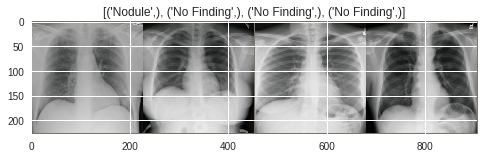

Downloading: "https://download.pytorch.org/models/densenet201-c1103571.pth" to /content/.torch/models/densenet201-c1103571.pth
7.7%

100.0%


Epoch 0/0
----------
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

In [0]:
# Official pytorch documentation
# -*- coding: utf-8 -*-
"""
Transfer Learning tutorial
==========================
**Author**: `Sasank Chilamkurthy <https://chsasank.github.io>`_

In this tutorial, you will learn how to train your network using
transfer learning. You can read more about the transfer learning at `cs231n
notes <http://cs231n.github.io/transfer-learning/>`__

Quoting these notes,

    In practice, very few people train an entire Convolutional Network
    from scratch (with random initialization), because it is relatively
    rare to have a dataset of sufficient size. Instead, it is common to
    pretrain a ConvNet on a very large dataset (e.g. ImageNet, which
    contains 1.2 million images with 1000 categories), and then use the
    ConvNet either as an initialization or a fixed feature extractor for
    the task of interest.

These two major transfer learning scenarios look as follows:

-  **Finetuning the convnet**: Instead of random initializaion, we
   initialize the network with a pretrained network, like the one that is
   trained on imagenet 1000 dataset. Rest of the training looks as
   usual.
-  **ConvNet as fixed feature extractor**: Here, we will freeze the weights
   for all of the network except that of the final fully connected
   layer. This last fully connected layer is replaced with a new one
   with random weights and only this layer is trained.

"""
# License: BSD
# Author: Sasank Chilamkurthy
import pdb

def imshow(inp, title=None):
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated


# Get a batch of training data
inputs, classes = next(iter(dataloaders['train']))
# print(classes)
# raise

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

imshow(out, title=mlb.inverse_transform(classes))


def train_model(model, criterion, optimizer, scheduler, tru_nm, num_epochs=25):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                scheduler.step()
                model.train(True)  # Set model to training mode
            else:
                model.train(False)  # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for data in dataloaders[phase]:
                # get the inputs
                print('.', end=' ')
                inputs, labels = data

                # wrap them in Variable
                if use_gpu:
                    inputs = Variable(inputs.cuda())
                    labels = Variable(labels.cuda())
                else:
                    inputs, labels = Variable(inputs), Variable(labels)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                outputs = model(inputs)
#                 _, preds = torch.max(outputs.data, 1)
                preds = outputs.data
                all_zeros = preds < 0.5  # Threshold
                preds[all_zeros] = 0
                preds[all_zeros ^ 1] = 1
                preds = preds.long()
#                 import pdb; 
#                 pdb.set_trace()
                loss = criterion(outputs, labels)

                # backward + optimize only if in training phase
                if phase == 'train':
                    loss.backward()
                    optimizer.step()

#                 pdb.set_trace()
                # statistics
                running_loss += loss.data[0] * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects / dataset_sizes[phase]

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))

            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())
                torch.save(model, 'DL_Project_Model_Adam_{}_{}_{}'.format(tru_nm, epoch, epoch_acc))
                

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model


def visualize_model(model, num_images=6):
    was_training = model.training
    model.eval()
    images_so_far = 0
    fig = plt.figure()

    for i, data in enumerate(dataloaders['val']):
        inputs, labels = data
        if use_gpu:
            inputs, labels = Variable(inputs.cuda()), Variable(labels.cuda())
        else:
            inputs, labels = Variable(inputs), Variable(labels)

        outputs = model(inputs)
#         _, preds = torch.max(outputs.data, 1)
        preds = outputs.data
        all_zeros = preds < 0.5  # Threshold
        preds[all_zeros] = 0
        preds[all_zeros ^ 1] = 1
        preds = preds.long()

        for j in range(inputs.size()[0]):
            images_so_far += 1
            ax = plt.subplot(num_images//2, 2, images_so_far)
            ax.axis('off')
            ax.set_title('predicted: {}'.format(mlb.inverse_transform(preds[j])))
            imshow(inputs.cpu().data[j])

            if images_so_far == num_images:
                model.train(mode=was_training)
                return
    model.train(mode=was_training)

for hercules in [# models.resnet18#, 
#                  models.resnet34, models.resnet50, models.resnet101, 
#                  models.resnet152#, 
#                  models.alexnet,
#                  models.densenet121, 
#                  models.densenet169, 
                 models.densenet201, 
                 models.densenet161, 
#                  models.inception_v3#, 
#                  models.squeezenet1_0, models.squeezenet1_1, 
                 models.vgg11#, 
#                  models.vgg11_bn, 
#                  models.vgg13, models.vgg13_bn, models.vgg16, 
#                  models.vgg16_bn, models.vgg19_bn, models.vgg19
                  ]:
    model_ft = hercules(pretrained=True)
    model_arch = type(model_ft).__name__

    if model_arch == 'ResNet':
        num_ftrs = model_ft.fc.in_features
        model_ft.fc = nn.Linear(num_ftrs, 15)
#         parameters = model_ft.fc.parameters()
    elif model_arch == 'AlexNet' or model_arch == 'VGG':
        model_ft.classifier._modules['6'] = nn.Linear(4096, 15)
#         parameters = model_ft.classifier._modules['6'].parameters()
    elif model_arch == 'DenseNet':
        model_ft.classifier = nn.Linear(model_ft.classifier.in_features, 15) # 169->2208
#         parameters = model_ft.classifier.parameters()
    elif model_arch == 'Inception3':
#         num_ftrs = model_ft.AuxLogits.fc.in_features
#         model_ft.AuxLogits.fc = nn.Linear(num_ftrs, 2)
        # parameters = model.AuxLogits.fc.parameters()
        num_ftrs = model_ft.fc.in_features
        model_ft.fc = nn.Linear(num_ftrs, 15)
#         parameters = model_ft.fc.parameters()

    if use_gpu:
        model_ft = model_ft.cuda()

#     criterion = nn.MultiLabelMarginLoss()

    # Observe that all parameters are being optimized
#     optimizer_ft = optim.Adam(model_ft.parameters(), lr=0.001)# , momentum=0.9)

    # Decay LR by a factor of 0.1 every 7 epochs
#     exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

    ######################################################################
    # Train and evaluate
    # ^^^^^^^^^^^^^^^^^^
    #
    # It should take around 15-25 min on CPU. On GPU though, it takes less than a
    # minute.
    #

#     model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler, hercules.__name__, 
#                            num_epochs=25)


#     visualize_model(model_ft)


    # ConvNet as fixed feature extractor

    model_conv = hercules(pretrained=True)
    for param in model_conv.parameters():
        param.requires_grad = False

    # Parameters of newly constructed modules have requires_grad=True by default
    if model_arch == 'ResNet':
        num_ftrs = model_conv.fc.in_features
        model_conv.fc = nn.Linear(num_ftrs, 15)
        parameters = model_ft.fc.parameters()
    elif model_arch == 'AlexNet' or model_arch == 'VGG':
        model_conv.classifier._modules['6'] = nn.Linear(4096, 15)
        parameters = model_ft.classifier._modules['6'].parameters()
    elif model_arch == 'DenseNet':
        model_conv.classifier = nn.Linear(model_conv.classifier.in_features, 15) # 169->2208
        parameters = model_ft.classifier.parameters()
    elif model_arch == 'Inception3':
#         num_ftrs = model_ft.AuxLogits.fc.in_features
#         model_ft.AuxLogits.fc = nn.Linear(num_ftrs, 2)
        parameters = model.AuxLogits.fc.parameters()
        num_ftrs = model_conv.fc.in_features
        model_conv.fc = nn.Linear(num_ftrs, 15)

    if use_gpu:
        model_conv = model_conv.cuda()

    criterion = nn.MultiLabelMarginLoss()

    
    optimizer_conv = optim.SGD(parameters, lr=0.001, momentum=0.9)

    # Decay LR by a factor of 0.1 every 7 epochs
    exp_lr_scheduler = lr_scheduler.StepLR(optimizer_conv, step_size=7, gamma=0.1)



    model_conv = train_model(model_conv, criterion, optimizer_conv,
                            exp_lr_scheduler, hercules.__name__, num_epochs=1)

    visualize_model(model_conv)

    plt.ioff()
    plt.show()

In [1]:
!ls

datalab


In [0]:
!ls

datalab


In [0]:
# Re-setup the credentials in case they have been lost
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


import os
from google.colab import files
a = [save_model_to_drive(i) for i in os.listdir(os.getcwd()) if i.startswith('Tec')]
print(a)

Uploaded file with ID 1vX-qdtHbOIBHiqeZZiz9mhy7AK0Noy1t
[None]
